In [ ]:
!mkdir -p ~/.kaggle
!cp /content/drive/MyDrive/kaggle.json ~/.kaggle/
!chmod 600 ~ /content/drive/MyDrive/kaggle.json
!kaggle competitions download -c playground-series-s5e3
!unzip /content/playground-series-s5e3.zip
!pip install bayesian-optimization
!pip install optuna

  0% 0.00/59.0k [00:00<?, ?B/s]
100% 59.0k/59.0k [00:00<00:00, 767kB/s]
Archive:  /content/playground-series-s5e3.zip
  inflating: sample_submission.csv   
  inflating: test.csv                
  inflating: train.csv               
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 383.6/383.6 kB 9.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 231.8/231.8 kB 13.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 78.5/78.5 kB 5.9 MB/s eta 0:00:00


In [ ]:
!pip install catboost

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 61.0/61.0 kB 4.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 98.7/98.7 MB 7.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 18.3/18.3 MB 53.2 MB/s eta 0:00:00
  Attempting uninstall: numpy
    Found existing installation: numpy 2.0.2
    Uninstalling numpy-2.0.2:
      Successfully uninstalled numpy-2.0.2


In [ ]:
!pip uninstall catboost numpy -y
!pip install catboost==1.2.2 numpy==1.26.0

Found existing installation: catboost 1.2.7
Uninstalling catboost-1.2.7:
  Successfully uninstalled catboost-1.2.7
Found existing installation: numpy 1.24.0
Uninstalling numpy-1.24.0:
  Successfully uninstalled numpy-1.24.0
  Using cached catboost-1.2.2-cp311-cp311-manylinux2014_x86_64.whl.metadata (1.2 kB)
  Using cached numpy-1.26.0-cp311-cp311-manylinux_2_17_x86_64.manylinux2014_x86_64.whl.metadata (58 kB)
Using cached catboost-1.2.2-cp311-cp311-manylinux2014_x86_64.whl (98.7 MB)
Using cached numpy-1.26.0-cp311-cp311-manylinux_2_17_x86_64.manylinux2014_x86_64.whl (18.2 MB)
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
google-colab 1.0.0 requires pandas==2.2.2, but you have pandas 2.2.3 which is incompatible.


In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import optuna
import catboost
from sklearn.model_selection import cross_val_score

In [ ]:
pd.set_option('display.max_columns', None)

In [ ]:
train_data = pd.read_csv('/content/train.csv')
test_data = pd.read_csv('/content/test.csv')

In [ ]:
train_data.head()

id  day  pressure  maxtemp  temparature  mintemp  dewpoint  humidity  \
0   0    1    1017.4     21.2         20.6     19.9      19.4      87.0   
1   1    2    1019.5     16.2         16.9     15.8      15.4      95.0   
2   2    3    1024.1     19.4         16.1     14.6       9.3      75.0   
3   3    4    1013.4     18.1         17.8     16.9      16.8      95.0   
4   4    5    1021.8     21.3         18.4     15.2       9.6      52.0   

   cloud  sunshine  winddirection  windspeed  rainfall  
0   88.0       1.1           60.0       17.2         1  
1   91.0       0.0           50.0       21.9         1  
2   47.0       8.3           70.0       18.1         1  
3   95.0       0.0           60.0       35.6         1  
4   45.0       3.6           40.0       24.8         0

In [ ]:
train_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2190 entries, 0 to 2189
Data columns (total 13 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   id             2190 non-null   int64  
 1   day            2190 non-null   int64  
 2   pressure       2190 non-null   float64
 3   maxtemp        2190 non-null   float64
 4   temparature    2190 non-null   float64
 5   mintemp        2190 non-null   float64
 6   dewpoint       2190 non-null   float64
 7   humidity       2190 non-null   float64
 8   cloud          2190 non-null   float64
 9   sunshine       2190 non-null   float64
 10  winddirection  2190 non-null   float64
 11  windspeed      2190 non-null   float64
 12  rainfall       2190 non-null   int64  
dtypes: float64(10), int64(3)
memory usage: 222.6 KB


In [ ]:
train_data.describe()

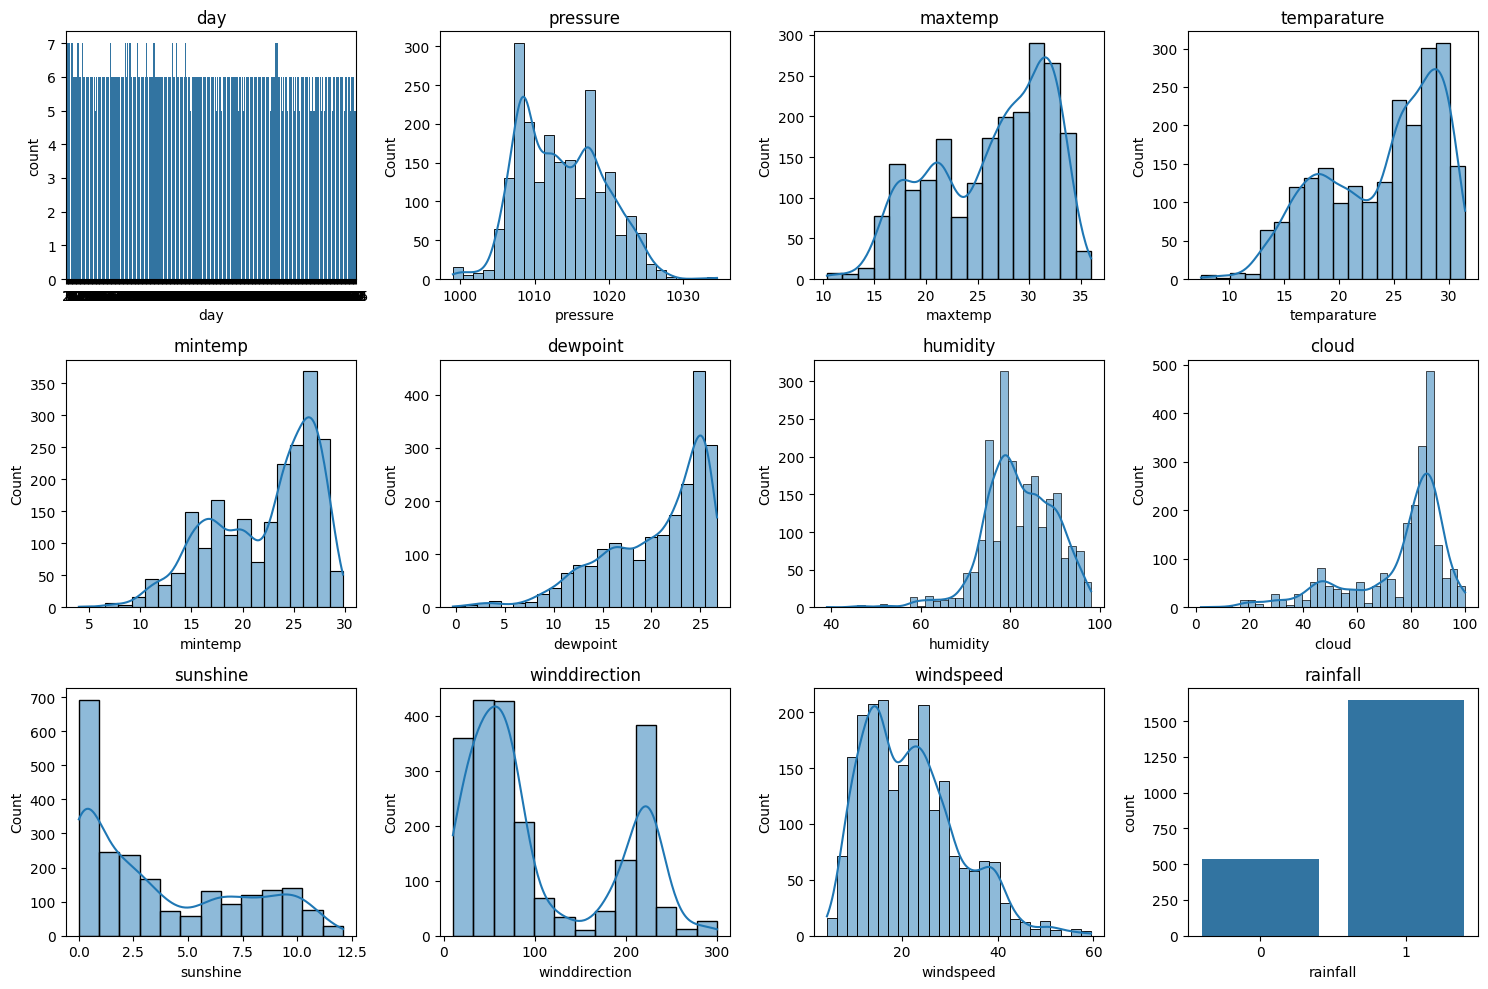

In [ ]:
plt.subplots(3, 4, figsize=(15,10))

for i, col in enumerate(train_data.columns[1:]):
  plt.subplot(3, 4, i+1)
  plt.title(col)
  if  train_data[col].dtype == 'float64':
    sns.histplot(train_data[col], kde=True)

  else:
    sns.countplot(x = col , data = train_data)

plt.tight_layout()
plt.show()

# **Here are The Insights Derived From The Hist & Count Plots**


**Day:** The distribution of 'day' appears uniform, indicating consistent data collection across all days.

**Pressure:** The pressure values are concentrated around 1010–1020 hPa, showing a slightly skewed distribution with fewer occurrences at extreme values.

**Max Temperature:** Maximum temperature mostly ranges between 25°C and 35°C, with a peak around 30°C.

**Temperature:** The overall temperature distribution mirrors the max temperature, peaking near 30°C, suggesting stable climatic conditions.

**Min Temperature:** Minimum temperatures are concentrated between 20°C and 30°C, with a notable peak around 25°C.

**Dew Point:** Dew point values are mostly distributed between 10°C and 25°C, peaking near 25°C, indicating moderate humidity levels.

**Humidity:** Humidity is heavily skewed towards higher values, clustering around 80–100%, indicating a predominantly humid environment.

**Cloud Cover:** Cloud cover is concentrated near 80–100%, showing frequent overcast conditions.

**Sunshine:** Sunshine hours are skewed towards lower values, with most days having less than 5 hours of sunshine, suggesting cloudy weather.

**Wind Direction:** Wind direction shows a bimodal distribution with peaks around 100° and 300°, indicating dominant wind patterns from specific directions.

**Wind Speed:** Wind speeds are distributed mostly between 0 and 40 km/h, peaking near lower speeds, suggesting calm to moderate wind conditions.

**Rainfall:** Rainfall is binary (0 or 1), with more instances of rainfall recorded (1), indicating frequent precipitation in the dataset.

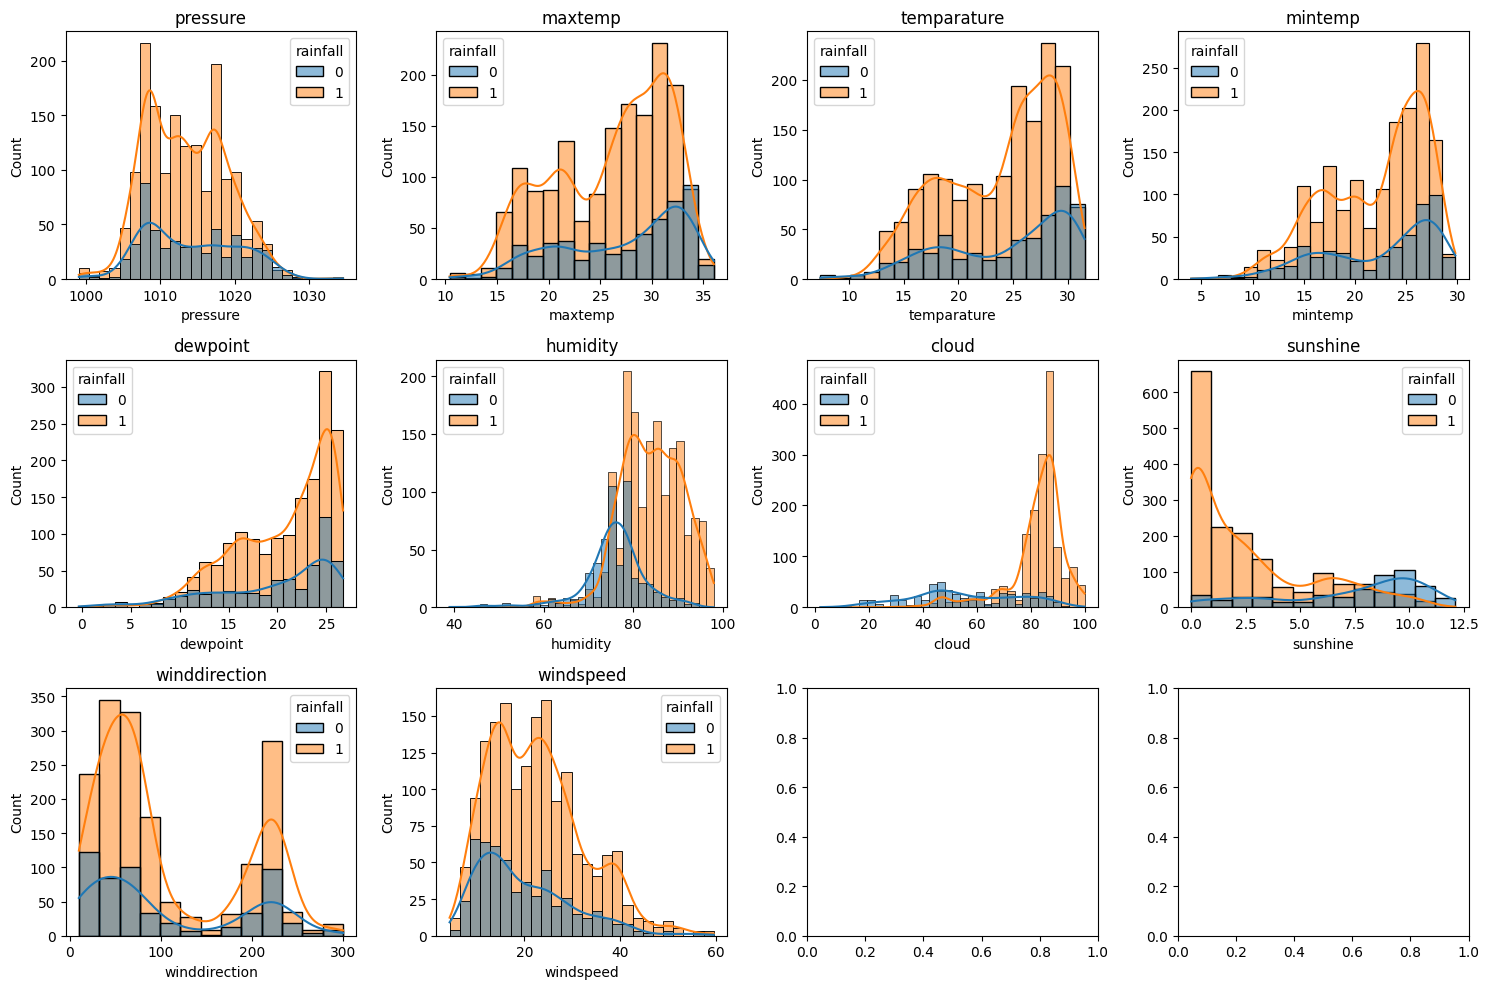

In [ ]:
plt.subplots(3, 4, figsize=(15,10))

for i, col in enumerate(train_data.columns[2:-1]):
  plt.subplot(3, 4, i+1)
  plt.title(col)
  if  train_data[col].dtype == 'float64':
    sns.histplot(x=train_data[col], hue= train_data.rainfall, kde=True)

  else:
    sns.countplot(x = col ,data = train_data, hue='rainfall')

plt.tight_layout()
plt.show()

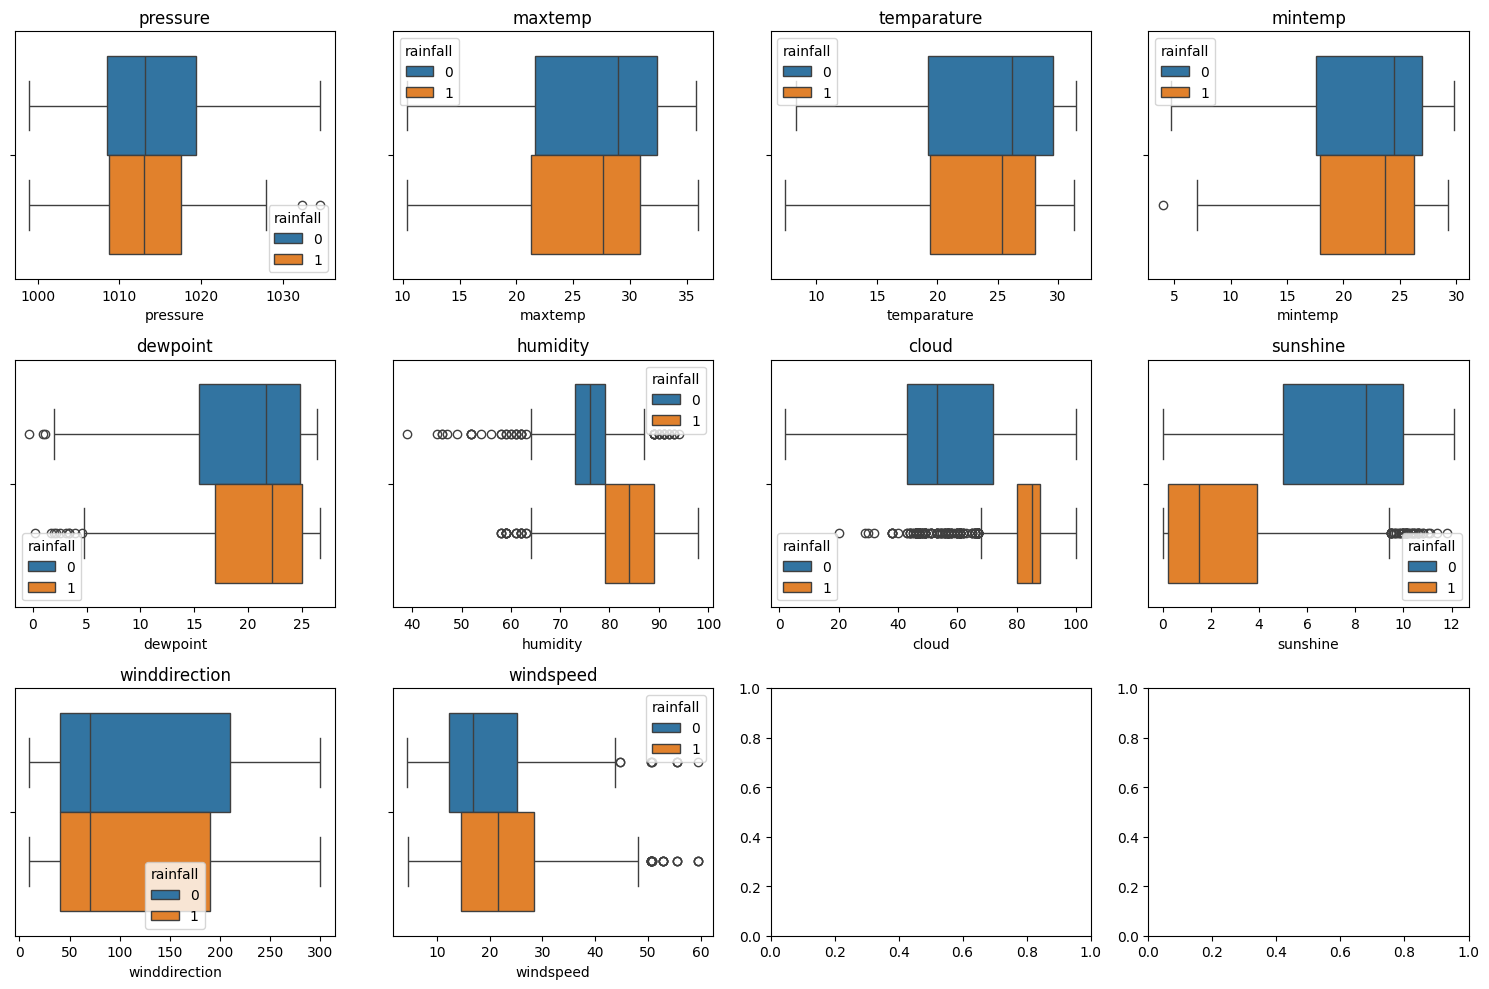

In [ ]:
plt.subplots(3, 4, figsize=(15,10))

for i, col in enumerate(train_data.columns[2:-1]):
  plt.subplot(3, 4, i+1)
  plt.title(col)
  sns.boxplot(x=train_data[col], hue= train_data.rainfall)

plt.tight_layout()
plt.show()

# **Here are The Insights Derived From The Hist & Box Plots**

**Pressure:**

* Rainfall (1) is more frequent at lower pressure values, primarily between 1005
and 1015 hPa.

* Non-rainfall (0) events are distributed across a slightly higher pressure range, peaking near 1015–1020 hPa.

**Max Temperature:**

* Rainfall events are more common when the maximum temperature is between 25°C and 30°C.

* Non-rainfall events dominate at higher maximum temperatures, especially above 30°C.

**Temperature:**

* Rainfall is concentrated around temperatures of 25°C–30°C.

* Non-rainfall events occur more frequently at slightly lower temperatures, around 20°C–25°C.

**Min Temperature:**

* Rainfall is most frequent when the minimum temperature is between 20°C and 25°C.

* Non-rainfall events have a broader spread but peak near similar temperature ranges.

**Dew Point:**

* Higher dew points (above 20°C) strongly correlate with rainfall events.

* Non-rainfall events are more common at lower dew points (below 15°C).

**Humidity:**

* Rainfall occurs predominantly at high humidity levels (80%–100%).

* Non-rainfall events are more evenly distributed across lower humidity levels (40%–80%).

**Cloud Cover:**

* Rainfall is strongly associated with high cloud cover (80%–100%).

* Non-rainfall events occur more frequently under lower cloud cover conditions.

**Sunshine:**

* Rainfall is most frequent when sunshine hours are minimal (0–2 hours).

* Non-rainfall events increase as sunshine duration rises, particularly above 5 hours.

**Wind Direction:**

* Rainfall events show peaks in specific wind directions, particularly around 100° and 200°.

* Non-rainfall events are spread across a wider range of wind directions but peak near similar values.

**Wind Speed:**

* Rainfall occurs more frequently at moderate wind speeds (10–30 km/h).

* Non-rainfall events dominate at very low wind speeds (<10 km/h) and higher speeds (>40 km/h).



In [ ]:
train_data.head()

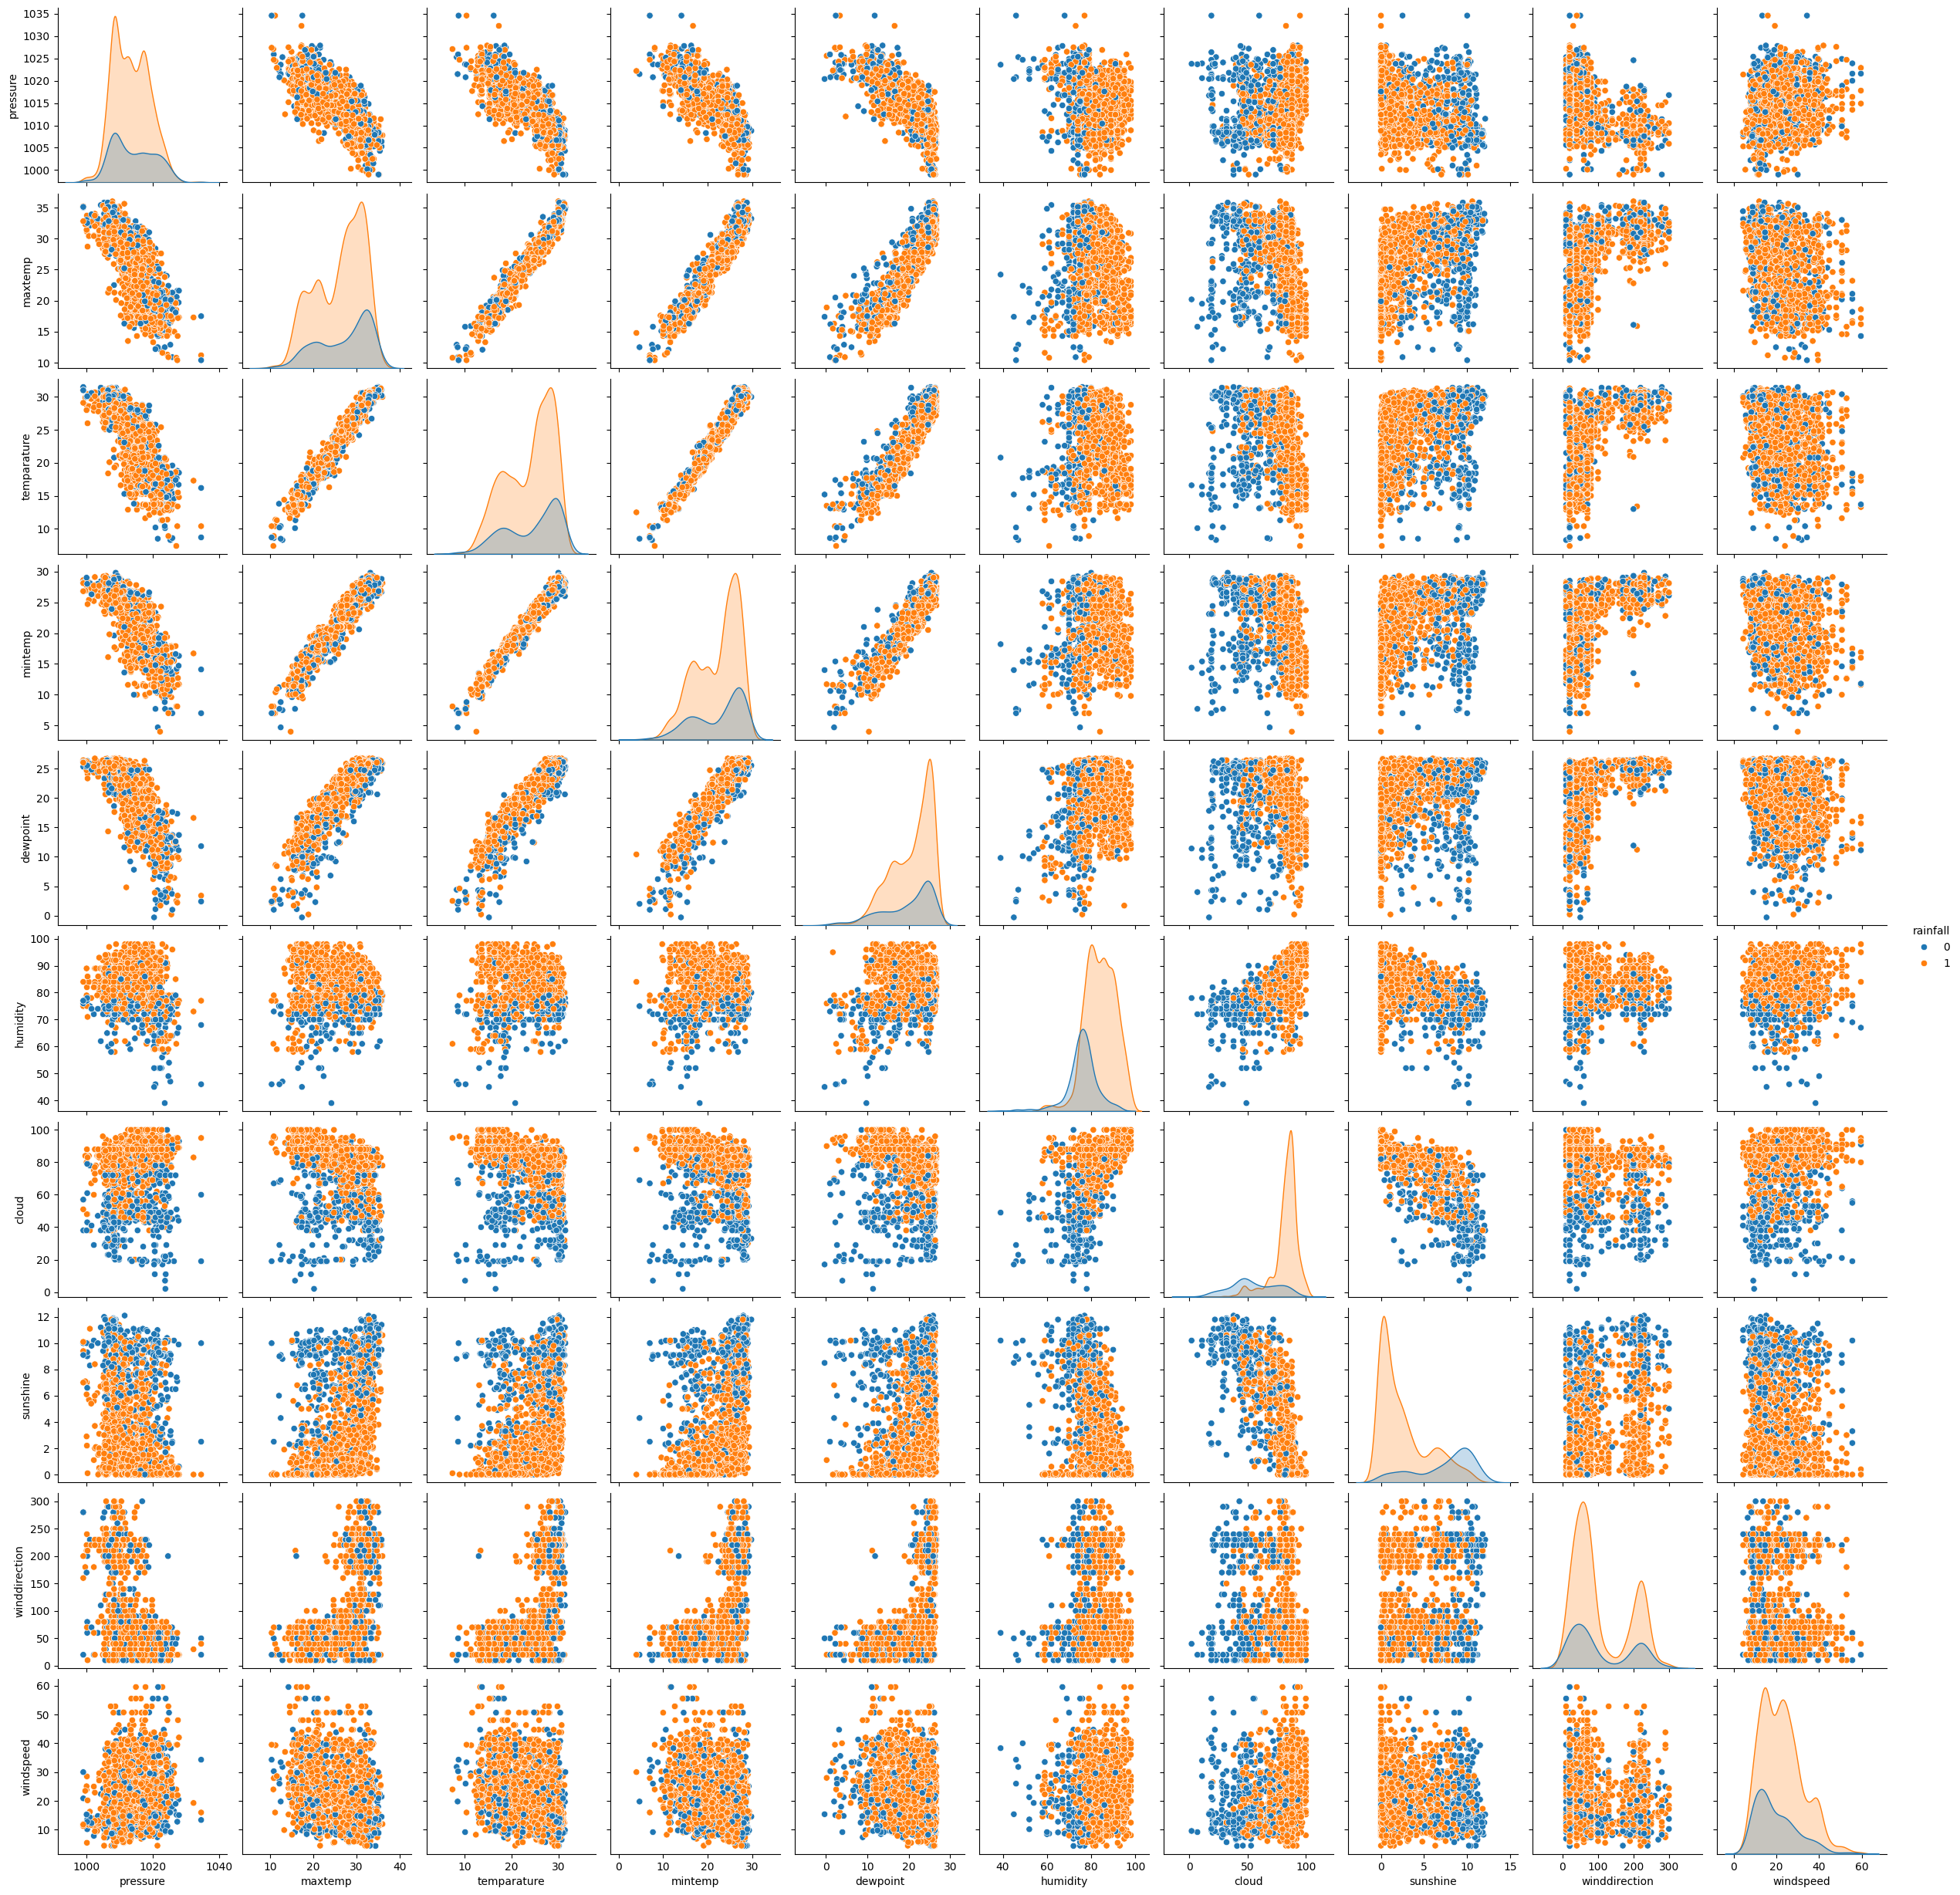

In [ ]:
sns.pairplot(train_data[train_data.columns[2:]], hue='rainfall')
plt.show()

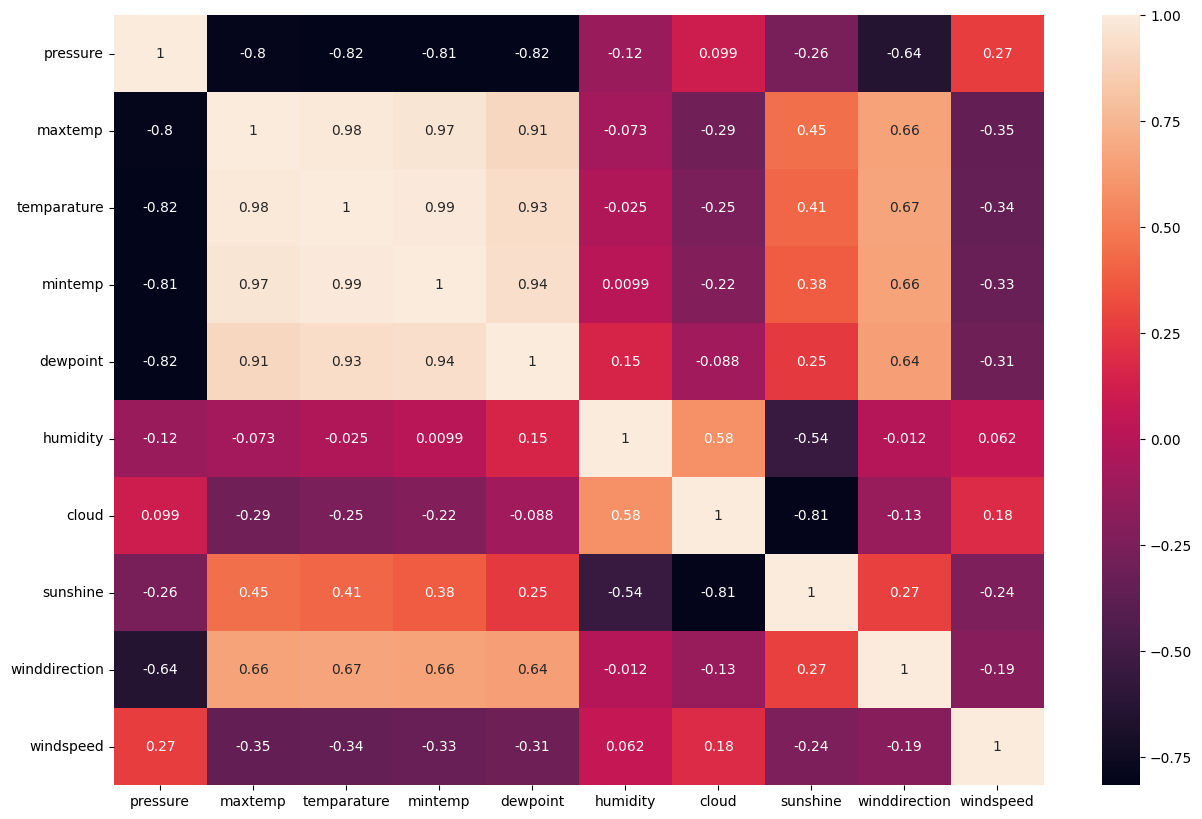

In [ ]:
plt.figure(figsize=(15,10))
sns.heatmap(train_data[train_data.columns[2:-1]].corr(), annot=True)
plt.show()

1. **Temperature Variables** **(maxtemp, temparature, mintemp)** are highly correlated with each other (0.97-0.99). This is expected as these variables naturally move together.

2. **Pressure** is negatively correlated with **temperature** variables and dewpoint (-0.80 to -0.82). Lower pressure means higher temperatures and dew point.

3. **Cloud cover** and **sunshine** have a strong negative correlation (-0.81). More clouds significantly reduce sunshine.

4. **Humidity** and **cloud cover** have a moderate positive correlation (0.58). Higher humidity often coincides with increased cloudiness.

5. **Wind Direction** has a moderate correlation with **temperature** variables(0.66-0.67) and a strong negative correlation with pressure(-0.64). Certain wind directions are associated with warmer temperatures and lower pressure.

In [ ]:
train_data['sin_day'] = np.sin(2 * np.pi * train_data['day'] / 365)
train_data['cos_day'] = np.cos(2 * np.pi * train_data['day'] / 365)
test_data['sin_day'] = np.sin(2 * np.pi * test_data['day'] / 365)
test_data['cos_day'] = np.cos(2 * np.pi * test_data['day'] / 365)

In [ ]:
train_data.head()

id  day  pressure  maxtemp  temparature  mintemp  dewpoint  humidity  \
0   0    1    1017.4     21.2         20.6     19.9      19.4      87.0   
1   1    2    1019.5     16.2         16.9     15.8      15.4      95.0   
2   2    3    1024.1     19.4         16.1     14.6       9.3      75.0   
3   3    4    1013.4     18.1         17.8     16.9      16.8      95.0   
4   4    5    1021.8     21.3         18.4     15.2       9.6      52.0   

   cloud  sunshine  winddirection  windspeed  rainfall   sin_day   cos_day  
0   88.0       1.1           60.0       17.2         1  0.017213  0.999852  
1   91.0       0.0           50.0       21.9         1  0.034422  0.999407  
2   47.0       8.3           70.0       18.1         1  0.051620  0.998667  
3   95.0       0.0           60.0       35.6         1  0.068802  0.997630  
4   45.0       3.6           40.0       24.8         0  0.085965  0.996298

In [ ]:
from sklearn.model_selection import train_test_split
X_train, X_eval, y_train, y_eval = train_test_split(train_data.drop(columns=['rainfall', 'id', 'day']), train_data['rainfall'], test_size=0.2, random_state=42)

In [ ]:
from statsmodels.stats.outliers_influence import variance_inflation_factor
import statsmodels.api as sm

# Load dataset (ensure target variable is not included)
X = train_data.drop(columns=['rainfall', 'day'])  # Replace 'target_column' with actual target

# Add a constant for VIF calculation
X = sm.add_constant(X)

# Compute VIF for each feature
vif_data = pd.DataFrame()
vif_data["Feature"] = X.columns
vif_data["VIF"] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]

# Drop constant column
vif_data = vif_data[vif_data["Feature"] != "const"]

# Display VIF results
print(vif_data)

MissingDataError: exog contains inf or nans

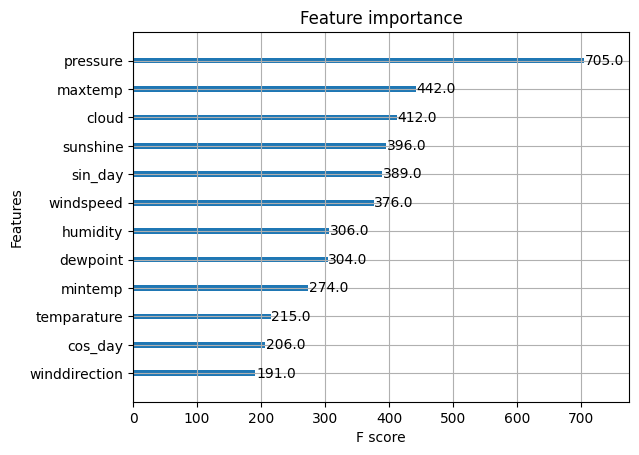

In [ ]:
import xgboost as xgb
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split

# Define features and target
X = train_data.drop(columns=['rainfall', 'id', 'day'])  # Replace 'target_column' with actual target
y = train_data['rainfall']

# Split data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Train XGBoost model
xgb_model = xgb.XGBRegressor()  # Use XGBClassifier() for classification problems
xgb_model.fit(X_train, y_train)

# Plot feature importance
xgb.plot_importance(xgb_model)
plt.show()

In [ ]:
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import StandardScaler, MinMaxScaler
from sklearn.impute import KNNImputer
from sklearn.pipeline import Pipeline

In [ ]:
scaler = ColumnTransformer(
    transformers=[
        ('standard', StandardScaler(), [col for col in synthesized_data.columns if col not in ('rainfall', 'id', 'day', 'sin_day', 'cos_day')])
        ]
)

In [ ]:
X_scaled = scaler.fit_transform(synthesized_data.drop(columns=['day', 'rainfall']))

In [ ]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X_scaled, synthesized_data['rainfall'], test_size=0.3, random_state=42)

In [ ]:
X_train.shape, X_test.shape, y_train.shape, y_test.shape

((14000, 10), (6000, 10), (14000,), (6000,))

In [ ]:
import lightgbm as lgb
from sklearn.metrics import roc_auc_score

In [ ]:
def objective(trial):
    params = {
        "objective": "binary",
        "metric": "auc",
        "boosting_type": "gbdt",
        "max_depth": trial.suggest_int("max_depth", 3, 12),
        "num_leaves": trial.suggest_int("num_leaves", 10, 200),
        "learning_rate": trial.suggest_float("learning_rate", 0.001, 0.3, log=True),
        "feature_fraction": trial.suggest_float("feature_fraction", 0.4, 1.0),
        "bagging_fraction": trial.suggest_float("bagging_fraction", 0.4, 1.0),
        "bagging_freq": trial.suggest_int("bagging_freq", 1, 7),
        "min_child_samples": trial.suggest_int("min_child_samples", 5, 100),
        "lambda_l1": trial.suggest_float("lambda_l1", 1e-8, 10.0, log=True),
        "lambda_l2": trial.suggest_float("lambda_l2", 1e-8, 10.0, log=True),
        "min_gain_to_split": trial.suggest_float("min_gain_to_split", 0, 15),
    }

    model = lgb.LGBMClassifier(**params, verbose=-1)
    model.fit(X_train, y_train)

    y_preds = model.predict_proba(X_test)[:, 1]

    return roc_auc_score(y_test, y_preds)

study = optuna.create_study(direction="maximize",)
study.optimize(objective, n_trials=200, show_progress_bar=True)

print("Best Params:", study.best_params)

In [ ]:
lgb_params ={'max_depth': 5, 'num_leaves': 44, 'learning_rate': 0.055326691492770974, 'feature_fraction': 0.6200807989972038, 'bagging_fraction': 0.4316634605881979, 'bagging_freq': 2, 'min_child_samples': 93, 'lambda_l1': 2.3673350189298768e-05, 'lambda_l2': 0.19064063015259883, 'min_gain_to_split': 2.3803363175850953}
lgb_model = lgb.LGBMClassifier(**lgb_params, verbose=-1)
lgb_model.fit(X_train, y_train)

/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


LGBMClassifier(bagging_fraction=0.4316634605881979, bagging_freq=2,
               feature_fraction=0.6200807989972038,
               lambda_l1=2.3673350189298768e-05, lambda_l2=0.19064063015259883,
               learning_rate=0.055326691492770974, max_depth=5,
               min_child_samples=93, min_gain_to_split=2.3803363175850953,
               num_leaves=44, verbose=-1)

In [ ]:
roc_auc_score(y_test, lgb_model.predict_proba(X_test)[:, 1])

/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


0.7209112200963361

In [ ]:
cross_val_score(lgb_model, X, y, cv=5, scoring='roc_auc').mean()

0.8855780022446689

In [ ]:
from catboost import CatBoostClassifier

In [ ]:
def objective(trial):
    params = {
        "iterations": trial.suggest_int("iterations", 100, 1000, step=100),
        "learning_rate": trial.suggest_loguniform("learning_rate", 0.01, 0.3),
        "depth": trial.suggest_int("depth", 3, 12),
        "l2_leaf_reg": trial.suggest_loguniform("l2_leaf_reg", 1e-3, 10),
        "border_count": trial.suggest_int("border_count", 32, 64),
    }

    model = CatBoostClassifier(**params, loss_function="Logloss", eval_metric="AUC",
                               random_seed=42, verbose=0, gpu_ram_part=0.9)

    model.fit(X_train, y_train)

    y_preds = model.predict_proba(X_test)[:, 1]

    return roc_auc_score(y_test, y_preds)

study = optuna.create_study(direction="maximize")
study.optimize(objective, n_trials=200, show_progress_bar=True)

print("Best Parameters:", study.best_params)
print(f"Best ROC-AUC Score: {study.best_value:.4f}")

In [ ]:
cat_params =  {'iterations': 900, 'learning_rate': 0.01860125274109229, 'depth': 3, 'l2_leaf_reg': 0.12416524287824111, 'border_count': 62}
cat_model = catboost.CatBoostClassifier(**cat_params, loss_function="Logloss", eval_metric="AUC",
                               random_seed=42, verbose=0, gpu_ram_part=0.9)
cat_model.fit(X_train, y_train)

In [ ]:
roc_auc_score(y_test, cat_model.predict_proba(X_test)[:, 1])

0.8773214614999605

In [ ]:
cross_val_score(cat_model, X, y, cv=5, scoring='roc_auc').mean()

0.8907407407407408

In [ ]:
from catboost import CatBoostClassifier
from bayes_opt import BayesianOptimization
from sklearn.model_selection import cross_val_score

def ctb_evaluate(iterations, depth, learning_rate, l2_leaf_reg):
    params = {
        'iterations': int(iterations),
        'depth': int(depth),
        'learning_rate': learning_rate,
        'l2_leaf_reg': l2_leaf_reg,
        'loss_function': 'Logloss',  # For binary classification
        'eval_metric': 'AUC',
        'verbose': False,
        'random_state': 42,
        'allow_writing_files': False
    }

    model = CatBoostClassifier(**params)
    score = cross_val_score(model, X_train, y_train, cv=5, scoring='roc_auc').mean()
    return score

# Hyperparameter bounds
pbounds = {
    'iterations': (100, 2000),      # Equivalent to n_estimators
    'depth': (4, 12),               # Tree depth
    'learning_rate': (0.01, 0.3),   # Step size shrinkage
    'l2_leaf_reg': (1, 30)          # Regularization
}

# Initialize optimizer
optimizer = BayesianOptimization(
    f=ctb_evaluate,
    pbounds=pbounds,
    random_state=42,
)

# Run optimization
optimizer.maximize(init_points=5, n_iter=25)

# Best results
print(f"Best parameters: {optimizer.max['params']}")
print(f"Best AUC score: {optimizer.max['target']:.4f}")

|   iter    |  target   |   depth   | iterat... | l2_lea... | learni... |
-------------------------------------------------------------------------
| 1         | 0.8817    | 6.996     | 1.906e+03 | 22.23     | 0.1836    |
| 2         | 0.8778    | 5.248     | 396.4     | 2.684     | 0.2612    |
| 3         | 0.8876    | 8.809     | 1.445e+03 | 1.597     | 0.2913    |
| 4         | 0.8921    | 10.66     | 503.4     | 6.273     | 0.06319   |
| 5         | 0.8859    | 6.434     | 1.097e+03 | 13.53     | 0.09446   |
| 6         | 0.8908    | 10.16     | 1.443e+03 | 2.164     | 0.1685    |
| 7         | 0.8849    | 8.398     | 506.4     | 9.748     | 0.2089    |
| 8         | 0.89      | 11.47     | 503.6     | 3.647     | 0.1569    |
| 9         | 0.8933    | 7.724     | 501.2     | 6.464     | 0.06661   |
| 10        | 0.8906    | 9.172     | 497.7     | 10.16     | 0.1338    |
| 11        | 0.8832    | 6.226     | 497.1     | 4.204     | 0.2569    |
| 12        | 0.8867    | 4.923     | 

In [ ]:
import xgboost as xgb
from sklearn.metrics import roc_auc_score

def objective(trial):
    params = {
        "n_estimators": trial.suggest_int("n_estimators", 100, 1000, step=100),  # Similar to iterations in CatBoost
        "learning_rate": trial.suggest_loguniform("learning_rate", 0.01, 0.3),
        "max_depth": trial.suggest_int("max_depth", 3, 12),                      # Similar to depth in CatBoost
        "reg_lambda": trial.suggest_loguniform("reg_lambda", 1e-3, 10),        # Similar to l2_leaf_reg in CatBoost
        "subsample": trial.suggest_float("subsample", 0.5, 1.0),                # Similar to bagging_fraction in CatBoost
        "colsample_bytree": trial.suggest_float("colsample_bytree", 0.5, 1.0),  # Similar to feature_fraction in CatBoost
        "objective": "binary:logistic",                                         # For binary classification
        "eval_metric": "auc",                                                  # Metric to optimize
        "random_state": 42,                                                    # For reproducibility
        "n_jobs": -1,                                                          # Use all available cores
    }

    model = xgb.XGBClassifier(**params)
    model.fit(X_train, y_train)

    y_preds = model.predict_proba(X_test)[:, 1]

    return roc_auc_score(y_test, y_preds)

study = optuna.create_study(direction="maximize")
study.optimize(objective, n_trials=200, show_progress_bar=True)

print("Best Parameters:", study.best_params)

[I 2025-03-09 18:18:34,205] A new study created in memory with name: no-name-492d6aba-01ab-438c-8bf7-e3769ed09c37


  0%|          | 0/200 [00:00<?, ?it/s]

<ipython-input-226-a3b1dbed9246>:7: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  "learning_rate": trial.suggest_loguniform("learning_rate", 0.01, 0.3),
<ipython-input-226-a3b1dbed9246>:9: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  "reg_lambda": trial.suggest_loguniform("reg_lambda", 1e-3, 10),        # Similar to l2_leaf_reg in CatBoost


[I 2025-03-09 18:18:35,408] Trial 0 finished with value: 0.843523616343089 and parameters: {'n_estimators': 900, 'learning_rate': 0.10941169993138036, 'max_depth': 12, 'reg_lambda': 2.7813992616267202, 'subsample': 0.9229942707439651, 'colsample_bytree': 0.8751552246289016}. Best is trial 0 with value: 0.843523616343089.


<ipython-input-226-a3b1dbed9246>:7: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  "learning_rate": trial.suggest_loguniform("learning_rate", 0.01, 0.3),
<ipython-input-226-a3b1dbed9246>:9: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  "reg_lambda": trial.suggest_loguniform("reg_lambda", 1e-3, 10),        # Similar to l2_leaf_reg in CatBoost


[I 2025-03-09 18:18:37,591] Trial 1 finished with value: 0.8504781222833961 and parameters: {'n_estimators': 800, 'learning_rate': 0.03939170069161104, 'max_depth': 6, 'reg_lambda': 3.589396399960707, 'subsample': 0.9008365179423692, 'colsample_bytree': 0.6141165448119194}. Best is trial 1 with value: 0.8504781222833961.


<ipython-input-226-a3b1dbed9246>:7: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  "learning_rate": trial.suggest_loguniform("learning_rate", 0.01, 0.3),
<ipython-input-226-a3b1dbed9246>:9: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  "reg_lambda": trial.suggest_loguniform("reg_lambda", 1e-3, 10),        # Similar to l2_leaf_reg in CatBoost


[I 2025-03-09 18:18:38,425] Trial 2 finished with value: 0.8564316008535074 and parameters: {'n_estimators': 200, 'learning_rate': 0.055063180799857996, 'max_depth': 6, 'reg_lambda': 0.0017043329779712524, 'subsample': 0.9419231164736399, 'colsample_bytree': 0.7219727949740271}. Best is trial 2 with value: 0.8564316008535074.


<ipython-input-226-a3b1dbed9246>:7: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  "learning_rate": trial.suggest_loguniform("learning_rate", 0.01, 0.3),
<ipython-input-226-a3b1dbed9246>:9: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  "reg_lambda": trial.suggest_loguniform("reg_lambda", 1e-3, 10),        # Similar to l2_leaf_reg in CatBoost


[I 2025-03-09 18:18:42,692] Trial 3 finished with value: 0.8700771844788071 and parameters: {'n_estimators': 600, 'learning_rate': 0.015597668602317927, 'max_depth': 9, 'reg_lambda': 9.19254196853508, 'subsample': 0.5037467187686057, 'colsample_bytree': 0.6220781837023764}. Best is trial 3 with value: 0.8700771844788071.


<ipython-input-226-a3b1dbed9246>:7: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  "learning_rate": trial.suggest_loguniform("learning_rate", 0.01, 0.3),
<ipython-input-226-a3b1dbed9246>:9: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  "reg_lambda": trial.suggest_loguniform("reg_lambda", 1e-3, 10),        # Similar to l2_leaf_reg in CatBoost


[I 2025-03-09 18:18:43,217] Trial 4 finished with value: 0.8393614499091173 and parameters: {'n_estimators': 700, 'learning_rate': 0.15064908588233358, 'max_depth': 5, 'reg_lambda': 9.404644024902069, 'subsample': 0.6310115959083569, 'colsample_bytree': 0.5738479164358173}. Best is trial 3 with value: 0.8700771844788071.


<ipython-input-226-a3b1dbed9246>:7: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  "learning_rate": trial.suggest_loguniform("learning_rate", 0.01, 0.3),
<ipython-input-226-a3b1dbed9246>:9: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  "reg_lambda": trial.suggest_loguniform("reg_lambda", 1e-3, 10),        # Similar to l2_leaf_reg in CatBoost


[I 2025-03-09 18:18:43,763] Trial 5 finished with value: 0.8402966202154845 and parameters: {'n_estimators': 800, 'learning_rate': 0.0843535196281473, 'max_depth': 4, 'reg_lambda': 0.13826727967803537, 'subsample': 0.7898149489003352, 'colsample_bytree': 0.9220812056365256}. Best is trial 3 with value: 0.8700771844788071.


<ipython-input-226-a3b1dbed9246>:7: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  "learning_rate": trial.suggest_loguniform("learning_rate", 0.01, 0.3),
<ipython-input-226-a3b1dbed9246>:9: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  "reg_lambda": trial.suggest_loguniform("reg_lambda", 1e-3, 10),        # Similar to l2_leaf_reg in CatBoost


[I 2025-03-09 18:18:44,619] Trial 6 finished with value: 0.8415215616026976 and parameters: {'n_estimators': 900, 'learning_rate': 0.05796267020002632, 'max_depth': 12, 'reg_lambda': 0.09548389486246528, 'subsample': 0.6229905177025085, 'colsample_bytree': 0.8776211156218989}. Best is trial 3 with value: 0.8700771844788071.


<ipython-input-226-a3b1dbed9246>:7: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  "learning_rate": trial.suggest_loguniform("learning_rate", 0.01, 0.3),
<ipython-input-226-a3b1dbed9246>:9: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  "reg_lambda": trial.suggest_loguniform("reg_lambda", 1e-3, 10),        # Similar to l2_leaf_reg in CatBoost


[I 2025-03-09 18:18:44,905] Trial 7 finished with value: 0.8488448671004453 and parameters: {'n_estimators': 300, 'learning_rate': 0.11440089492134142, 'max_depth': 5, 'reg_lambda': 0.07227533013254249, 'subsample': 0.8145870953439488, 'colsample_bytree': 0.9284614940744824}. Best is trial 3 with value: 0.8700771844788071.


<ipython-input-226-a3b1dbed9246>:7: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  "learning_rate": trial.suggest_loguniform("learning_rate", 0.01, 0.3),
<ipython-input-226-a3b1dbed9246>:9: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  "reg_lambda": trial.suggest_loguniform("reg_lambda", 1e-3, 10),        # Similar to l2_leaf_reg in CatBoost


[I 2025-03-09 18:18:45,722] Trial 8 finished with value: 0.8475277258238719 and parameters: {'n_estimators': 900, 'learning_rate': 0.048569460213739334, 'max_depth': 11, 'reg_lambda': 0.1762657458887249, 'subsample': 0.5217684170408974, 'colsample_bytree': 0.5690441092318796}. Best is trial 3 with value: 0.8700771844788071.


<ipython-input-226-a3b1dbed9246>:7: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  "learning_rate": trial.suggest_loguniform("learning_rate", 0.01, 0.3),
<ipython-input-226-a3b1dbed9246>:9: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  "reg_lambda": trial.suggest_loguniform("reg_lambda", 1e-3, 10),        # Similar to l2_leaf_reg in CatBoost


[I 2025-03-09 18:18:46,354] Trial 9 finished with value: 0.8377808803772293 and parameters: {'n_estimators': 700, 'learning_rate': 0.0711225547299777, 'max_depth': 10, 'reg_lambda': 0.15448500010829533, 'subsample': 0.5467182059002704, 'colsample_bytree': 0.7023788098788926}. Best is trial 3 with value: 0.8700771844788071.


<ipython-input-226-a3b1dbed9246>:7: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  "learning_rate": trial.suggest_loguniform("learning_rate", 0.01, 0.3),
<ipython-input-226-a3b1dbed9246>:9: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  "reg_lambda": trial.suggest_loguniform("reg_lambda", 1e-3, 10),        # Similar to l2_leaf_reg in CatBoost


[I 2025-03-09 18:18:47,091] Trial 10 finished with value: 0.8676009588788495 and parameters: {'n_estimators': 400, 'learning_rate': 0.011302032154042787, 'max_depth': 9, 'reg_lambda': 0.005507284990792595, 'subsample': 0.6980110555954537, 'colsample_bytree': 0.5103255262842328}. Best is trial 3 with value: 0.8700771844788071.


<ipython-input-226-a3b1dbed9246>:7: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  "learning_rate": trial.suggest_loguniform("learning_rate", 0.01, 0.3),
<ipython-input-226-a3b1dbed9246>:9: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  "reg_lambda": trial.suggest_loguniform("reg_lambda", 1e-3, 10),        # Similar to l2_leaf_reg in CatBoost


[I 2025-03-09 18:18:47,805] Trial 11 finished with value: 0.8663101604278075 and parameters: {'n_estimators': 400, 'learning_rate': 0.01015289891237351, 'max_depth': 9, 'reg_lambda': 0.003678716313309446, 'subsample': 0.6899271256830044, 'colsample_bytree': 0.5049669794182519}. Best is trial 3 with value: 0.8700771844788071.


<ipython-input-226-a3b1dbed9246>:7: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  "learning_rate": trial.suggest_loguniform("learning_rate", 0.01, 0.3),
<ipython-input-226-a3b1dbed9246>:9: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  "reg_lambda": trial.suggest_loguniform("reg_lambda", 1e-3, 10),        # Similar to l2_leaf_reg in CatBoost


[I 2025-03-09 18:18:48,557] Trial 12 finished with value: 0.8620426226917098 and parameters: {'n_estimators': 500, 'learning_rate': 0.010511802683552405, 'max_depth': 8, 'reg_lambda': 0.010835975582035735, 'subsample': 0.7064911450889501, 'colsample_bytree': 0.6586907402000752}. Best is trial 3 with value: 0.8700771844788071.


<ipython-input-226-a3b1dbed9246>:7: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  "learning_rate": trial.suggest_loguniform("learning_rate", 0.01, 0.3),
<ipython-input-226-a3b1dbed9246>:9: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  "reg_lambda": trial.suggest_loguniform("reg_lambda", 1e-3, 10),        # Similar to l2_leaf_reg in CatBoost


[I 2025-03-09 18:18:49,162] Trial 13 finished with value: 0.8573799425726404 and parameters: {'n_estimators': 500, 'learning_rate': 0.023420640668839258, 'max_depth': 8, 'reg_lambda': 0.016342939364239046, 'subsample': 0.5948626788131104, 'colsample_bytree': 0.5040507309332454}. Best is trial 3 with value: 0.8700771844788071.


<ipython-input-226-a3b1dbed9246>:7: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  "learning_rate": trial.suggest_loguniform("learning_rate", 0.01, 0.3),
<ipython-input-226-a3b1dbed9246>:9: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  "reg_lambda": trial.suggest_loguniform("reg_lambda", 1e-3, 10),        # Similar to l2_leaf_reg in CatBoost


[I 2025-03-09 18:18:49,408] Trial 14 finished with value: 0.8629909644108427 and parameters: {'n_estimators': 100, 'learning_rate': 0.021153839627391084, 'max_depth': 10, 'reg_lambda': 0.8229055754414414, 'subsample': 0.5112218274880429, 'colsample_bytree': 0.7946778582162576}. Best is trial 3 with value: 0.8700771844788071.


<ipython-input-226-a3b1dbed9246>:7: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  "learning_rate": trial.suggest_loguniform("learning_rate", 0.01, 0.3),
<ipython-input-226-a3b1dbed9246>:9: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  "reg_lambda": trial.suggest_loguniform("reg_lambda", 1e-3, 10),        # Similar to l2_leaf_reg in CatBoost


[I 2025-03-09 18:18:50,166] Trial 15 finished with value: 0.8594083401385633 and parameters: {'n_estimators': 600, 'learning_rate': 0.01765411342633592, 'max_depth': 7, 'reg_lambda': 0.7111783961458006, 'subsample': 0.8631217930634821, 'colsample_bytree': 0.6302601974963375}. Best is trial 3 with value: 0.8700771844788071.


<ipython-input-226-a3b1dbed9246>:7: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  "learning_rate": trial.suggest_loguniform("learning_rate", 0.01, 0.3),
<ipython-input-226-a3b1dbed9246>:9: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  "reg_lambda": trial.suggest_loguniform("reg_lambda", 1e-3, 10),        # Similar to l2_leaf_reg in CatBoost


[I 2025-03-09 18:18:50,690] Trial 16 finished with value: 0.8595927399172835 and parameters: {'n_estimators': 400, 'learning_rate': 0.03108442293916044, 'max_depth': 9, 'reg_lambda': 0.025774118389834694, 'subsample': 0.721001452424826, 'colsample_bytree': 0.5403822789584714}. Best is trial 3 with value: 0.8700771844788071.


<ipython-input-226-a3b1dbed9246>:7: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  "learning_rate": trial.suggest_loguniform("learning_rate", 0.01, 0.3),
<ipython-input-226-a3b1dbed9246>:9: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  "reg_lambda": trial.suggest_loguniform("reg_lambda", 1e-3, 10),        # Similar to l2_leaf_reg in CatBoost


[I 2025-03-09 18:18:50,993] Trial 17 finished with value: 0.8382023655857327 and parameters: {'n_estimators': 300, 'learning_rate': 0.2614612725710295, 'max_depth': 10, 'reg_lambda': 0.001125012640570736, 'subsample': 0.9959806041787325, 'colsample_bytree': 0.6653952565321021}. Best is trial 3 with value: 0.8700771844788071.


<ipython-input-226-a3b1dbed9246>:7: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  "learning_rate": trial.suggest_loguniform("learning_rate", 0.01, 0.3),
<ipython-input-226-a3b1dbed9246>:9: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  "reg_lambda": trial.suggest_loguniform("reg_lambda", 1e-3, 10),        # Similar to l2_leaf_reg in CatBoost


[I 2025-03-09 18:18:51,317] Trial 18 finished with value: 0.86509839045336 and parameters: {'n_estimators': 600, 'learning_rate': 0.014680161733004314, 'max_depth': 3, 'reg_lambda': 0.00486143353555577, 'subsample': 0.6572261564758806, 'colsample_bytree': 0.7617041524325001}. Best is trial 3 with value: 0.8700771844788071.


<ipython-input-226-a3b1dbed9246>:7: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  "learning_rate": trial.suggest_loguniform("learning_rate", 0.01, 0.3),
<ipython-input-226-a3b1dbed9246>:9: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  "reg_lambda": trial.suggest_loguniform("reg_lambda", 1e-3, 10),        # Similar to l2_leaf_reg in CatBoost


[I 2025-03-09 18:18:51,967] Trial 19 finished with value: 0.8612259951002345 and parameters: {'n_estimators': 400, 'learning_rate': 0.014462955870047676, 'max_depth': 7, 'reg_lambda': 0.4071522705061846, 'subsample': 0.580128204325224, 'colsample_bytree': 0.5973802597661289}. Best is trial 3 with value: 0.8700771844788071.


<ipython-input-226-a3b1dbed9246>:7: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  "learning_rate": trial.suggest_loguniform("learning_rate", 0.01, 0.3),
<ipython-input-226-a3b1dbed9246>:9: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  "reg_lambda": trial.suggest_loguniform("reg_lambda", 1e-3, 10),        # Similar to l2_leaf_reg in CatBoost


[I 2025-03-09 18:18:52,979] Trial 20 finished with value: 0.862385079423619 and parameters: {'n_estimators': 100, 'learning_rate': 0.026324487544718805, 'max_depth': 9, 'reg_lambda': 0.05068555021755517, 'subsample': 0.7844927524649151, 'colsample_bytree': 0.5513598387118692}. Best is trial 3 with value: 0.8700771844788071.


<ipython-input-226-a3b1dbed9246>:7: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  "learning_rate": trial.suggest_loguniform("learning_rate", 0.01, 0.3),
<ipython-input-226-a3b1dbed9246>:9: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  "reg_lambda": trial.suggest_loguniform("reg_lambda", 1e-3, 10),        # Similar to l2_leaf_reg in CatBoost


[I 2025-03-09 18:18:55,482] Trial 21 finished with value: 0.8663891889044019 and parameters: {'n_estimators': 400, 'learning_rate': 0.01049603167288597, 'max_depth': 9, 'reg_lambda': 0.0038949843801801627, 'subsample': 0.7036701802429377, 'colsample_bytree': 0.5250171531083367}. Best is trial 3 with value: 0.8700771844788071.


<ipython-input-226-a3b1dbed9246>:7: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  "learning_rate": trial.suggest_loguniform("learning_rate", 0.01, 0.3),
<ipython-input-226-a3b1dbed9246>:9: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  "reg_lambda": trial.suggest_loguniform("reg_lambda", 1e-3, 10),        # Similar to l2_leaf_reg in CatBoost


[I 2025-03-09 18:18:56,423] Trial 22 finished with value: 0.8581965701641158 and parameters: {'n_estimators': 300, 'learning_rate': 0.013653366152474013, 'max_depth': 11, 'reg_lambda': 0.005101878527054675, 'subsample': 0.6766169500693628, 'colsample_bytree': 0.9961858800517661}. Best is trial 3 with value: 0.8700771844788071.


<ipython-input-226-a3b1dbed9246>:7: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  "learning_rate": trial.suggest_loguniform("learning_rate", 0.01, 0.3),
<ipython-input-226-a3b1dbed9246>:9: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  "reg_lambda": trial.suggest_loguniform("reg_lambda", 1e-3, 10),        # Similar to l2_leaf_reg in CatBoost


[I 2025-03-09 18:18:57,151] Trial 23 finished with value: 0.8641237059086959 and parameters: {'n_estimators': 500, 'learning_rate': 0.011812093423272088, 'max_depth': 8, 'reg_lambda': 0.0023042986276595105, 'subsample': 0.7443500465397997, 'colsample_bytree': 0.5041149112194891}. Best is trial 3 with value: 0.8700771844788071.


<ipython-input-226-a3b1dbed9246>:7: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  "learning_rate": trial.suggest_loguniform("learning_rate", 0.01, 0.3),
<ipython-input-226-a3b1dbed9246>:9: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  "reg_lambda": trial.suggest_loguniform("reg_lambda", 1e-3, 10),        # Similar to l2_leaf_reg in CatBoost


[I 2025-03-09 18:18:57,944] Trial 24 finished with value: 0.8570111430151998 and parameters: {'n_estimators': 600, 'learning_rate': 0.018598096492535535, 'max_depth': 9, 'reg_lambda': 0.010017522260709425, 'subsample': 0.8318177355660754, 'colsample_bytree': 0.5376424153145055}. Best is trial 3 with value: 0.8700771844788071.


<ipython-input-226-a3b1dbed9246>:7: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  "learning_rate": trial.suggest_loguniform("learning_rate", 0.01, 0.3),
<ipython-input-226-a3b1dbed9246>:9: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  "reg_lambda": trial.suggest_loguniform("reg_lambda", 1e-3, 10),        # Similar to l2_leaf_reg in CatBoost


[I 2025-03-09 18:18:58,337] Trial 25 finished with value: 0.8601986249045073 and parameters: {'n_estimators': 200, 'learning_rate': 0.03434762389643504, 'max_depth': 11, 'reg_lambda': 0.007119680948608397, 'subsample': 0.5623171819362375, 'colsample_bytree': 0.6414270930303323}. Best is trial 3 with value: 0.8700771844788071.


<ipython-input-226-a3b1dbed9246>:7: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  "learning_rate": trial.suggest_loguniform("learning_rate", 0.01, 0.3),
<ipython-input-226-a3b1dbed9246>:9: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  "reg_lambda": trial.suggest_loguniform("reg_lambda", 1e-3, 10),        # Similar to l2_leaf_reg in CatBoost


[I 2025-03-09 18:18:59,084] Trial 26 finished with value: 0.8615157661810807 and parameters: {'n_estimators': 400, 'learning_rate': 0.016779330380803172, 'max_depth': 10, 'reg_lambda': 0.03436748038140127, 'subsample': 0.7532687725588796, 'colsample_bytree': 0.5886892272844898}. Best is trial 3 with value: 0.8700771844788071.


<ipython-input-226-a3b1dbed9246>:7: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  "learning_rate": trial.suggest_loguniform("learning_rate", 0.01, 0.3),
<ipython-input-226-a3b1dbed9246>:9: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  "reg_lambda": trial.suggest_loguniform("reg_lambda", 1e-3, 10),        # Similar to l2_leaf_reg in CatBoost


[I 2025-03-09 18:18:59,923] Trial 27 finished with value: 0.8565369721556333 and parameters: {'n_estimators': 700, 'learning_rate': 0.012793077566124045, 'max_depth': 7, 'reg_lambda': 0.01914560969020008, 'subsample': 0.6365886984366228, 'colsample_bytree': 0.6931254323897963}. Best is trial 3 with value: 0.8700771844788071.


<ipython-input-226-a3b1dbed9246>:7: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  "learning_rate": trial.suggest_loguniform("learning_rate", 0.01, 0.3),
<ipython-input-226-a3b1dbed9246>:9: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  "reg_lambda": trial.suggest_loguniform("reg_lambda", 1e-3, 10),        # Similar to l2_leaf_reg in CatBoost


[I 2025-03-09 18:19:00,587] Trial 28 finished with value: 0.8565369721556334 and parameters: {'n_estimators': 500, 'learning_rate': 0.025160468942471616, 'max_depth': 8, 'reg_lambda': 0.0028074250459269655, 'subsample': 0.5969583676825089, 'colsample_bytree': 0.5453302267560837}. Best is trial 3 with value: 0.8700771844788071.


<ipython-input-226-a3b1dbed9246>:7: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  "learning_rate": trial.suggest_loguniform("learning_rate", 0.01, 0.3),
<ipython-input-226-a3b1dbed9246>:9: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  "reg_lambda": trial.suggest_loguniform("reg_lambda", 1e-3, 10),        # Similar to l2_leaf_reg in CatBoost


[I 2025-03-09 18:19:02,578] Trial 29 finished with value: 0.8575906851768922 and parameters: {'n_estimators': 1000, 'learning_rate': 0.010652152546680735, 'max_depth': 12, 'reg_lambda': 2.40827624455231, 'subsample': 0.7372032318162968, 'colsample_bytree': 0.8004037443612052}. Best is trial 3 with value: 0.8700771844788071.


<ipython-input-226-a3b1dbed9246>:7: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  "learning_rate": trial.suggest_loguniform("learning_rate", 0.01, 0.3),
<ipython-input-226-a3b1dbed9246>:9: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  "reg_lambda": trial.suggest_loguniform("reg_lambda", 1e-3, 10),        # Similar to l2_leaf_reg in CatBoost


[I 2025-03-09 18:19:03,015] Trial 30 finished with value: 0.8637285635257238 and parameters: {'n_estimators': 200, 'learning_rate': 0.0194848389802131, 'max_depth': 9, 'reg_lambda': 0.001019989039617209, 'subsample': 0.6631990668288538, 'colsample_bytree': 0.606023508817646}. Best is trial 3 with value: 0.8700771844788071.


<ipython-input-226-a3b1dbed9246>:7: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  "learning_rate": trial.suggest_loguniform("learning_rate", 0.01, 0.3),
<ipython-input-226-a3b1dbed9246>:9: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  "reg_lambda": trial.suggest_loguniform("reg_lambda", 1e-3, 10),        # Similar to l2_leaf_reg in CatBoost


[I 2025-03-09 18:19:03,730] Trial 31 finished with value: 0.8659677036958984 and parameters: {'n_estimators': 400, 'learning_rate': 0.0105864970018694, 'max_depth': 9, 'reg_lambda': 0.004717949126096823, 'subsample': 0.6966535547360622, 'colsample_bytree': 0.5014654452130224}. Best is trial 3 with value: 0.8700771844788071.


<ipython-input-226-a3b1dbed9246>:7: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  "learning_rate": trial.suggest_loguniform("learning_rate", 0.01, 0.3),
<ipython-input-226-a3b1dbed9246>:9: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  "reg_lambda": trial.suggest_loguniform("reg_lambda", 1e-3, 10),        # Similar to l2_leaf_reg in CatBoost


[I 2025-03-09 18:19:04,359] Trial 32 finished with value: 0.8661784463001502 and parameters: {'n_estimators': 300, 'learning_rate': 0.010224095340778562, 'max_depth': 10, 'reg_lambda': 0.0025694293518974446, 'subsample': 0.6850829457831392, 'colsample_bytree': 0.5304834941191817}. Best is trial 3 with value: 0.8700771844788071.


<ipython-input-226-a3b1dbed9246>:7: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  "learning_rate": trial.suggest_loguniform("learning_rate", 0.01, 0.3),
<ipython-input-226-a3b1dbed9246>:9: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  "reg_lambda": trial.suggest_loguniform("reg_lambda", 1e-3, 10),        # Similar to l2_leaf_reg in CatBoost


[I 2025-03-09 18:19:04,929] Trial 33 finished with value: 0.8702615842575274 and parameters: {'n_estimators': 400, 'learning_rate': 0.015426433226673019, 'max_depth': 9, 'reg_lambda': 7.359663077040342, 'subsample': 0.7597776419900035, 'colsample_bytree': 0.5268330553155866}. Best is trial 33 with value: 0.8702615842575274.


<ipython-input-226-a3b1dbed9246>:7: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  "learning_rate": trial.suggest_loguniform("learning_rate", 0.01, 0.3),
<ipython-input-226-a3b1dbed9246>:9: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  "reg_lambda": trial.suggest_loguniform("reg_lambda", 1e-3, 10),        # Similar to l2_leaf_reg in CatBoost


[I 2025-03-09 18:19:05,916] Trial 34 finished with value: 0.866731645636311 and parameters: {'n_estimators': 600, 'learning_rate': 0.01391441984369632, 'max_depth': 8, 'reg_lambda': 8.526564020526841, 'subsample': 0.779217057414038, 'colsample_bytree': 0.573013307009619}. Best is trial 33 with value: 0.8702615842575274.


<ipython-input-226-a3b1dbed9246>:7: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  "learning_rate": trial.suggest_loguniform("learning_rate", 0.01, 0.3),
<ipython-input-226-a3b1dbed9246>:9: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  "reg_lambda": trial.suggest_loguniform("reg_lambda", 1e-3, 10),        # Similar to l2_leaf_reg in CatBoost


[I 2025-03-09 18:19:10,093] Trial 35 finished with value: 0.8665735886831222 and parameters: {'n_estimators': 600, 'learning_rate': 0.01558707986731166, 'max_depth': 6, 'reg_lambda': 8.367889338056886, 'subsample': 0.8853248389578446, 'colsample_bytree': 0.5706259357830485}. Best is trial 33 with value: 0.8702615842575274.


<ipython-input-226-a3b1dbed9246>:7: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  "learning_rate": trial.suggest_loguniform("learning_rate", 0.01, 0.3),
<ipython-input-226-a3b1dbed9246>:9: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  "reg_lambda": trial.suggest_loguniform("reg_lambda", 1e-3, 10),        # Similar to l2_leaf_reg in CatBoost


[I 2025-03-09 18:19:11,073] Trial 36 finished with value: 0.8500829799004241 and parameters: {'n_estimators': 800, 'learning_rate': 0.04156969766426109, 'max_depth': 8, 'reg_lambda': 3.145241295954997, 'subsample': 0.7766003192100234, 'colsample_bytree': 0.6173166632569798}. Best is trial 33 with value: 0.8702615842575274.


<ipython-input-226-a3b1dbed9246>:7: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  "learning_rate": trial.suggest_loguniform("learning_rate", 0.01, 0.3),
<ipython-input-226-a3b1dbed9246>:9: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  "reg_lambda": trial.suggest_loguniform("reg_lambda", 1e-3, 10),        # Similar to l2_leaf_reg in CatBoost


[I 2025-03-09 18:19:11,830] Trial 37 finished with value: 0.8546929743684307 and parameters: {'n_estimators': 700, 'learning_rate': 0.030245338472660397, 'max_depth': 6, 'reg_lambda': 6.555882935281079, 'subsample': 0.8424048962207411, 'colsample_bytree': 0.572922860712635}. Best is trial 33 with value: 0.8702615842575274.


<ipython-input-226-a3b1dbed9246>:7: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  "learning_rate": trial.suggest_loguniform("learning_rate", 0.01, 0.3),
<ipython-input-226-a3b1dbed9246>:9: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  "reg_lambda": trial.suggest_loguniform("reg_lambda", 1e-3, 10),        # Similar to l2_leaf_reg in CatBoost


[I 2025-03-09 18:19:12,535] Trial 38 finished with value: 0.863228049840626 and parameters: {'n_estimators': 500, 'learning_rate': 0.013452745964318084, 'max_depth': 7, 'reg_lambda': 1.7353588587134732, 'subsample': 0.8107089125778402, 'colsample_bytree': 0.7348221678081369}. Best is trial 33 with value: 0.8702615842575274.


<ipython-input-226-a3b1dbed9246>:7: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  "learning_rate": trial.suggest_loguniform("learning_rate", 0.01, 0.3),
<ipython-input-226-a3b1dbed9246>:9: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  "reg_lambda": trial.suggest_loguniform("reg_lambda", 1e-3, 10),        # Similar to l2_leaf_reg in CatBoost


[I 2025-03-09 18:19:13,989] Trial 39 finished with value: 0.8548510313216194 and parameters: {'n_estimators': 800, 'learning_rate': 0.021811792909547677, 'max_depth': 11, 'reg_lambda': 4.200622843911225, 'subsample': 0.9044314293601631, 'colsample_bytree': 0.6713568682081947}. Best is trial 33 with value: 0.8702615842575274.


<ipython-input-226-a3b1dbed9246>:7: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  "learning_rate": trial.suggest_loguniform("learning_rate", 0.01, 0.3),
<ipython-input-226-a3b1dbed9246>:9: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  "reg_lambda": trial.suggest_loguniform("reg_lambda", 1e-3, 10),        # Similar to l2_leaf_reg in CatBoost


[I 2025-03-09 18:19:14,565] Trial 40 finished with value: 0.8582755986407101 and parameters: {'n_estimators': 700, 'learning_rate': 0.017437845398175465, 'max_depth': 5, 'reg_lambda': 1.401565285495541, 'subsample': 0.8043147663315146, 'colsample_bytree': 0.5884033646344274}. Best is trial 33 with value: 0.8702615842575274.


<ipython-input-226-a3b1dbed9246>:7: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  "learning_rate": trial.suggest_loguniform("learning_rate", 0.01, 0.3),
<ipython-input-226-a3b1dbed9246>:9: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  "reg_lambda": trial.suggest_loguniform("reg_lambda", 1e-3, 10),        # Similar to l2_leaf_reg in CatBoost


[I 2025-03-09 18:19:15,279] Trial 41 finished with value: 0.8650720476278286 and parameters: {'n_estimators': 600, 'learning_rate': 0.01594559119628622, 'max_depth': 6, 'reg_lambda': 9.79403975309713, 'subsample': 0.9504810839978464, 'colsample_bytree': 0.56942153245218}. Best is trial 33 with value: 0.8702615842575274.


<ipython-input-226-a3b1dbed9246>:7: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  "learning_rate": trial.suggest_loguniform("learning_rate", 0.01, 0.3),
<ipython-input-226-a3b1dbed9246>:9: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  "reg_lambda": trial.suggest_loguniform("reg_lambda", 1e-3, 10),        # Similar to l2_leaf_reg in CatBoost


[I 2025-03-09 18:19:15,729] Trial 42 finished with value: 0.8678907299596955 and parameters: {'n_estimators': 600, 'learning_rate': 0.012485561306524739, 'max_depth': 4, 'reg_lambda': 6.418839116940106, 'subsample': 0.8844618008479818, 'colsample_bytree': 0.5569920463698189}. Best is trial 33 with value: 0.8702615842575274.


<ipython-input-226-a3b1dbed9246>:7: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  "learning_rate": trial.suggest_loguniform("learning_rate", 0.01, 0.3),
<ipython-input-226-a3b1dbed9246>:9: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  "reg_lambda": trial.suggest_loguniform("reg_lambda", 1e-3, 10),        # Similar to l2_leaf_reg in CatBoost


[I 2025-03-09 18:19:16,135] Trial 43 finished with value: 0.8660467321724927 and parameters: {'n_estimators': 500, 'learning_rate': 0.012318165120088284, 'max_depth': 4, 'reg_lambda': 5.75678294268169, 'subsample': 0.9345088338823496, 'colsample_bytree': 0.6339064606949679}. Best is trial 33 with value: 0.8702615842575274.


<ipython-input-226-a3b1dbed9246>:7: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  "learning_rate": trial.suggest_loguniform("learning_rate", 0.01, 0.3),
<ipython-input-226-a3b1dbed9246>:9: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  "reg_lambda": trial.suggest_loguniform("reg_lambda", 1e-3, 10),        # Similar to l2_leaf_reg in CatBoost


[I 2025-03-09 18:19:16,455] Trial 44 finished with value: 0.850241036853613 and parameters: {'n_estimators': 600, 'learning_rate': 0.10377480215799473, 'max_depth': 3, 'reg_lambda': 3.978959610812808, 'subsample': 0.8638342770870806, 'colsample_bytree': 0.5557775973777861}. Best is trial 33 with value: 0.8702615842575274.


<ipython-input-226-a3b1dbed9246>:7: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  "learning_rate": trial.suggest_loguniform("learning_rate", 0.01, 0.3),
<ipython-input-226-a3b1dbed9246>:9: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  "reg_lambda": trial.suggest_loguniform("reg_lambda", 1e-3, 10),        # Similar to l2_leaf_reg in CatBoost


[I 2025-03-09 18:19:17,379] Trial 45 finished with value: 0.8655198756618635 and parameters: {'n_estimators': 700, 'learning_rate': 0.012351734630628344, 'max_depth': 8, 'reg_lambda': 2.114531469893229, 'subsample': 0.7661593332846443, 'colsample_bytree': 0.5255211234802971}. Best is trial 33 with value: 0.8702615842575274.


<ipython-input-226-a3b1dbed9246>:7: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  "learning_rate": trial.suggest_loguniform("learning_rate", 0.01, 0.3),
<ipython-input-226-a3b1dbed9246>:9: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  "reg_lambda": trial.suggest_loguniform("reg_lambda", 1e-3, 10),        # Similar to l2_leaf_reg in CatBoost


[I 2025-03-09 18:19:17,747] Trial 46 finished with value: 0.8417059613814177 and parameters: {'n_estimators': 500, 'learning_rate': 0.19580330597377665, 'max_depth': 4, 'reg_lambda': 5.699970070032387, 'subsample': 0.6237573413866528, 'colsample_bytree': 0.5946706479974715}. Best is trial 33 with value: 0.8702615842575274.


<ipython-input-226-a3b1dbed9246>:7: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  "learning_rate": trial.suggest_loguniform("learning_rate", 0.01, 0.3),
<ipython-input-226-a3b1dbed9246>:9: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  "reg_lambda": trial.suggest_loguniform("reg_lambda", 1e-3, 10),        # Similar to l2_leaf_reg in CatBoost


[I 2025-03-09 18:19:18,106] Trial 47 finished with value: 0.848805352862148 and parameters: {'n_estimators': 300, 'learning_rate': 0.06460887156911901, 'max_depth': 7, 'reg_lambda': 0.2569415866971529, 'subsample': 0.7226265627179359, 'colsample_bytree': 0.5191746525695643}. Best is trial 33 with value: 0.8702615842575274.


<ipython-input-226-a3b1dbed9246>:7: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  "learning_rate": trial.suggest_loguniform("learning_rate", 0.01, 0.3),
<ipython-input-226-a3b1dbed9246>:9: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  "reg_lambda": trial.suggest_loguniform("reg_lambda", 1e-3, 10),        # Similar to l2_leaf_reg in CatBoost


[I 2025-03-09 18:19:18,883] Trial 48 finished with value: 0.8590658834066541 and parameters: {'n_estimators': 600, 'learning_rate': 0.021280203277126847, 'max_depth': 10, 'reg_lambda': 1.076774171682253, 'subsample': 0.5387318036160317, 'colsample_bytree': 0.5512353436197115}. Best is trial 33 with value: 0.8702615842575274.


<ipython-input-226-a3b1dbed9246>:7: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  "learning_rate": trial.suggest_loguniform("learning_rate", 0.01, 0.3),
<ipython-input-226-a3b1dbed9246>:9: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  "reg_lambda": trial.suggest_loguniform("reg_lambda", 1e-3, 10),        # Similar to l2_leaf_reg in CatBoost


[I 2025-03-09 18:19:19,488] Trial 49 finished with value: 0.8568267432364796 and parameters: {'n_estimators': 400, 'learning_rate': 0.027139473945093164, 'max_depth': 8, 'reg_lambda': 0.49191590349340036, 'subsample': 0.9977386921111705, 'colsample_bytree': 0.6117699744257269}. Best is trial 33 with value: 0.8702615842575274.


<ipython-input-226-a3b1dbed9246>:7: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  "learning_rate": trial.suggest_loguniform("learning_rate", 0.01, 0.3),
<ipython-input-226-a3b1dbed9246>:9: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  "reg_lambda": trial.suggest_loguniform("reg_lambda", 1e-3, 10),        # Similar to l2_leaf_reg in CatBoost


[I 2025-03-09 18:19:23,621] Trial 50 finished with value: 0.8567477147598851 and parameters: {'n_estimators': 800, 'learning_rate': 0.01958894923826901, 'max_depth': 9, 'reg_lambda': 4.4117653248459865, 'subsample': 0.9592402666992212, 'colsample_bytree': 0.6515752801572545}. Best is trial 33 with value: 0.8702615842575274.


<ipython-input-226-a3b1dbed9246>:7: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  "learning_rate": trial.suggest_loguniform("learning_rate", 0.01, 0.3),
<ipython-input-226-a3b1dbed9246>:9: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  "reg_lambda": trial.suggest_loguniform("reg_lambda", 1e-3, 10),        # Similar to l2_leaf_reg in CatBoost


[I 2025-03-09 18:19:24,115] Trial 51 finished with value: 0.8677853586575696 and parameters: {'n_estimators': 600, 'learning_rate': 0.015359929128583142, 'max_depth': 4, 'reg_lambda': 7.773363361482752, 'subsample': 0.8664114818790033, 'colsample_bytree': 0.5657862947918759}. Best is trial 33 with value: 0.8702615842575274.


<ipython-input-226-a3b1dbed9246>:7: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  "learning_rate": trial.suggest_loguniform("learning_rate", 0.01, 0.3),
<ipython-input-226-a3b1dbed9246>:9: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  "reg_lambda": trial.suggest_loguniform("reg_lambda", 1e-3, 10),        # Similar to l2_leaf_reg in CatBoost


[I 2025-03-09 18:19:24,671] Trial 52 finished with value: 0.867416559100129 and parameters: {'n_estimators': 700, 'learning_rate': 0.014958139107136833, 'max_depth': 5, 'reg_lambda': 9.476908430350415, 'subsample': 0.895684611328436, 'colsample_bytree': 0.5550996272375669}. Best is trial 33 with value: 0.8702615842575274.


<ipython-input-226-a3b1dbed9246>:7: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  "learning_rate": trial.suggest_loguniform("learning_rate", 0.01, 0.3),
<ipython-input-226-a3b1dbed9246>:9: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  "reg_lambda": trial.suggest_loguniform("reg_lambda", 1e-3, 10),        # Similar to l2_leaf_reg in CatBoost


[I 2025-03-09 18:19:25,254] Trial 53 finished with value: 0.8628065646321225 and parameters: {'n_estimators': 700, 'learning_rate': 0.015287435788307475, 'max_depth': 5, 'reg_lambda': 2.676832122263403, 'subsample': 0.8939555541135764, 'colsample_bytree': 0.520767826490563}. Best is trial 33 with value: 0.8702615842575274.


<ipython-input-226-a3b1dbed9246>:7: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  "learning_rate": trial.suggest_loguniform("learning_rate", 0.01, 0.3),
<ipython-input-226-a3b1dbed9246>:9: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  "reg_lambda": trial.suggest_loguniform("reg_lambda", 1e-3, 10),        # Similar to l2_leaf_reg in CatBoost


[I 2025-03-09 18:19:25,619] Trial 54 finished with value: 0.8700771844788071 and parameters: {'n_estimators': 700, 'learning_rate': 0.011554683434127844, 'max_depth': 3, 'reg_lambda': 6.447626244068951, 'subsample': 0.9129853736433484, 'colsample_bytree': 0.550324247551956}. Best is trial 33 with value: 0.8702615842575274.


<ipython-input-226-a3b1dbed9246>:7: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  "learning_rate": trial.suggest_loguniform("learning_rate", 0.01, 0.3),
<ipython-input-226-a3b1dbed9246>:9: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  "reg_lambda": trial.suggest_loguniform("reg_lambda", 1e-3, 10),        # Similar to l2_leaf_reg in CatBoost


[I 2025-03-09 18:19:26,059] Trial 55 finished with value: 0.8649403335001712 and parameters: {'n_estimators': 500, 'learning_rate': 0.011659591660545372, 'max_depth': 4, 'reg_lambda': 5.71803973999322, 'subsample': 0.9226504536445403, 'colsample_bytree': 0.8288092491363944}. Best is trial 33 with value: 0.8702615842575274.


<ipython-input-226-a3b1dbed9246>:7: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  "learning_rate": trial.suggest_loguniform("learning_rate", 0.01, 0.3),
<ipython-input-226-a3b1dbed9246>:9: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  "reg_lambda": trial.suggest_loguniform("reg_lambda", 1e-3, 10),        # Similar to l2_leaf_reg in CatBoost


[I 2025-03-09 18:19:26,404] Trial 56 finished with value: 0.8672058164958774 and parameters: {'n_estimators': 600, 'learning_rate': 0.011681397004196764, 'max_depth': 3, 'reg_lambda': 3.3143013172321663, 'subsample': 0.9772578826393292, 'colsample_bytree': 0.5002841546557694}. Best is trial 33 with value: 0.8702615842575274.


<ipython-input-226-a3b1dbed9246>:7: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  "learning_rate": trial.suggest_loguniform("learning_rate", 0.01, 0.3),
<ipython-input-226-a3b1dbed9246>:9: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  "reg_lambda": trial.suggest_loguniform("reg_lambda", 1e-3, 10),        # Similar to l2_leaf_reg in CatBoost


[I 2025-03-09 18:19:26,688] Trial 57 finished with value: 0.8659677036958984 and parameters: {'n_estimators': 500, 'learning_rate': 0.017673521065522453, 'max_depth': 3, 'reg_lambda': 0.08334903450470274, 'subsample': 0.8668483865295938, 'colsample_bytree': 0.62652524333254}. Best is trial 33 with value: 0.8702615842575274.


<ipython-input-226-a3b1dbed9246>:7: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  "learning_rate": trial.suggest_loguniform("learning_rate", 0.01, 0.3),
<ipython-input-226-a3b1dbed9246>:9: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  "reg_lambda": trial.suggest_loguniform("reg_lambda", 1e-3, 10),        # Similar to l2_leaf_reg in CatBoost


[I 2025-03-09 18:19:27,197] Trial 58 finished with value: 0.8622533652959616 and parameters: {'n_estimators': 800, 'learning_rate': 0.02258271319703531, 'max_depth': 4, 'reg_lambda': 6.482858507296482, 'subsample': 0.8411658117983287, 'colsample_bytree': 0.5383227655349333}. Best is trial 33 with value: 0.8702615842575274.


<ipython-input-226-a3b1dbed9246>:7: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  "learning_rate": trial.suggest_loguniform("learning_rate", 0.01, 0.3),
<ipython-input-226-a3b1dbed9246>:9: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  "reg_lambda": trial.suggest_loguniform("reg_lambda", 1e-3, 10),        # Similar to l2_leaf_reg in CatBoost


[I 2025-03-09 18:19:27,459] Trial 59 finished with value: 0.866626274334185 and parameters: {'n_estimators': 400, 'learning_rate': 0.013233150620124997, 'max_depth': 3, 'reg_lambda': 1.7151909072011982, 'subsample': 0.9693237597255739, 'colsample_bytree': 0.5857144741008552}. Best is trial 33 with value: 0.8702615842575274.


<ipython-input-226-a3b1dbed9246>:7: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  "learning_rate": trial.suggest_loguniform("learning_rate", 0.01, 0.3),
<ipython-input-226-a3b1dbed9246>:9: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  "reg_lambda": trial.suggest_loguniform("reg_lambda", 1e-3, 10),        # Similar to l2_leaf_reg in CatBoost


[I 2025-03-09 18:19:27,988] Trial 60 finished with value: 0.8472116119174943 and parameters: {'n_estimators': 900, 'learning_rate': 0.04885120450456067, 'max_depth': 4, 'reg_lambda': 1.3058042275637183, 'subsample': 0.9249827694057917, 'colsample_bytree': 0.5211964751511908}. Best is trial 33 with value: 0.8702615842575274.


<ipython-input-226-a3b1dbed9246>:7: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  "learning_rate": trial.suggest_loguniform("learning_rate", 0.01, 0.3),
<ipython-input-226-a3b1dbed9246>:9: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  "reg_lambda": trial.suggest_loguniform("reg_lambda", 1e-3, 10),        # Similar to l2_leaf_reg in CatBoost


[I 2025-03-09 18:19:28,622] Trial 61 finished with value: 0.865546218487395 and parameters: {'n_estimators': 700, 'learning_rate': 0.015263728466711663, 'max_depth': 5, 'reg_lambda': 9.309850832041887, 'subsample': 0.9105348627429664, 'colsample_bytree': 0.5570707802556072}. Best is trial 33 with value: 0.8702615842575274.


<ipython-input-226-a3b1dbed9246>:7: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  "learning_rate": trial.suggest_loguniform("learning_rate", 0.01, 0.3),
<ipython-input-226-a3b1dbed9246>:9: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  "reg_lambda": trial.suggest_loguniform("reg_lambda", 1e-3, 10),        # Similar to l2_leaf_reg in CatBoost


[I 2025-03-09 18:19:29,296] Trial 62 finished with value: 0.8644925054661363 and parameters: {'n_estimators': 700, 'learning_rate': 0.011381150360084193, 'max_depth': 5, 'reg_lambda': 5.173026973929365, 'subsample': 0.8716797853223177, 'colsample_bytree': 0.5594607988585931}. Best is trial 33 with value: 0.8702615842575274.


<ipython-input-226-a3b1dbed9246>:7: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  "learning_rate": trial.suggest_loguniform("learning_rate", 0.01, 0.3),
<ipython-input-226-a3b1dbed9246>:9: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  "reg_lambda": trial.suggest_loguniform("reg_lambda", 1e-3, 10),        # Similar to l2_leaf_reg in CatBoost


[I 2025-03-09 18:19:29,782] Trial 63 finished with value: 0.8675219304022549 and parameters: {'n_estimators': 700, 'learning_rate': 0.013844930534858897, 'max_depth': 4, 'reg_lambda': 7.414900388833008, 'subsample': 0.8898730449277796, 'colsample_bytree': 0.5417753276373901}. Best is trial 33 with value: 0.8702615842575274.


<ipython-input-226-a3b1dbed9246>:7: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  "learning_rate": trial.suggest_loguniform("learning_rate", 0.01, 0.3),
<ipython-input-226-a3b1dbed9246>:9: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  "reg_lambda": trial.suggest_loguniform("reg_lambda", 1e-3, 10),        # Similar to l2_leaf_reg in CatBoost


[I 2025-03-09 18:19:30,181] Trial 64 finished with value: 0.8723953531255763 and parameters: {'n_estimators': 600, 'learning_rate': 0.010018978227271654, 'max_depth': 4, 'reg_lambda': 7.0200794088368506, 'subsample': 0.5019412358625077, 'colsample_bytree': 0.5321539100660383}. Best is trial 64 with value: 0.8723953531255763.


<ipython-input-226-a3b1dbed9246>:7: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  "learning_rate": trial.suggest_loguniform("learning_rate", 0.01, 0.3),
<ipython-input-226-a3b1dbed9246>:9: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  "reg_lambda": trial.suggest_loguniform("reg_lambda", 1e-3, 10),        # Similar to l2_leaf_reg in CatBoost


[I 2025-03-09 18:19:30,558] Trial 65 finished with value: 0.8726324385553594 and parameters: {'n_estimators': 600, 'learning_rate': 0.010176663899469644, 'max_depth': 3, 'reg_lambda': 3.5609065759239953, 'subsample': 0.5171497897105441, 'colsample_bytree': 0.5120072677251953}. Best is trial 65 with value: 0.8726324385553594.


<ipython-input-226-a3b1dbed9246>:7: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  "learning_rate": trial.suggest_loguniform("learning_rate", 0.01, 0.3),
<ipython-input-226-a3b1dbed9246>:9: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  "reg_lambda": trial.suggest_loguniform("reg_lambda", 1e-3, 10),        # Similar to l2_leaf_reg in CatBoost


[I 2025-03-09 18:19:30,929] Trial 66 finished with value: 0.8712362688021916 and parameters: {'n_estimators': 600, 'learning_rate': 0.01021766768929899, 'max_depth': 3, 'reg_lambda': 3.0331093392868436, 'subsample': 0.5027791192126924, 'colsample_bytree': 0.5849116945399215}. Best is trial 65 with value: 0.8726324385553594.


<ipython-input-226-a3b1dbed9246>:7: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  "learning_rate": trial.suggest_loguniform("learning_rate", 0.01, 0.3),
<ipython-input-226-a3b1dbed9246>:9: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  "reg_lambda": trial.suggest_loguniform("reg_lambda", 1e-3, 10),        # Similar to l2_leaf_reg in CatBoost


[I 2025-03-09 18:19:31,274] Trial 67 finished with value: 0.8700244988277444 and parameters: {'n_estimators': 600, 'learning_rate': 0.010032713509266235, 'max_depth': 3, 'reg_lambda': 3.260965131897733, 'subsample': 0.5147836911992133, 'colsample_bytree': 0.6927826639907064}. Best is trial 65 with value: 0.8726324385553594.


<ipython-input-226-a3b1dbed9246>:7: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  "learning_rate": trial.suggest_loguniform("learning_rate", 0.01, 0.3),
<ipython-input-226-a3b1dbed9246>:9: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  "reg_lambda": trial.suggest_loguniform("reg_lambda", 1e-3, 10),        # Similar to l2_leaf_reg in CatBoost


[I 2025-03-09 18:19:31,644] Trial 68 finished with value: 0.8697083849213667 and parameters: {'n_estimators': 600, 'learning_rate': 0.010095389394596262, 'max_depth': 3, 'reg_lambda': 3.30385944389497, 'subsample': 0.5027931030903465, 'colsample_bytree': 0.7120942261643697}. Best is trial 65 with value: 0.8726324385553594.


<ipython-input-226-a3b1dbed9246>:7: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  "learning_rate": trial.suggest_loguniform("learning_rate", 0.01, 0.3),
<ipython-input-226-a3b1dbed9246>:9: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  "reg_lambda": trial.suggest_loguniform("reg_lambda", 1e-3, 10),        # Similar to l2_leaf_reg in CatBoost


[I 2025-03-09 18:19:31,962] Trial 69 finished with value: 0.8706040409894366 and parameters: {'n_estimators': 500, 'learning_rate': 0.01120018414335039, 'max_depth': 3, 'reg_lambda': 2.2087953885787597, 'subsample': 0.5244447972161845, 'colsample_bytree': 0.7507547444987364}. Best is trial 65 with value: 0.8726324385553594.


<ipython-input-226-a3b1dbed9246>:7: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  "learning_rate": trial.suggest_loguniform("learning_rate", 0.01, 0.3),
<ipython-input-226-a3b1dbed9246>:9: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  "reg_lambda": trial.suggest_loguniform("reg_lambda", 1e-3, 10),        # Similar to l2_leaf_reg in CatBoost


[I 2025-03-09 18:19:32,288] Trial 70 finished with value: 0.8697874133979611 and parameters: {'n_estimators': 500, 'learning_rate': 0.01102412963468671, 'max_depth': 3, 'reg_lambda': 2.0785917330951933, 'subsample': 0.5311582698774936, 'colsample_bytree': 0.7825619524606737}. Best is trial 65 with value: 0.8726324385553594.


<ipython-input-226-a3b1dbed9246>:7: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  "learning_rate": trial.suggest_loguniform("learning_rate", 0.01, 0.3),
<ipython-input-226-a3b1dbed9246>:9: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  "reg_lambda": trial.suggest_loguniform("reg_lambda", 1e-3, 10),        # Similar to l2_leaf_reg in CatBoost


[I 2025-03-09 18:19:32,629] Trial 71 finished with value: 0.8702615842575274 and parameters: {'n_estimators': 500, 'learning_rate': 0.01124762980478343, 'max_depth': 3, 'reg_lambda': 4.518538588640908, 'subsample': 0.5580254698401624, 'colsample_bytree': 0.6805309660578714}. Best is trial 65 with value: 0.8726324385553594.


<ipython-input-226-a3b1dbed9246>:7: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  "learning_rate": trial.suggest_loguniform("learning_rate", 0.01, 0.3),
<ipython-input-226-a3b1dbed9246>:9: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  "reg_lambda": trial.suggest_loguniform("reg_lambda", 1e-3, 10),        # Similar to l2_leaf_reg in CatBoost


[I 2025-03-09 18:19:32,961] Trial 72 finished with value: 0.8698400990490239 and parameters: {'n_estimators': 500, 'learning_rate': 0.011299165692237052, 'max_depth': 3, 'reg_lambda': 4.727698182511364, 'subsample': 0.5605563434674113, 'colsample_bytree': 0.7539386001186971}. Best is trial 65 with value: 0.8726324385553594.


<ipython-input-226-a3b1dbed9246>:7: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  "learning_rate": trial.suggest_loguniform("learning_rate", 0.01, 0.3),
<ipython-input-226-a3b1dbed9246>:9: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  "reg_lambda": trial.suggest_loguniform("reg_lambda", 1e-3, 10),        # Similar to l2_leaf_reg in CatBoost


[I 2025-03-09 18:19:33,274] Trial 73 finished with value: 0.8706567266404995 and parameters: {'n_estimators': 500, 'learning_rate': 0.013868228818543427, 'max_depth': 3, 'reg_lambda': 2.546404294893422, 'subsample': 0.5512850287799906, 'colsample_bytree': 0.6920077287477469}. Best is trial 65 with value: 0.8726324385553594.


<ipython-input-226-a3b1dbed9246>:7: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  "learning_rate": trial.suggest_loguniform("learning_rate", 0.01, 0.3),
<ipython-input-226-a3b1dbed9246>:9: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  "reg_lambda": trial.suggest_loguniform("reg_lambda", 1e-3, 10),        # Similar to l2_leaf_reg in CatBoost


[I 2025-03-09 18:19:33,756] Trial 74 finished with value: 0.8681014725639472 and parameters: {'n_estimators': 500, 'learning_rate': 0.013304017203759075, 'max_depth': 3, 'reg_lambda': 0.8632545951549608, 'subsample': 0.5510591813201345, 'colsample_bytree': 0.7304836298045378}. Best is trial 65 with value: 0.8726324385553594.


<ipython-input-226-a3b1dbed9246>:7: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  "learning_rate": trial.suggest_loguniform("learning_rate", 0.01, 0.3),
<ipython-input-226-a3b1dbed9246>:9: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  "reg_lambda": trial.suggest_loguniform("reg_lambda", 1e-3, 10),        # Similar to l2_leaf_reg in CatBoost


[I 2025-03-09 18:19:34,510] Trial 75 finished with value: 0.8708147835936882 and parameters: {'n_estimators': 400, 'learning_rate': 0.017031651962958576, 'max_depth': 3, 'reg_lambda': 2.578128975252591, 'subsample': 0.5984051564345904, 'colsample_bytree': 0.659324896450336}. Best is trial 65 with value: 0.8726324385553594.


<ipython-input-226-a3b1dbed9246>:7: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  "learning_rate": trial.suggest_loguniform("learning_rate", 0.01, 0.3),
<ipython-input-226-a3b1dbed9246>:9: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  "reg_lambda": trial.suggest_loguniform("reg_lambda", 1e-3, 10),        # Similar to l2_leaf_reg in CatBoost


[I 2025-03-09 18:19:35,294] Trial 76 finished with value: 0.8692868997128632 and parameters: {'n_estimators': 400, 'learning_rate': 0.019361664836806115, 'max_depth': 3, 'reg_lambda': 1.6171794948801197, 'subsample': 0.5790220616343651, 'colsample_bytree': 0.6712138516564127}. Best is trial 65 with value: 0.8726324385553594.


<ipython-input-226-a3b1dbed9246>:7: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  "learning_rate": trial.suggest_loguniform("learning_rate", 0.01, 0.3),
<ipython-input-226-a3b1dbed9246>:9: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  "reg_lambda": trial.suggest_loguniform("reg_lambda", 1e-3, 10),        # Similar to l2_leaf_reg in CatBoost


[I 2025-03-09 18:19:36,555] Trial 77 finished with value: 0.872158267695793 and parameters: {'n_estimators': 400, 'learning_rate': 0.016407335704224906, 'max_depth': 3, 'reg_lambda': 2.6901613419445933, 'subsample': 0.5261874691815471, 'colsample_bytree': 0.6878768330931406}. Best is trial 65 with value: 0.8726324385553594.


<ipython-input-226-a3b1dbed9246>:7: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  "learning_rate": trial.suggest_loguniform("learning_rate", 0.01, 0.3),
<ipython-input-226-a3b1dbed9246>:9: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  "reg_lambda": trial.suggest_loguniform("reg_lambda", 1e-3, 10),        # Similar to l2_leaf_reg in CatBoost


[I 2025-03-09 18:19:37,205] Trial 78 finished with value: 0.8700244988277442 and parameters: {'n_estimators': 300, 'learning_rate': 0.01627915285190141, 'max_depth': 4, 'reg_lambda': 2.7619434025412826, 'subsample': 0.5257581450215162, 'colsample_bytree': 0.71524852543044}. Best is trial 65 with value: 0.8726324385553594.


<ipython-input-226-a3b1dbed9246>:7: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  "learning_rate": trial.suggest_loguniform("learning_rate", 0.01, 0.3),
<ipython-input-226-a3b1dbed9246>:9: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  "reg_lambda": trial.suggest_loguniform("reg_lambda", 1e-3, 10),        # Similar to l2_leaf_reg in CatBoost


[I 2025-03-09 18:19:37,590] Trial 79 finished with value: 0.8685756434235136 and parameters: {'n_estimators': 400, 'learning_rate': 0.017501066953412008, 'max_depth': 3, 'reg_lambda': 0.6364397022184064, 'subsample': 0.5961377668386253, 'colsample_bytree': 0.6989929529927384}. Best is trial 65 with value: 0.8726324385553594.


<ipython-input-226-a3b1dbed9246>:7: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  "learning_rate": trial.suggest_loguniform("learning_rate", 0.01, 0.3),
<ipython-input-226-a3b1dbed9246>:9: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  "reg_lambda": trial.suggest_loguniform("reg_lambda", 1e-3, 10),        # Similar to l2_leaf_reg in CatBoost


[I 2025-03-09 18:19:37,907] Trial 80 finished with value: 0.8658623323937726 and parameters: {'n_estimators': 300, 'learning_rate': 0.013646065290805755, 'max_depth': 4, 'reg_lambda': 1.1550791815479158, 'subsample': 0.5779880395931758, 'colsample_bytree': 0.7706186684237115}. Best is trial 65 with value: 0.8726324385553594.


<ipython-input-226-a3b1dbed9246>:7: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  "learning_rate": trial.suggest_loguniform("learning_rate", 0.01, 0.3),
<ipython-input-226-a3b1dbed9246>:9: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  "reg_lambda": trial.suggest_loguniform("reg_lambda", 1e-3, 10),        # Similar to l2_leaf_reg in CatBoost


[I 2025-03-09 18:19:38,169] Trial 81 finished with value: 0.8705513553383736 and parameters: {'n_estimators': 400, 'learning_rate': 0.012464461532891132, 'max_depth': 3, 'reg_lambda': 2.1438623713396305, 'subsample': 0.5127664400211882, 'colsample_bytree': 0.6820770256499469}. Best is trial 65 with value: 0.8726324385553594.


<ipython-input-226-a3b1dbed9246>:7: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  "learning_rate": trial.suggest_loguniform("learning_rate", 0.01, 0.3),
<ipython-input-226-a3b1dbed9246>:9: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  "reg_lambda": trial.suggest_loguniform("reg_lambda", 1e-3, 10),        # Similar to l2_leaf_reg in CatBoost


[I 2025-03-09 18:19:38,434] Trial 82 finished with value: 0.8702879270830589 and parameters: {'n_estimators': 400, 'learning_rate': 0.012704087269645718, 'max_depth': 3, 'reg_lambda': 2.087436467737571, 'subsample': 0.5152695673838528, 'colsample_bytree': 0.7411834133461244}. Best is trial 65 with value: 0.8726324385553594.


<ipython-input-226-a3b1dbed9246>:7: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  "learning_rate": trial.suggest_loguniform("learning_rate", 0.01, 0.3),
<ipython-input-226-a3b1dbed9246>:9: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  "reg_lambda": trial.suggest_loguniform("reg_lambda", 1e-3, 10),        # Similar to l2_leaf_reg in CatBoost


[I 2025-03-09 18:19:38,749] Trial 83 finished with value: 0.8701035273043387 and parameters: {'n_estimators': 400, 'learning_rate': 0.010037929834622789, 'max_depth': 3, 'reg_lambda': 2.243604477676804, 'subsample': 0.50140177887088, 'colsample_bytree': 0.7385788795363841}. Best is trial 65 with value: 0.8726324385553594.


<ipython-input-226-a3b1dbed9246>:7: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  "learning_rate": trial.suggest_loguniform("learning_rate", 0.01, 0.3),
<ipython-input-226-a3b1dbed9246>:9: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  "reg_lambda": trial.suggest_loguniform("reg_lambda", 1e-3, 10),        # Similar to l2_leaf_reg in CatBoost


[I 2025-03-09 18:19:39,007] Trial 84 finished with value: 0.8705776981639051 and parameters: {'n_estimators': 400, 'learning_rate': 0.012588930453341264, 'max_depth': 3, 'reg_lambda': 0.966571364581482, 'subsample': 0.516999369085893, 'colsample_bytree': 0.6482807365499034}. Best is trial 65 with value: 0.8726324385553594.


<ipython-input-226-a3b1dbed9246>:7: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  "learning_rate": trial.suggest_loguniform("learning_rate", 0.01, 0.3),
<ipython-input-226-a3b1dbed9246>:9: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  "reg_lambda": trial.suggest_loguniform("reg_lambda", 1e-3, 10),        # Similar to l2_leaf_reg in CatBoost


[I 2025-03-09 18:19:39,270] Trial 85 finished with value: 0.8691024999341429 and parameters: {'n_estimators': 300, 'learning_rate': 0.014014159862406486, 'max_depth': 4, 'reg_lambda': 0.9516590210856255, 'subsample': 0.5389416263100526, 'colsample_bytree': 0.6465581699264015}. Best is trial 65 with value: 0.8726324385553594.


<ipython-input-226-a3b1dbed9246>:7: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  "learning_rate": trial.suggest_loguniform("learning_rate", 0.01, 0.3),
<ipython-input-226-a3b1dbed9246>:9: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  "reg_lambda": trial.suggest_loguniform("reg_lambda", 1e-3, 10),        # Similar to l2_leaf_reg in CatBoost


[I 2025-03-09 18:19:39,585] Trial 86 finished with value: 0.8695503279681779 and parameters: {'n_estimators': 500, 'learning_rate': 0.012065511951831608, 'max_depth': 3, 'reg_lambda': 1.6430387159683053, 'subsample': 0.5276611635829567, 'colsample_bytree': 0.6770525328352497}. Best is trial 65 with value: 0.8726324385553594.


<ipython-input-226-a3b1dbed9246>:7: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  "learning_rate": trial.suggest_loguniform("learning_rate", 0.01, 0.3),
<ipython-input-226-a3b1dbed9246>:9: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  "reg_lambda": trial.suggest_loguniform("reg_lambda", 1e-3, 10),        # Similar to l2_leaf_reg in CatBoost
<ipython-input-226-a3b1dbed9246>:7: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  "learning_rate": trial.suggest_loguniform("learning_rate", 0.01, 0.3),
<ipython-input-226-a3

[I 2025-03-09 18:19:39,806] Trial 87 finished with value: 0.8709464977213457 and parameters: {'n_estimators': 200, 'learning_rate': 0.016564016031750964, 'max_depth': 3, 'reg_lambda': 3.8200800653552327, 'subsample': 0.5466552372473339, 'colsample_bytree': 0.6878734056123326}. Best is trial 65 with value: 0.8726324385553594.
[I 2025-03-09 18:19:39,943] Trial 88 finished with value: 0.86222702247043 and parameters: {'n_estimators': 100, 'learning_rate': 0.01831040420316612, 'max_depth': 4, 'reg_lambda': 3.485276070143291, 'subsample': 0.6116089505911041, 'colsample_bytree': 0.70552829794841}. Best is trial 65 with value: 0.8726324385553594.


<ipython-input-226-a3b1dbed9246>:7: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  "learning_rate": trial.suggest_loguniform("learning_rate", 0.01, 0.3),
<ipython-input-226-a3b1dbed9246>:9: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  "reg_lambda": trial.suggest_loguniform("reg_lambda", 1e-3, 10),        # Similar to l2_leaf_reg in CatBoost
<ipython-input-226-a3b1dbed9246>:7: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  "learning_rate": trial.suggest_loguniform("learning_rate", 0.01, 0.3),
<ipython-input-226-a3

[I 2025-03-09 18:19:40,128] Trial 89 finished with value: 0.8589868549300599 and parameters: {'n_estimators': 200, 'learning_rate': 0.08609616044230271, 'max_depth': 3, 'reg_lambda': 0.6376158359891604, 'subsample': 0.5689119733337342, 'colsample_bytree': 0.6592332076963467}. Best is trial 65 with value: 0.8726324385553594.
[I 2025-03-09 18:19:40,343] Trial 90 finished with value: 0.8673902162745976 and parameters: {'n_estimators': 200, 'learning_rate': 0.014344548405639125, 'max_depth': 4, 'reg_lambda': 2.7059140393872223, 'subsample': 0.5386232224238535, 'colsample_bytree': 0.724669259808627}. Best is trial 65 with value: 0.8726324385553594.


<ipython-input-226-a3b1dbed9246>:7: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  "learning_rate": trial.suggest_loguniform("learning_rate", 0.01, 0.3),
<ipython-input-226-a3b1dbed9246>:9: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  "reg_lambda": trial.suggest_loguniform("reg_lambda", 1e-3, 10),        # Similar to l2_leaf_reg in CatBoost


[I 2025-03-09 18:19:40,568] Trial 91 finished with value: 0.8698137562234926 and parameters: {'n_estimators': 300, 'learning_rate': 0.010788792733545091, 'max_depth': 3, 'reg_lambda': 1.3809856523670574, 'subsample': 0.5203131087362485, 'colsample_bytree': 0.6841515928324328}. Best is trial 65 with value: 0.8726324385553594.


<ipython-input-226-a3b1dbed9246>:7: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  "learning_rate": trial.suggest_loguniform("learning_rate", 0.01, 0.3),
<ipython-input-226-a3b1dbed9246>:9: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  "reg_lambda": trial.suggest_loguniform("reg_lambda", 1e-3, 10),        # Similar to l2_leaf_reg in CatBoost


[I 2025-03-09 18:19:40,884] Trial 92 finished with value: 0.8705776981639051 and parameters: {'n_estimators': 400, 'learning_rate': 0.012661567324695186, 'max_depth': 3, 'reg_lambda': 3.838410758109273, 'subsample': 0.5436907381545055, 'colsample_bytree': 0.6379802252931446}. Best is trial 65 with value: 0.8726324385553594.


<ipython-input-226-a3b1dbed9246>:7: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  "learning_rate": trial.suggest_loguniform("learning_rate", 0.01, 0.3),
<ipython-input-226-a3b1dbed9246>:9: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  "reg_lambda": trial.suggest_loguniform("reg_lambda", 1e-3, 10),        # Similar to l2_leaf_reg in CatBoost


[I 2025-03-09 18:19:41,132] Trial 93 finished with value: 0.8716314111851636 and parameters: {'n_estimators': 400, 'learning_rate': 0.020546882951603694, 'max_depth': 3, 'reg_lambda': 4.14398829325211, 'subsample': 0.5452933325603349, 'colsample_bytree': 0.6421604363200573}. Best is trial 65 with value: 0.8726324385553594.


<ipython-input-226-a3b1dbed9246>:7: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  "learning_rate": trial.suggest_loguniform("learning_rate", 0.01, 0.3),
<ipython-input-226-a3b1dbed9246>:9: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  "reg_lambda": trial.suggest_loguniform("reg_lambda", 1e-3, 10),        # Similar to l2_leaf_reg in CatBoost


[I 2025-03-09 18:19:41,427] Trial 94 finished with value: 0.870235241431996 and parameters: {'n_estimators': 500, 'learning_rate': 0.016153904535046712, 'max_depth': 3, 'reg_lambda': 0.2302676724271779, 'subsample': 0.5272229891390133, 'colsample_bytree': 0.6552968507000104}. Best is trial 65 with value: 0.8726324385553594.


<ipython-input-226-a3b1dbed9246>:7: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  "learning_rate": trial.suggest_loguniform("learning_rate", 0.01, 0.3),
<ipython-input-226-a3b1dbed9246>:9: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  "reg_lambda": trial.suggest_loguniform("reg_lambda", 1e-3, 10),        # Similar to l2_leaf_reg in CatBoost


[I 2025-03-09 18:19:41,932] Trial 95 finished with value: 0.8590658834066542 and parameters: {'n_estimators': 600, 'learning_rate': 0.02563656788756555, 'max_depth': 4, 'reg_lambda': 2.6042196073139747, 'subsample': 0.5516785613454593, 'colsample_bytree': 0.6071389160688553}. Best is trial 65 with value: 0.8726324385553594.


<ipython-input-226-a3b1dbed9246>:7: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  "learning_rate": trial.suggest_loguniform("learning_rate", 0.01, 0.3),
<ipython-input-226-a3b1dbed9246>:9: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  "reg_lambda": trial.suggest_loguniform("reg_lambda", 1e-3, 10),        # Similar to l2_leaf_reg in CatBoost


[I 2025-03-09 18:19:42,226] Trial 96 finished with value: 0.8714733542319749 and parameters: {'n_estimators': 500, 'learning_rate': 0.016673490544749727, 'max_depth': 3, 'reg_lambda': 4.834775370075488, 'subsample': 0.5070592443216542, 'colsample_bytree': 0.6254813346697959}. Best is trial 65 with value: 0.8726324385553594.


<ipython-input-226-a3b1dbed9246>:7: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  "learning_rate": trial.suggest_loguniform("learning_rate", 0.01, 0.3),
<ipython-input-226-a3b1dbed9246>:9: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  "reg_lambda": trial.suggest_loguniform("reg_lambda", 1e-3, 10),        # Similar to l2_leaf_reg in CatBoost


[I 2025-03-09 18:19:42,563] Trial 97 finished with value: 0.8672848449724718 and parameters: {'n_estimators': 600, 'learning_rate': 0.02002314277442473, 'max_depth': 3, 'reg_lambda': 4.887442908954439, 'subsample': 0.566568936632585, 'colsample_bytree': 0.6142629766980205}. Best is trial 65 with value: 0.8726324385553594.


<ipython-input-226-a3b1dbed9246>:7: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  "learning_rate": trial.suggest_loguniform("learning_rate", 0.01, 0.3),
<ipython-input-226-a3b1dbed9246>:9: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  "reg_lambda": trial.suggest_loguniform("reg_lambda", 1e-3, 10),        # Similar to l2_leaf_reg in CatBoost


[I 2025-03-09 18:19:43,002] Trial 98 finished with value: 0.8634914780959405 and parameters: {'n_estimators': 500, 'learning_rate': 0.02837704017242249, 'max_depth': 4, 'reg_lambda': 3.9816801045796013, 'subsample': 0.5024228748629407, 'colsample_bytree': 0.6268065870755188}. Best is trial 65 with value: 0.8726324385553594.


<ipython-input-226-a3b1dbed9246>:7: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  "learning_rate": trial.suggest_loguniform("learning_rate", 0.01, 0.3),
<ipython-input-226-a3b1dbed9246>:9: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  "reg_lambda": trial.suggest_loguniform("reg_lambda", 1e-3, 10),        # Similar to l2_leaf_reg in CatBoost
<ipython-input-226-a3b1dbed9246>:7: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  "learning_rate": trial.suggest_loguniform("learning_rate", 0.01, 0.3),
<ipython-input-226-a3

[I 2025-03-09 18:19:43,315] Trial 99 finished with value: 0.869840099049024 and parameters: {'n_estimators': 500, 'learning_rate': 0.016608864388869642, 'max_depth': 3, 'reg_lambda': 2.888845520245371, 'subsample': 0.5879500034689656, 'colsample_bytree': 0.6637190484497227}. Best is trial 65 with value: 0.8726324385553594.
[I 2025-03-09 18:19:43,465] Trial 100 finished with value: 0.864650562419325 and parameters: {'n_estimators': 100, 'learning_rate': 0.024374467823195845, 'max_depth': 4, 'reg_lambda': 0.1302098668733016, 'subsample': 0.5377100380327393, 'colsample_bytree': 0.9989823830341208}. Best is trial 65 with value: 0.8726324385553594.


<ipython-input-226-a3b1dbed9246>:7: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  "learning_rate": trial.suggest_loguniform("learning_rate", 0.01, 0.3),
<ipython-input-226-a3b1dbed9246>:9: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  "reg_lambda": trial.suggest_loguniform("reg_lambda", 1e-3, 10),        # Similar to l2_leaf_reg in CatBoost


[I 2025-03-09 18:19:43,741] Trial 101 finished with value: 0.8704986696873107 and parameters: {'n_estimators': 400, 'learning_rate': 0.014521574633690781, 'max_depth': 3, 'reg_lambda': 1.877438511811022, 'subsample': 0.5117755092669801, 'colsample_bytree': 0.64541916772237}. Best is trial 65 with value: 0.8726324385553594.


<ipython-input-226-a3b1dbed9246>:7: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  "learning_rate": trial.suggest_loguniform("learning_rate", 0.01, 0.3),
<ipython-input-226-a3b1dbed9246>:9: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  "reg_lambda": trial.suggest_loguniform("reg_lambda", 1e-3, 10),        # Similar to l2_leaf_reg in CatBoost


[I 2025-03-09 18:19:44,108] Trial 102 finished with value: 0.8711308975000658 and parameters: {'n_estimators': 600, 'learning_rate': 0.01073093943660183, 'max_depth': 3, 'reg_lambda': 3.8745652961045365, 'subsample': 0.5512814996493829, 'colsample_bytree': 0.6340076428984304}. Best is trial 65 with value: 0.8726324385553594.


<ipython-input-226-a3b1dbed9246>:7: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  "learning_rate": trial.suggest_loguniform("learning_rate", 0.01, 0.3),
<ipython-input-226-a3b1dbed9246>:9: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  "reg_lambda": trial.suggest_loguniform("reg_lambda", 1e-3, 10),        # Similar to l2_leaf_reg in CatBoost


[I 2025-03-09 18:19:44,450] Trial 103 finished with value: 0.8683649008192619 and parameters: {'n_estimators': 600, 'learning_rate': 0.02043367404890587, 'max_depth': 3, 'reg_lambda': 3.9147180398192774, 'subsample': 0.553153912320683, 'colsample_bytree': 0.6002416944893769}. Best is trial 65 with value: 0.8726324385553594.


<ipython-input-226-a3b1dbed9246>:7: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  "learning_rate": trial.suggest_loguniform("learning_rate", 0.01, 0.3),
<ipython-input-226-a3b1dbed9246>:9: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  "reg_lambda": trial.suggest_loguniform("reg_lambda", 1e-3, 10),        # Similar to l2_leaf_reg in CatBoost


[I 2025-03-09 18:19:44,823] Trial 104 finished with value: 0.8694449566660519 and parameters: {'n_estimators': 600, 'learning_rate': 0.010634199309152692, 'max_depth': 3, 'reg_lambda': 5.531918339643093, 'subsample': 0.6040030177782001, 'colsample_bytree': 0.6214056512929411}. Best is trial 65 with value: 0.8726324385553594.


<ipython-input-226-a3b1dbed9246>:7: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  "learning_rate": trial.suggest_loguniform("learning_rate", 0.01, 0.3),
<ipython-input-226-a3b1dbed9246>:9: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  "reg_lambda": trial.suggest_loguniform("reg_lambda", 1e-3, 10),        # Similar to l2_leaf_reg in CatBoost


[I 2025-03-09 18:19:45,141] Trial 105 finished with value: 0.8640183346065698 and parameters: {'n_estimators': 500, 'learning_rate': 0.03746072341356094, 'max_depth': 3, 'reg_lambda': 7.450550770880468, 'subsample': 0.573572484962396, 'colsample_bytree': 0.5817787819159466}. Best is trial 65 with value: 0.8726324385553594.


<ipython-input-226-a3b1dbed9246>:7: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  "learning_rate": trial.suggest_loguniform("learning_rate", 0.01, 0.3),
<ipython-input-226-a3b1dbed9246>:9: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  "reg_lambda": trial.suggest_loguniform("reg_lambda", 1e-3, 10),        # Similar to l2_leaf_reg in CatBoost


[I 2025-03-09 18:19:45,577] Trial 106 finished with value: 0.8664418745554648 and parameters: {'n_estimators': 600, 'learning_rate': 0.018615025511289955, 'max_depth': 4, 'reg_lambda': 4.857246327560908, 'subsample': 0.5319918204860254, 'colsample_bytree': 0.6343898245227129}. Best is trial 65 with value: 0.8726324385553594.


<ipython-input-226-a3b1dbed9246>:7: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  "learning_rate": trial.suggest_loguniform("learning_rate", 0.01, 0.3),
<ipython-input-226-a3b1dbed9246>:9: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  "reg_lambda": trial.suggest_loguniform("reg_lambda", 1e-3, 10),        # Similar to l2_leaf_reg in CatBoost


[I 2025-03-09 18:19:45,943] Trial 107 finished with value: 0.8696293564447722 and parameters: {'n_estimators': 500, 'learning_rate': 0.01694420960285363, 'max_depth': 3, 'reg_lambda': 2.4155967503704194, 'subsample': 0.6436962584866656, 'colsample_bytree': 0.6902743464423046}. Best is trial 65 with value: 0.8726324385553594.


<ipython-input-226-a3b1dbed9246>:7: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  "learning_rate": trial.suggest_loguniform("learning_rate", 0.01, 0.3),
<ipython-input-226-a3b1dbed9246>:9: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  "reg_lambda": trial.suggest_loguniform("reg_lambda", 1e-3, 10),        # Similar to l2_leaf_reg in CatBoost


[I 2025-03-09 18:19:46,309] Trial 108 finished with value: 0.8709728405468771 and parameters: {'n_estimators': 600, 'learning_rate': 0.010833357373179283, 'max_depth': 3, 'reg_lambda': 3.4794959677304087, 'subsample': 0.5450064692957082, 'colsample_bytree': 0.6670858319699065}. Best is trial 65 with value: 0.8726324385553594.


<ipython-input-226-a3b1dbed9246>:7: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  "learning_rate": trial.suggest_loguniform("learning_rate", 0.01, 0.3),
<ipython-input-226-a3b1dbed9246>:9: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  "reg_lambda": trial.suggest_loguniform("reg_lambda", 1e-3, 10),        # Similar to l2_leaf_reg in CatBoost


[I 2025-03-09 18:19:46,776] Trial 109 finished with value: 0.8623323937725561 and parameters: {'n_estimators': 600, 'learning_rate': 0.02289531248394032, 'max_depth': 4, 'reg_lambda': 0.05160508042158999, 'subsample': 0.5463554169933714, 'colsample_bytree': 0.6717993697222535}. Best is trial 65 with value: 0.8726324385553594.


<ipython-input-226-a3b1dbed9246>:7: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  "learning_rate": trial.suggest_loguniform("learning_rate", 0.01, 0.3),
<ipython-input-226-a3b1dbed9246>:9: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  "reg_lambda": trial.suggest_loguniform("reg_lambda", 1e-3, 10),        # Similar to l2_leaf_reg in CatBoost


[I 2025-03-09 18:19:47,134] Trial 110 finished with value: 0.8693922710149891 and parameters: {'n_estimators': 600, 'learning_rate': 0.01200872023218213, 'max_depth': 3, 'reg_lambda': 3.2482080751007945, 'subsample': 0.5625309439103939, 'colsample_bytree': 0.6633065412780111}. Best is trial 65 with value: 0.8726324385553594.


<ipython-input-226-a3b1dbed9246>:7: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  "learning_rate": trial.suggest_loguniform("learning_rate", 0.01, 0.3),
<ipython-input-226-a3b1dbed9246>:9: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  "reg_lambda": trial.suggest_loguniform("reg_lambda", 1e-3, 10),        # Similar to l2_leaf_reg in CatBoost


[I 2025-03-09 18:19:47,547] Trial 111 finished with value: 0.8711045546745344 and parameters: {'n_estimators': 600, 'learning_rate': 0.010875679726313524, 'max_depth': 3, 'reg_lambda': 3.743783612766612, 'subsample': 0.5001198994935909, 'colsample_bytree': 0.5102931917612249}. Best is trial 65 with value: 0.8726324385553594.


<ipython-input-226-a3b1dbed9246>:7: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  "learning_rate": trial.suggest_loguniform("learning_rate", 0.01, 0.3),
<ipython-input-226-a3b1dbed9246>:9: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  "reg_lambda": trial.suggest_loguniform("reg_lambda", 1e-3, 10),        # Similar to l2_leaf_reg in CatBoost


[I 2025-03-09 18:19:48,856] Trial 112 finished with value: 0.8717367824872896 and parameters: {'n_estimators': 600, 'learning_rate': 0.010668055646365433, 'max_depth': 3, 'reg_lambda': 6.285503683962996, 'subsample': 0.5006858536282374, 'colsample_bytree': 0.5320938459125206}. Best is trial 65 with value: 0.8726324385553594.


<ipython-input-226-a3b1dbed9246>:7: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  "learning_rate": trial.suggest_loguniform("learning_rate", 0.01, 0.3),
<ipython-input-226-a3b1dbed9246>:9: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  "reg_lambda": trial.suggest_loguniform("reg_lambda", 1e-3, 10),        # Similar to l2_leaf_reg in CatBoost


[I 2025-03-09 18:19:50,361] Trial 113 finished with value: 0.8723690103000448 and parameters: {'n_estimators': 600, 'learning_rate': 0.01069252277912393, 'max_depth': 3, 'reg_lambda': 6.684685833646993, 'subsample': 0.5077509230383177, 'colsample_bytree': 0.513720182280794}. Best is trial 65 with value: 0.8726324385553594.


<ipython-input-226-a3b1dbed9246>:7: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  "learning_rate": trial.suggest_loguniform("learning_rate", 0.01, 0.3),
<ipython-input-226-a3b1dbed9246>:9: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  "reg_lambda": trial.suggest_loguniform("reg_lambda", 1e-3, 10),        # Similar to l2_leaf_reg in CatBoost


[I 2025-03-09 18:19:51,180] Trial 114 finished with value: 0.8726587813808909 and parameters: {'n_estimators': 600, 'learning_rate': 0.010017061877371398, 'max_depth': 3, 'reg_lambda': 6.356700525819142, 'subsample': 0.5078430084666551, 'colsample_bytree': 0.5124268312920779}. Best is trial 114 with value: 0.8726587813808909.


<ipython-input-226-a3b1dbed9246>:7: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  "learning_rate": trial.suggest_loguniform("learning_rate", 0.01, 0.3),
<ipython-input-226-a3b1dbed9246>:9: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  "reg_lambda": trial.suggest_loguniform("reg_lambda", 1e-3, 10),        # Similar to l2_leaf_reg in CatBoost


[I 2025-03-09 18:19:51,522] Trial 115 finished with value: 0.8716840968362266 and parameters: {'n_estimators': 600, 'learning_rate': 0.010664136528098521, 'max_depth': 3, 'reg_lambda': 6.271315860695452, 'subsample': 0.5010128322057691, 'colsample_bytree': 0.5114407973169256}. Best is trial 114 with value: 0.8726587813808909.


<ipython-input-226-a3b1dbed9246>:7: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  "learning_rate": trial.suggest_loguniform("learning_rate", 0.01, 0.3),
<ipython-input-226-a3b1dbed9246>:9: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  "reg_lambda": trial.suggest_loguniform("reg_lambda", 1e-3, 10),        # Similar to l2_leaf_reg in CatBoost


[I 2025-03-09 18:19:51,889] Trial 116 finished with value: 0.8722636389979189 and parameters: {'n_estimators': 600, 'learning_rate': 0.010055066805209751, 'max_depth': 3, 'reg_lambda': 9.987419454764844, 'subsample': 0.5006008526046786, 'colsample_bytree': 0.514607148055243}. Best is trial 114 with value: 0.8726587813808909.


<ipython-input-226-a3b1dbed9246>:7: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  "learning_rate": trial.suggest_loguniform("learning_rate", 0.01, 0.3),
<ipython-input-226-a3b1dbed9246>:9: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  "reg_lambda": trial.suggest_loguniform("reg_lambda", 1e-3, 10),        # Similar to l2_leaf_reg in CatBoost


[I 2025-03-09 18:19:52,369] Trial 117 finished with value: 0.8724480387766391 and parameters: {'n_estimators': 700, 'learning_rate': 0.010082186021755424, 'max_depth': 4, 'reg_lambda': 8.467370812771815, 'subsample': 0.5083409990475423, 'colsample_bytree': 0.5331550238391339}. Best is trial 114 with value: 0.8726587813808909.


<ipython-input-226-a3b1dbed9246>:7: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  "learning_rate": trial.suggest_loguniform("learning_rate", 0.01, 0.3),
<ipython-input-226-a3b1dbed9246>:9: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  "reg_lambda": trial.suggest_loguniform("reg_lambda", 1e-3, 10),        # Similar to l2_leaf_reg in CatBoost


[I 2025-03-09 18:19:52,838] Trial 118 finished with value: 0.8720002107426043 and parameters: {'n_estimators': 700, 'learning_rate': 0.010112619470244319, 'max_depth': 4, 'reg_lambda': 8.567693361044746, 'subsample': 0.510280189113795, 'colsample_bytree': 0.5365686954363308}. Best is trial 114 with value: 0.8726587813808909.


<ipython-input-226-a3b1dbed9246>:7: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  "learning_rate": trial.suggest_loguniform("learning_rate", 0.01, 0.3),
<ipython-input-226-a3b1dbed9246>:9: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  "reg_lambda": trial.suggest_loguniform("reg_lambda", 1e-3, 10),        # Similar to l2_leaf_reg in CatBoost


[I 2025-03-09 18:19:53,413] Trial 119 finished with value: 0.8708147835936884 and parameters: {'n_estimators': 700, 'learning_rate': 0.01182145480208048, 'max_depth': 5, 'reg_lambda': 8.478433395502934, 'subsample': 0.5107295341629323, 'colsample_bytree': 0.5340212081549754}. Best is trial 114 with value: 0.8726587813808909.


<ipython-input-226-a3b1dbed9246>:7: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  "learning_rate": trial.suggest_loguniform("learning_rate", 0.01, 0.3),
<ipython-input-226-a3b1dbed9246>:9: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  "reg_lambda": trial.suggest_loguniform("reg_lambda", 1e-3, 10),        # Similar to l2_leaf_reg in CatBoost


[I 2025-03-09 18:19:53,885] Trial 120 finished with value: 0.8730539237638629 and parameters: {'n_estimators': 700, 'learning_rate': 0.010301641308402575, 'max_depth': 4, 'reg_lambda': 6.856705362372813, 'subsample': 0.509806501348878, 'colsample_bytree': 0.5141113347061544}. Best is trial 120 with value: 0.8730539237638629.


<ipython-input-226-a3b1dbed9246>:7: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  "learning_rate": trial.suggest_loguniform("learning_rate", 0.01, 0.3),
<ipython-input-226-a3b1dbed9246>:9: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  "reg_lambda": trial.suggest_loguniform("reg_lambda", 1e-3, 10),        # Similar to l2_leaf_reg in CatBoost


[I 2025-03-09 18:19:54,376] Trial 121 finished with value: 0.8724216959511076 and parameters: {'n_estimators': 700, 'learning_rate': 0.010133863465864217, 'max_depth': 4, 'reg_lambda': 6.656699368820163, 'subsample': 0.5214700377916209, 'colsample_bytree': 0.5143844112950556}. Best is trial 120 with value: 0.8730539237638629.


<ipython-input-226-a3b1dbed9246>:7: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  "learning_rate": trial.suggest_loguniform("learning_rate", 0.01, 0.3),
<ipython-input-226-a3b1dbed9246>:9: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  "reg_lambda": trial.suggest_loguniform("reg_lambda", 1e-3, 10),        # Similar to l2_leaf_reg in CatBoost


[I 2025-03-09 18:19:54,847] Trial 122 finished with value: 0.8716840968362267 and parameters: {'n_estimators': 700, 'learning_rate': 0.010167053381212902, 'max_depth': 4, 'reg_lambda': 9.871792625227915, 'subsample': 0.5211110097882455, 'colsample_bytree': 0.5151136496227157}. Best is trial 120 with value: 0.8730539237638629.


<ipython-input-226-a3b1dbed9246>:7: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  "learning_rate": trial.suggest_loguniform("learning_rate", 0.01, 0.3),
<ipython-input-226-a3b1dbed9246>:9: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  "reg_lambda": trial.suggest_loguniform("reg_lambda", 1e-3, 10),        # Similar to l2_leaf_reg in CatBoost


[I 2025-03-09 18:19:55,358] Trial 123 finished with value: 0.8717367824872896 and parameters: {'n_estimators': 800, 'learning_rate': 0.010120467375362641, 'max_depth': 4, 'reg_lambda': 6.787935493014747, 'subsample': 0.5212080918750029, 'colsample_bytree': 0.5098817535066408}. Best is trial 120 with value: 0.8730539237638629.


<ipython-input-226-a3b1dbed9246>:7: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  "learning_rate": trial.suggest_loguniform("learning_rate", 0.01, 0.3),
<ipython-input-226-a3b1dbed9246>:9: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  "reg_lambda": trial.suggest_loguniform("reg_lambda", 1e-3, 10),        # Similar to l2_leaf_reg in CatBoost


[I 2025-03-09 18:19:56,001] Trial 124 finished with value: 0.8712626116277231 and parameters: {'n_estimators': 800, 'learning_rate': 0.011545078312807409, 'max_depth': 5, 'reg_lambda': 7.664170563530475, 'subsample': 0.5234048767352296, 'colsample_bytree': 0.5105075546434392}. Best is trial 120 with value: 0.8730539237638629.


<ipython-input-226-a3b1dbed9246>:7: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  "learning_rate": trial.suggest_loguniform("learning_rate", 0.01, 0.3),
<ipython-input-226-a3b1dbed9246>:9: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  "reg_lambda": trial.suggest_loguniform("reg_lambda", 1e-3, 10),        # Similar to l2_leaf_reg in CatBoost


[I 2025-03-09 18:19:56,496] Trial 125 finished with value: 0.8721319248702616 and parameters: {'n_estimators': 700, 'learning_rate': 0.010075276866406972, 'max_depth': 4, 'reg_lambda': 9.45321961887867, 'subsample': 0.5198631094883012, 'colsample_bytree': 0.5288906816505694}. Best is trial 120 with value: 0.8730539237638629.


<ipython-input-226-a3b1dbed9246>:7: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  "learning_rate": trial.suggest_loguniform("learning_rate", 0.01, 0.3),
<ipython-input-226-a3b1dbed9246>:9: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  "reg_lambda": trial.suggest_loguniform("reg_lambda", 1e-3, 10),        # Similar to l2_leaf_reg in CatBoost


[I 2025-03-09 18:19:57,169] Trial 126 finished with value: 0.8711572403255973 and parameters: {'n_estimators': 800, 'learning_rate': 0.010019595351561487, 'max_depth': 5, 'reg_lambda': 6.998540648092554, 'subsample': 0.514235273227159, 'colsample_bytree': 0.5287195374257657}. Best is trial 120 with value: 0.8730539237638629.


<ipython-input-226-a3b1dbed9246>:7: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  "learning_rate": trial.suggest_loguniform("learning_rate", 0.01, 0.3),
<ipython-input-226-a3b1dbed9246>:9: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  "reg_lambda": trial.suggest_loguniform("reg_lambda", 1e-3, 10),        # Similar to l2_leaf_reg in CatBoost


[I 2025-03-09 18:19:57,766] Trial 127 finished with value: 0.8713943257553806 and parameters: {'n_estimators': 900, 'learning_rate': 0.011577690567114256, 'max_depth': 4, 'reg_lambda': 9.721817903665313, 'subsample': 0.526125755957611, 'colsample_bytree': 0.5005015946599496}. Best is trial 120 with value: 0.8730539237638629.


<ipython-input-226-a3b1dbed9246>:7: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  "learning_rate": trial.suggest_loguniform("learning_rate", 0.01, 0.3),
<ipython-input-226-a3b1dbed9246>:9: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  "reg_lambda": trial.suggest_loguniform("reg_lambda", 1e-3, 10),        # Similar to l2_leaf_reg in CatBoost


[I 2025-03-09 18:19:58,216] Trial 128 finished with value: 0.8701825557809331 and parameters: {'n_estimators': 700, 'learning_rate': 0.013076374720415077, 'max_depth': 4, 'reg_lambda': 5.921747650615868, 'subsample': 0.5325198192574314, 'colsample_bytree': 0.5424643442215494}. Best is trial 120 with value: 0.8730539237638629.


<ipython-input-226-a3b1dbed9246>:7: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  "learning_rate": trial.suggest_loguniform("learning_rate", 0.01, 0.3),
<ipython-input-226-a3b1dbed9246>:9: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  "reg_lambda": trial.suggest_loguniform("reg_lambda", 1e-3, 10),        # Similar to l2_leaf_reg in CatBoost


[I 2025-03-09 18:19:58,704] Trial 129 finished with value: 0.8720002107426041 and parameters: {'n_estimators': 700, 'learning_rate': 0.010857259548325943, 'max_depth': 4, 'reg_lambda': 7.5685605271723935, 'subsample': 0.5140747923345823, 'colsample_bytree': 0.5299234859269949}. Best is trial 120 with value: 0.8730539237638629.


<ipython-input-226-a3b1dbed9246>:7: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  "learning_rate": trial.suggest_loguniform("learning_rate", 0.01, 0.3),
<ipython-input-226-a3b1dbed9246>:9: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  "reg_lambda": trial.suggest_loguniform("reg_lambda", 1e-3, 10),        # Similar to l2_leaf_reg in CatBoost


[I 2025-03-09 18:19:59,167] Trial 130 finished with value: 0.8733173520191776 and parameters: {'n_estimators': 700, 'learning_rate': 0.012212390713458992, 'max_depth': 4, 'reg_lambda': 8.053221915910655, 'subsample': 0.5110114472608123, 'colsample_bytree': 0.530088905429327}. Best is trial 130 with value: 0.8733173520191776.


<ipython-input-226-a3b1dbed9246>:7: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  "learning_rate": trial.suggest_loguniform("learning_rate", 0.01, 0.3),
<ipython-input-226-a3b1dbed9246>:9: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  "reg_lambda": trial.suggest_loguniform("reg_lambda", 1e-3, 10),        # Similar to l2_leaf_reg in CatBoost


[I 2025-03-09 18:19:59,658] Trial 131 finished with value: 0.8715523827085693 and parameters: {'n_estimators': 700, 'learning_rate': 0.011209361997040816, 'max_depth': 4, 'reg_lambda': 8.671295226231841, 'subsample': 0.5140333022049497, 'colsample_bytree': 0.5322973397923048}. Best is trial 130 with value: 0.8733173520191776.


<ipython-input-226-a3b1dbed9246>:7: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  "learning_rate": trial.suggest_loguniform("learning_rate", 0.01, 0.3),
<ipython-input-226-a3b1dbed9246>:9: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  "reg_lambda": trial.suggest_loguniform("reg_lambda", 1e-3, 10),        # Similar to l2_leaf_reg in CatBoost


[I 2025-03-09 18:20:00,227] Trial 132 finished with value: 0.8704459840362477 and parameters: {'n_estimators': 700, 'learning_rate': 0.011850039190248669, 'max_depth': 5, 'reg_lambda': 7.712487037801511, 'subsample': 0.5098540518738061, 'colsample_bytree': 0.5253614159528748}. Best is trial 130 with value: 0.8733173520191776.


<ipython-input-226-a3b1dbed9246>:7: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  "learning_rate": trial.suggest_loguniform("learning_rate", 0.01, 0.3),
<ipython-input-226-a3b1dbed9246>:9: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  "reg_lambda": trial.suggest_loguniform("reg_lambda", 1e-3, 10),        # Similar to l2_leaf_reg in CatBoost


[I 2025-03-09 18:20:00,756] Trial 133 finished with value: 0.8716314111851637 and parameters: {'n_estimators': 700, 'learning_rate': 0.010014596914851922, 'max_depth': 4, 'reg_lambda': 5.605177365333452, 'subsample': 0.5006032793332263, 'colsample_bytree': 0.5424313808963069}. Best is trial 130 with value: 0.8733173520191776.


<ipython-input-226-a3b1dbed9246>:7: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  "learning_rate": trial.suggest_loguniform("learning_rate", 0.01, 0.3),
<ipython-input-226-a3b1dbed9246>:9: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  "reg_lambda": trial.suggest_loguniform("reg_lambda", 1e-3, 10),        # Similar to l2_leaf_reg in CatBoost


[I 2025-03-09 18:20:01,387] Trial 134 finished with value: 0.8718684966149468 and parameters: {'n_estimators': 700, 'learning_rate': 0.012729327277140764, 'max_depth': 4, 'reg_lambda': 9.83836983330598, 'subsample': 0.532980477685352, 'colsample_bytree': 0.5185189317282681}. Best is trial 130 with value: 0.8733173520191776.


<ipython-input-226-a3b1dbed9246>:7: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  "learning_rate": trial.suggest_loguniform("learning_rate", 0.01, 0.3),
<ipython-input-226-a3b1dbed9246>:9: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  "reg_lambda": trial.suggest_loguniform("reg_lambda", 1e-3, 10),        # Similar to l2_leaf_reg in CatBoost


[I 2025-03-09 18:20:03,508] Trial 135 finished with value: 0.8712362688021916 and parameters: {'n_estimators': 700, 'learning_rate': 0.012863631442429023, 'max_depth': 5, 'reg_lambda': 8.877742846667054, 'subsample': 0.5363489225765711, 'colsample_bytree': 0.5188641933653443}. Best is trial 130 with value: 0.8733173520191776.


<ipython-input-226-a3b1dbed9246>:7: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  "learning_rate": trial.suggest_loguniform("learning_rate", 0.01, 0.3),
<ipython-input-226-a3b1dbed9246>:9: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  "reg_lambda": trial.suggest_loguniform("reg_lambda", 1e-3, 10),        # Similar to l2_leaf_reg in CatBoost


[I 2025-03-09 18:20:05,164] Trial 136 finished with value: 0.8680224440873527 and parameters: {'n_estimators': 700, 'learning_rate': 0.012335290341187643, 'max_depth': 4, 'reg_lambda': 7.81403690708845, 'subsample': 0.5305592273637393, 'colsample_bytree': 0.9449422496941724}. Best is trial 130 with value: 0.8733173520191776.


<ipython-input-226-a3b1dbed9246>:7: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  "learning_rate": trial.suggest_loguniform("learning_rate", 0.01, 0.3),
<ipython-input-226-a3b1dbed9246>:9: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  "reg_lambda": trial.suggest_loguniform("reg_lambda", 1e-3, 10),        # Similar to l2_leaf_reg in CatBoost


[I 2025-03-09 18:20:05,650] Trial 137 finished with value: 0.8714733542319748 and parameters: {'n_estimators': 700, 'learning_rate': 0.011303909440750928, 'max_depth': 4, 'reg_lambda': 9.42444658242426, 'subsample': 0.5192080742725653, 'colsample_bytree': 0.5629981914505173}. Best is trial 130 with value: 0.8733173520191776.


<ipython-input-226-a3b1dbed9246>:7: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  "learning_rate": trial.suggest_loguniform("learning_rate", 0.01, 0.3),
<ipython-input-226-a3b1dbed9246>:9: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  "reg_lambda": trial.suggest_loguniform("reg_lambda", 1e-3, 10),        # Similar to l2_leaf_reg in CatBoost


[I 2025-03-09 18:20:06,148] Trial 138 finished with value: 0.8716314111851639 and parameters: {'n_estimators': 700, 'learning_rate': 0.01300751911339192, 'max_depth': 4, 'reg_lambda': 5.307398799387231, 'subsample': 0.5116158246184312, 'colsample_bytree': 0.5195885449620697}. Best is trial 130 with value: 0.8733173520191776.


<ipython-input-226-a3b1dbed9246>:7: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  "learning_rate": trial.suggest_loguniform("learning_rate", 0.01, 0.3),
<ipython-input-226-a3b1dbed9246>:9: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  "reg_lambda": trial.suggest_loguniform("reg_lambda", 1e-3, 10),        # Similar to l2_leaf_reg in CatBoost


[I 2025-03-09 18:20:06,665] Trial 139 finished with value: 0.8705513553383736 and parameters: {'n_estimators': 800, 'learning_rate': 0.012130695051436366, 'max_depth': 4, 'reg_lambda': 6.951083010244263, 'subsample': 0.5325018006581351, 'colsample_bytree': 0.5491791438712222}. Best is trial 130 with value: 0.8733173520191776.


<ipython-input-226-a3b1dbed9246>:7: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  "learning_rate": trial.suggest_loguniform("learning_rate", 0.01, 0.3),
<ipython-input-226-a3b1dbed9246>:9: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  "reg_lambda": trial.suggest_loguniform("reg_lambda", 1e-3, 10),        # Similar to l2_leaf_reg in CatBoost


[I 2025-03-09 18:20:07,331] Trial 140 finished with value: 0.8716050683596323 and parameters: {'n_estimators': 700, 'learning_rate': 0.010785709248242983, 'max_depth': 6, 'reg_lambda': 9.657764847518843, 'subsample': 0.5171526779790862, 'colsample_bytree': 0.5008295612845646}. Best is trial 130 with value: 0.8733173520191776.


<ipython-input-226-a3b1dbed9246>:7: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  "learning_rate": trial.suggest_loguniform("learning_rate", 0.01, 0.3),
<ipython-input-226-a3b1dbed9246>:9: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  "reg_lambda": trial.suggest_loguniform("reg_lambda", 1e-3, 10),        # Similar to l2_leaf_reg in CatBoost


[I 2025-03-09 18:20:07,819] Trial 141 finished with value: 0.8723426674745133 and parameters: {'n_estimators': 700, 'learning_rate': 0.01104066664221287, 'max_depth': 4, 'reg_lambda': 5.999662329594241, 'subsample': 0.5083167709044746, 'colsample_bytree': 0.5343352024658377}. Best is trial 130 with value: 0.8733173520191776.


<ipython-input-226-a3b1dbed9246>:7: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  "learning_rate": trial.suggest_loguniform("learning_rate", 0.01, 0.3),
<ipython-input-226-a3b1dbed9246>:9: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  "reg_lambda": trial.suggest_loguniform("reg_lambda", 1e-3, 10),        # Similar to l2_leaf_reg in CatBoost


[I 2025-03-09 18:20:08,305] Trial 142 finished with value: 0.8724743816021706 and parameters: {'n_estimators': 700, 'learning_rate': 0.011190610397460414, 'max_depth': 4, 'reg_lambda': 7.772633824277086, 'subsample': 0.5094026350083637, 'colsample_bytree': 0.536068198687621}. Best is trial 130 with value: 0.8733173520191776.


<ipython-input-226-a3b1dbed9246>:7: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  "learning_rate": trial.suggest_loguniform("learning_rate", 0.01, 0.3),
<ipython-input-226-a3b1dbed9246>:9: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  "reg_lambda": trial.suggest_loguniform("reg_lambda", 1e-3, 10),        # Similar to l2_leaf_reg in CatBoost


[I 2025-03-09 18:20:08,883] Trial 143 finished with value: 0.8697874133979611 and parameters: {'n_estimators': 700, 'learning_rate': 0.011157548922712764, 'max_depth': 5, 'reg_lambda': 5.586808385287175, 'subsample': 0.5137944556540128, 'colsample_bytree': 0.5417039777832526}. Best is trial 130 with value: 0.8733173520191776.


<ipython-input-226-a3b1dbed9246>:7: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  "learning_rate": trial.suggest_loguniform("learning_rate", 0.01, 0.3),
<ipython-input-226-a3b1dbed9246>:9: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  "reg_lambda": trial.suggest_loguniform("reg_lambda", 1e-3, 10),        # Similar to l2_leaf_reg in CatBoost


[I 2025-03-09 18:20:09,420] Trial 144 finished with value: 0.8721846105213246 and parameters: {'n_estimators': 800, 'learning_rate': 0.011663993532746563, 'max_depth': 4, 'reg_lambda': 7.597540950956482, 'subsample': 0.5086727377852827, 'colsample_bytree': 0.5297975416263254}. Best is trial 130 with value: 0.8733173520191776.


<ipython-input-226-a3b1dbed9246>:7: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  "learning_rate": trial.suggest_loguniform("learning_rate", 0.01, 0.3),
<ipython-input-226-a3b1dbed9246>:9: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  "reg_lambda": trial.suggest_loguniform("reg_lambda", 1e-3, 10),        # Similar to l2_leaf_reg in CatBoost


[I 2025-03-09 18:20:09,961] Trial 145 finished with value: 0.8716050683596323 and parameters: {'n_estimators': 800, 'learning_rate': 0.010095498928406907, 'max_depth': 4, 'reg_lambda': 4.647702325850087, 'subsample': 0.5245162554521278, 'colsample_bytree': 0.5486081987507443}. Best is trial 130 with value: 0.8733173520191776.


<ipython-input-226-a3b1dbed9246>:7: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  "learning_rate": trial.suggest_loguniform("learning_rate", 0.01, 0.3),
<ipython-input-226-a3b1dbed9246>:9: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  "reg_lambda": trial.suggest_loguniform("reg_lambda", 1e-3, 10),        # Similar to l2_leaf_reg in CatBoost


[I 2025-03-09 18:20:10,548] Trial 146 finished with value: 0.8367535101815021 and parameters: {'n_estimators': 1000, 'learning_rate': 0.2591232463834704, 'max_depth': 4, 'reg_lambda': 6.392750901704006, 'subsample': 0.5008303250955829, 'colsample_bytree': 0.5345046875945682}. Best is trial 130 with value: 0.8733173520191776.


<ipython-input-226-a3b1dbed9246>:7: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  "learning_rate": trial.suggest_loguniform("learning_rate", 0.01, 0.3),
<ipython-input-226-a3b1dbed9246>:9: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  "reg_lambda": trial.suggest_loguniform("reg_lambda", 1e-3, 10),        # Similar to l2_leaf_reg in CatBoost


[I 2025-03-09 18:20:11,211] Trial 147 finished with value: 0.8681805010405416 and parameters: {'n_estimators': 800, 'learning_rate': 0.012050341799913544, 'max_depth': 4, 'reg_lambda': 7.925263228213231, 'subsample': 0.5105804071614484, 'colsample_bytree': 0.8270820231467639}. Best is trial 130 with value: 0.8733173520191776.


<ipython-input-226-a3b1dbed9246>:7: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  "learning_rate": trial.suggest_loguniform("learning_rate", 0.01, 0.3),
<ipython-input-226-a3b1dbed9246>:9: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  "reg_lambda": trial.suggest_loguniform("reg_lambda", 1e-3, 10),        # Similar to l2_leaf_reg in CatBoost


[I 2025-03-09 18:20:11,783] Trial 148 finished with value: 0.8678907299596954 and parameters: {'n_estimators': 800, 'learning_rate': 0.013503676987432073, 'max_depth': 4, 'reg_lambda': 5.039655513744786, 'subsample': 0.5382100976800478, 'colsample_bytree': 0.574056847832163}. Best is trial 130 with value: 0.8733173520191776.


<ipython-input-226-a3b1dbed9246>:7: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  "learning_rate": trial.suggest_loguniform("learning_rate", 0.01, 0.3),
<ipython-input-226-a3b1dbed9246>:9: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  "reg_lambda": trial.suggest_loguniform("reg_lambda", 1e-3, 10),        # Similar to l2_leaf_reg in CatBoost


[I 2025-03-09 18:20:12,347] Trial 149 finished with value: 0.8706040409894366 and parameters: {'n_estimators': 700, 'learning_rate': 0.011703390811416352, 'max_depth': 5, 'reg_lambda': 6.5600256585524255, 'subsample': 0.5278760917196202, 'colsample_bytree': 0.5228344469745257}. Best is trial 130 with value: 0.8733173520191776.


<ipython-input-226-a3b1dbed9246>:7: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  "learning_rate": trial.suggest_loguniform("learning_rate", 0.01, 0.3),
<ipython-input-226-a3b1dbed9246>:9: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  "reg_lambda": trial.suggest_loguniform("reg_lambda", 1e-3, 10),        # Similar to l2_leaf_reg in CatBoost


[I 2025-03-09 18:20:12,831] Trial 150 finished with value: 0.8730275809383313 and parameters: {'n_estimators': 700, 'learning_rate': 0.010734279794875175, 'max_depth': 4, 'reg_lambda': 8.186394141237603, 'subsample': 0.5091677956355602, 'colsample_bytree': 0.5070062173465285}. Best is trial 130 with value: 0.8733173520191776.


<ipython-input-226-a3b1dbed9246>:7: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  "learning_rate": trial.suggest_loguniform("learning_rate", 0.01, 0.3),
<ipython-input-226-a3b1dbed9246>:9: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  "reg_lambda": trial.suggest_loguniform("reg_lambda", 1e-3, 10),        # Similar to l2_leaf_reg in CatBoost


[I 2025-03-09 18:20:13,304] Trial 151 finished with value: 0.8395721925133689 and parameters: {'n_estimators': 700, 'learning_rate': 0.12978189008560964, 'max_depth': 4, 'reg_lambda': 8.115928106560215, 'subsample': 0.5084139601147954, 'colsample_bytree': 0.5109252026022804}. Best is trial 130 with value: 0.8733173520191776.


<ipython-input-226-a3b1dbed9246>:7: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  "learning_rate": trial.suggest_loguniform("learning_rate", 0.01, 0.3),
<ipython-input-226-a3b1dbed9246>:9: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  "reg_lambda": trial.suggest_loguniform("reg_lambda", 1e-3, 10),        # Similar to l2_leaf_reg in CatBoost


[I 2025-03-09 18:20:13,782] Trial 152 finished with value: 0.8721846105213246 and parameters: {'n_estimators': 700, 'learning_rate': 0.010650251736710357, 'max_depth': 4, 'reg_lambda': 5.784295470602338, 'subsample': 0.5224118293029918, 'colsample_bytree': 0.5031250349328726}. Best is trial 130 with value: 0.8733173520191776.


<ipython-input-226-a3b1dbed9246>:7: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  "learning_rate": trial.suggest_loguniform("learning_rate", 0.01, 0.3),
<ipython-input-226-a3b1dbed9246>:9: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  "reg_lambda": trial.suggest_loguniform("reg_lambda", 1e-3, 10),        # Similar to l2_leaf_reg in CatBoost


[I 2025-03-09 18:20:14,272] Trial 153 finished with value: 0.8716314111851637 and parameters: {'n_estimators': 700, 'learning_rate': 0.011129414350556834, 'max_depth': 4, 'reg_lambda': 5.599199053778173, 'subsample': 0.5210304420413913, 'colsample_bytree': 0.5007034925410105}. Best is trial 130 with value: 0.8733173520191776.


<ipython-input-226-a3b1dbed9246>:7: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  "learning_rate": trial.suggest_loguniform("learning_rate", 0.01, 0.3),
<ipython-input-226-a3b1dbed9246>:9: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  "reg_lambda": trial.suggest_loguniform("reg_lambda", 1e-3, 10),        # Similar to l2_leaf_reg in CatBoost


[I 2025-03-09 18:20:14,784] Trial 154 finished with value: 0.870235241431996 and parameters: {'n_estimators': 600, 'learning_rate': 0.01000999060800889, 'max_depth': 5, 'reg_lambda': 4.385715728688975, 'subsample': 0.52080521905224, 'colsample_bytree': 0.5145803383421277}. Best is trial 130 with value: 0.8733173520191776.


<ipython-input-226-a3b1dbed9246>:7: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  "learning_rate": trial.suggest_loguniform("learning_rate", 0.01, 0.3),
<ipython-input-226-a3b1dbed9246>:9: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  "reg_lambda": trial.suggest_loguniform("reg_lambda", 1e-3, 10),        # Similar to l2_leaf_reg in CatBoost


[I 2025-03-09 18:20:15,760] Trial 155 finished with value: 0.8714470114064434 and parameters: {'n_estimators': 800, 'learning_rate': 0.010807550899782092, 'max_depth': 4, 'reg_lambda': 6.7072895007049365, 'subsample': 0.5353435341292857, 'colsample_bytree': 0.521458013795339}. Best is trial 130 with value: 0.8733173520191776.


<ipython-input-226-a3b1dbed9246>:7: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  "learning_rate": trial.suggest_loguniform("learning_rate", 0.01, 0.3),
<ipython-input-226-a3b1dbed9246>:9: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  "reg_lambda": trial.suggest_loguniform("reg_lambda", 1e-3, 10),        # Similar to l2_leaf_reg in CatBoost


[I 2025-03-09 18:20:17,019] Trial 156 finished with value: 0.8714996970575063 and parameters: {'n_estimators': 700, 'learning_rate': 0.011872689064947655, 'max_depth': 4, 'reg_lambda': 5.7503079913355535, 'subsample': 0.5010469369263455, 'colsample_bytree': 0.5083741114172377}. Best is trial 130 with value: 0.8733173520191776.


<ipython-input-226-a3b1dbed9246>:7: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  "learning_rate": trial.suggest_loguniform("learning_rate", 0.01, 0.3),
<ipython-input-226-a3b1dbed9246>:9: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  "reg_lambda": trial.suggest_loguniform("reg_lambda", 1e-3, 10),        # Similar to l2_leaf_reg in CatBoost


[I 2025-03-09 18:20:18,956] Trial 157 finished with value: 0.8698137562234926 and parameters: {'n_estimators': 600, 'learning_rate': 0.014171283892538234, 'max_depth': 4, 'reg_lambda': 4.789078248208672, 'subsample': 0.541389233363142, 'colsample_bytree': 0.5590985761116211}. Best is trial 130 with value: 0.8733173520191776.


<ipython-input-226-a3b1dbed9246>:7: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  "learning_rate": trial.suggest_loguniform("learning_rate", 0.01, 0.3),
<ipython-input-226-a3b1dbed9246>:9: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  "reg_lambda": trial.suggest_loguniform("reg_lambda", 1e-3, 10),        # Similar to l2_leaf_reg in CatBoost


[I 2025-03-09 18:20:19,451] Trial 158 finished with value: 0.871367982929849 and parameters: {'n_estimators': 700, 'learning_rate': 0.01071393431521027, 'max_depth': 4, 'reg_lambda': 7.098777073081419, 'subsample': 0.5248861814517973, 'colsample_bytree': 0.5259663905133385}. Best is trial 130 with value: 0.8733173520191776.


<ipython-input-226-a3b1dbed9246>:7: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  "learning_rate": trial.suggest_loguniform("learning_rate", 0.01, 0.3),
<ipython-input-226-a3b1dbed9246>:9: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  "reg_lambda": trial.suggest_loguniform("reg_lambda", 1e-3, 10),        # Similar to l2_leaf_reg in CatBoost


[I 2025-03-09 18:20:19,956] Trial 159 finished with value: 0.8729222096362056 and parameters: {'n_estimators': 700, 'learning_rate': 0.011381119034439965, 'max_depth': 4, 'reg_lambda': 8.297795882705143, 'subsample': 0.5086106272409185, 'colsample_bytree': 0.5491387305774387}. Best is trial 130 with value: 0.8733173520191776.


<ipython-input-226-a3b1dbed9246>:7: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  "learning_rate": trial.suggest_loguniform("learning_rate", 0.01, 0.3),
<ipython-input-226-a3b1dbed9246>:9: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  "reg_lambda": trial.suggest_loguniform("reg_lambda", 1e-3, 10),        # Similar to l2_leaf_reg in CatBoost


[I 2025-03-09 18:20:20,350] Trial 160 finished with value: 0.8676799873554438 and parameters: {'n_estimators': 600, 'learning_rate': 0.013282961090807621, 'max_depth': 4, 'reg_lambda': 0.0014656014669814032, 'subsample': 0.5086826731097569, 'colsample_bytree': 0.5487140822593494}. Best is trial 130 with value: 0.8733173520191776.


<ipython-input-226-a3b1dbed9246>:7: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  "learning_rate": trial.suggest_loguniform("learning_rate", 0.01, 0.3),
<ipython-input-226-a3b1dbed9246>:9: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  "reg_lambda": trial.suggest_loguniform("reg_lambda", 1e-3, 10),        # Similar to l2_leaf_reg in CatBoost


[I 2025-03-09 18:20:20,844] Trial 161 finished with value: 0.8714206685809119 and parameters: {'n_estimators': 700, 'learning_rate': 0.011457369628848427, 'max_depth': 4, 'reg_lambda': 8.08377742974124, 'subsample': 0.5192000930012013, 'colsample_bytree': 0.537441644888083}. Best is trial 130 with value: 0.8733173520191776.


<ipython-input-226-a3b1dbed9246>:7: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  "learning_rate": trial.suggest_loguniform("learning_rate", 0.01, 0.3),
<ipython-input-226-a3b1dbed9246>:9: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  "reg_lambda": trial.suggest_loguniform("reg_lambda", 1e-3, 10),        # Similar to l2_leaf_reg in CatBoost


[I 2025-03-09 18:20:21,333] Trial 162 finished with value: 0.8722899818234503 and parameters: {'n_estimators': 700, 'learning_rate': 0.010683573180772317, 'max_depth': 4, 'reg_lambda': 9.991745004171333, 'subsample': 0.5016659791960036, 'colsample_bytree': 0.508008796126663}. Best is trial 130 with value: 0.8733173520191776.


<ipython-input-226-a3b1dbed9246>:7: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  "learning_rate": trial.suggest_loguniform("learning_rate", 0.01, 0.3),
<ipython-input-226-a3b1dbed9246>:9: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  "reg_lambda": trial.suggest_loguniform("reg_lambda", 1e-3, 10),        # Similar to l2_leaf_reg in CatBoost


[I 2025-03-09 18:20:22,149] Trial 163 finished with value: 0.8705250125128421 and parameters: {'n_estimators': 700, 'learning_rate': 0.012100434852482259, 'max_depth': 12, 'reg_lambda': 9.94904230186327, 'subsample': 0.5010354401444296, 'colsample_bytree': 0.5108738603138824}. Best is trial 130 with value: 0.8733173520191776.


<ipython-input-226-a3b1dbed9246>:7: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  "learning_rate": trial.suggest_loguniform("learning_rate", 0.01, 0.3),
<ipython-input-226-a3b1dbed9246>:9: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  "reg_lambda": trial.suggest_loguniform("reg_lambda", 1e-3, 10),        # Similar to l2_leaf_reg in CatBoost


[I 2025-03-09 18:20:22,662] Trial 164 finished with value: 0.8721582676957931 and parameters: {'n_estimators': 600, 'learning_rate': 0.010771739864706318, 'max_depth': 5, 'reg_lambda': 6.134978264428417, 'subsample': 0.5095862765902207, 'colsample_bytree': 0.5000799796440011}. Best is trial 130 with value: 0.8733173520191776.


<ipython-input-226-a3b1dbed9246>:7: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  "learning_rate": trial.suggest_loguniform("learning_rate", 0.01, 0.3),
<ipython-input-226-a3b1dbed9246>:9: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  "reg_lambda": trial.suggest_loguniform("reg_lambda", 1e-3, 10),        # Similar to l2_leaf_reg in CatBoost


[I 2025-03-09 18:20:23,157] Trial 165 finished with value: 0.8712362688021917 and parameters: {'n_estimators': 600, 'learning_rate': 0.011111500136396592, 'max_depth': 5, 'reg_lambda': 6.309456992579259, 'subsample': 0.509064745359493, 'colsample_bytree': 0.5000708773229228}. Best is trial 130 with value: 0.8733173520191776.


<ipython-input-226-a3b1dbed9246>:7: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  "learning_rate": trial.suggest_loguniform("learning_rate", 0.01, 0.3),
<ipython-input-226-a3b1dbed9246>:9: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  "reg_lambda": trial.suggest_loguniform("reg_lambda", 1e-3, 10),        # Similar to l2_leaf_reg in CatBoost


[I 2025-03-09 18:20:23,674] Trial 166 finished with value: 0.8690761571086114 and parameters: {'n_estimators': 600, 'learning_rate': 0.010752064836281066, 'max_depth': 5, 'reg_lambda': 6.987743696376799, 'subsample': 0.5003467848685629, 'colsample_bytree': 0.5176893525648167}. Best is trial 130 with value: 0.8733173520191776.


<ipython-input-226-a3b1dbed9246>:7: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  "learning_rate": trial.suggest_loguniform("learning_rate", 0.01, 0.3),
<ipython-input-226-a3b1dbed9246>:9: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  "reg_lambda": trial.suggest_loguniform("reg_lambda", 1e-3, 10),        # Similar to l2_leaf_reg in CatBoost


[I 2025-03-09 18:20:24,103] Trial 167 finished with value: 0.8720002107426044 and parameters: {'n_estimators': 600, 'learning_rate': 0.012182140305654033, 'max_depth': 4, 'reg_lambda': 5.158808713325321, 'subsample': 0.5100383699053074, 'colsample_bytree': 0.5112547655946872}. Best is trial 130 with value: 0.8733173520191776.


<ipython-input-226-a3b1dbed9246>:7: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  "learning_rate": trial.suggest_loguniform("learning_rate", 0.01, 0.3),
<ipython-input-226-a3b1dbed9246>:9: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  "reg_lambda": trial.suggest_loguniform("reg_lambda", 1e-3, 10),        # Similar to l2_leaf_reg in CatBoost


[I 2025-03-09 18:20:24,589] Trial 168 finished with value: 0.8713416401043176 and parameters: {'n_estimators': 700, 'learning_rate': 0.011357181613693965, 'max_depth': 4, 'reg_lambda': 8.136535495428374, 'subsample': 0.5287511795754006, 'colsample_bytree': 0.5236546318886137}. Best is trial 130 with value: 0.8733173520191776.


<ipython-input-226-a3b1dbed9246>:7: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  "learning_rate": trial.suggest_loguniform("learning_rate", 0.01, 0.3),
<ipython-input-226-a3b1dbed9246>:9: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  "reg_lambda": trial.suggest_loguniform("reg_lambda", 1e-3, 10),        # Similar to l2_leaf_reg in CatBoost


[I 2025-03-09 18:20:25,150] Trial 169 finished with value: 0.8707884407681566 and parameters: {'n_estimators': 700, 'learning_rate': 0.010611205928840269, 'max_depth': 5, 'reg_lambda': 6.446374790779316, 'subsample': 0.5172589542615535, 'colsample_bytree': 0.5419789037374815}. Best is trial 130 with value: 0.8733173520191776.


<ipython-input-226-a3b1dbed9246>:7: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  "learning_rate": trial.suggest_loguniform("learning_rate", 0.01, 0.3),
<ipython-input-226-a3b1dbed9246>:9: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  "reg_lambda": trial.suggest_loguniform("reg_lambda", 1e-3, 10),        # Similar to l2_leaf_reg in CatBoost


[I 2025-03-09 18:20:25,573] Trial 170 finished with value: 0.8704723268617792 and parameters: {'n_estimators': 600, 'learning_rate': 0.012696957677474347, 'max_depth': 4, 'reg_lambda': 4.435437780721097, 'subsample': 0.543046782480429, 'colsample_bytree': 0.5069129453860806}. Best is trial 130 with value: 0.8733173520191776.


<ipython-input-226-a3b1dbed9246>:7: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  "learning_rate": trial.suggest_loguniform("learning_rate", 0.01, 0.3),
<ipython-input-226-a3b1dbed9246>:9: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  "reg_lambda": trial.suggest_loguniform("reg_lambda", 1e-3, 10),        # Similar to l2_leaf_reg in CatBoost


[I 2025-03-09 18:20:26,013] Trial 171 finished with value: 0.8715787255341009 and parameters: {'n_estimators': 600, 'learning_rate': 0.010523343938960626, 'max_depth': 4, 'reg_lambda': 5.778372295653345, 'subsample': 0.5000010708491057, 'colsample_bytree': 0.5293342767366427}. Best is trial 130 with value: 0.8733173520191776.


<ipython-input-226-a3b1dbed9246>:7: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  "learning_rate": trial.suggest_loguniform("learning_rate", 0.01, 0.3),
<ipython-input-226-a3b1dbed9246>:9: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  "reg_lambda": trial.suggest_loguniform("reg_lambda", 1e-3, 10),        # Similar to l2_leaf_reg in CatBoost


[I 2025-03-09 18:20:26,487] Trial 172 finished with value: 0.8704459840362476 and parameters: {'n_estimators': 700, 'learning_rate': 0.010004902780549593, 'max_depth': 4, 'reg_lambda': 7.804043326189047, 'subsample': 0.5285471397660292, 'colsample_bytree': 0.5007513690909697}. Best is trial 130 with value: 0.8733173520191776.


<ipython-input-226-a3b1dbed9246>:7: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  "learning_rate": trial.suggest_loguniform("learning_rate", 0.01, 0.3),
<ipython-input-226-a3b1dbed9246>:9: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  "reg_lambda": trial.suggest_loguniform("reg_lambda", 1e-3, 10),        # Similar to l2_leaf_reg in CatBoost


[I 2025-03-09 18:20:27,152] Trial 173 finished with value: 0.8711045546745344 and parameters: {'n_estimators': 700, 'learning_rate': 0.011455224480396636, 'max_depth': 6, 'reg_lambda': 9.938524168066044, 'subsample': 0.5093455726593269, 'colsample_bytree': 0.5119897051900119}. Best is trial 130 with value: 0.8733173520191776.


<ipython-input-226-a3b1dbed9246>:7: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  "learning_rate": trial.suggest_loguniform("learning_rate", 0.01, 0.3),
<ipython-input-226-a3b1dbed9246>:9: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  "reg_lambda": trial.suggest_loguniform("reg_lambda", 1e-3, 10),        # Similar to l2_leaf_reg in CatBoost


[I 2025-03-09 18:20:27,614] Trial 174 finished with value: 0.8701825557809331 and parameters: {'n_estimators': 900, 'learning_rate': 0.012373704696718476, 'max_depth': 3, 'reg_lambda': 5.311863802523319, 'subsample': 0.5191371083501741, 'colsample_bytree': 0.5219015752867487}. Best is trial 130 with value: 0.8733173520191776.


<ipython-input-226-a3b1dbed9246>:7: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  "learning_rate": trial.suggest_loguniform("learning_rate", 0.01, 0.3),
<ipython-input-226-a3b1dbed9246>:9: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  "reg_lambda": trial.suggest_loguniform("reg_lambda", 1e-3, 10),        # Similar to l2_leaf_reg in CatBoost


[I 2025-03-09 18:20:28,086] Trial 175 finished with value: 0.8713152972787862 and parameters: {'n_estimators': 600, 'learning_rate': 0.01133488437911592, 'max_depth': 4, 'reg_lambda': 7.193384045183074, 'subsample': 0.5338452722136099, 'colsample_bytree': 0.536149491940218}. Best is trial 130 with value: 0.8733173520191776.


<ipython-input-226-a3b1dbed9246>:7: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  "learning_rate": trial.suggest_loguniform("learning_rate", 0.01, 0.3),
<ipython-input-226-a3b1dbed9246>:9: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  "reg_lambda": trial.suggest_loguniform("reg_lambda", 1e-3, 10),        # Similar to l2_leaf_reg in CatBoost


[I 2025-03-09 18:20:28,487] Trial 176 finished with value: 0.8722109533468559 and parameters: {'n_estimators': 800, 'learning_rate': 0.010760709777077925, 'max_depth': 3, 'reg_lambda': 4.3695242580868126, 'subsample': 0.5156321162479744, 'colsample_bytree': 0.5518913481515786}. Best is trial 130 with value: 0.8733173520191776.


<ipython-input-226-a3b1dbed9246>:7: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  "learning_rate": trial.suggest_loguniform("learning_rate", 0.01, 0.3),
<ipython-input-226-a3b1dbed9246>:9: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  "reg_lambda": trial.suggest_loguniform("reg_lambda", 1e-3, 10),        # Similar to l2_leaf_reg in CatBoost


[I 2025-03-09 18:20:29,430] Trial 177 finished with value: 0.8708674692447512 and parameters: {'n_estimators': 800, 'learning_rate': 0.010580940199958868, 'max_depth': 4, 'reg_lambda': 4.4053289104092554, 'subsample': 0.5095638593626552, 'colsample_bytree': 0.554718923953205}. Best is trial 130 with value: 0.8733173520191776.


<ipython-input-226-a3b1dbed9246>:7: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  "learning_rate": trial.suggest_loguniform("learning_rate", 0.01, 0.3),
<ipython-input-226-a3b1dbed9246>:9: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  "reg_lambda": trial.suggest_loguniform("reg_lambda", 1e-3, 10),        # Similar to l2_leaf_reg in CatBoost


[I 2025-03-09 18:20:31,009] Trial 178 finished with value: 0.8720528963936672 and parameters: {'n_estimators': 800, 'learning_rate': 0.01003155054411461, 'max_depth': 4, 'reg_lambda': 8.274619815221163, 'subsample': 0.5193965571452448, 'colsample_bytree': 0.5179223819706513}. Best is trial 130 with value: 0.8733173520191776.


<ipython-input-226-a3b1dbed9246>:7: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  "learning_rate": trial.suggest_loguniform("learning_rate", 0.01, 0.3),
<ipython-input-226-a3b1dbed9246>:9: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  "reg_lambda": trial.suggest_loguniform("reg_lambda", 1e-3, 10),        # Similar to l2_leaf_reg in CatBoost


[I 2025-03-09 18:20:32,410] Trial 179 finished with value: 0.8548510313216195 and parameters: {'n_estimators': 800, 'learning_rate': 0.0554367537513463, 'max_depth': 3, 'reg_lambda': 6.229645599458295, 'subsample': 0.509227300900187, 'colsample_bytree': 0.5405318464132419}. Best is trial 130 with value: 0.8733173520191776.


<ipython-input-226-a3b1dbed9246>:7: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  "learning_rate": trial.suggest_loguniform("learning_rate", 0.01, 0.3),
<ipython-input-226-a3b1dbed9246>:9: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  "reg_lambda": trial.suggest_loguniform("reg_lambda", 1e-3, 10),        # Similar to l2_leaf_reg in CatBoost


[I 2025-03-09 18:20:33,293] Trial 180 finished with value: 0.8694712994915834 and parameters: {'n_estimators': 900, 'learning_rate': 0.011620153928970449, 'max_depth': 3, 'reg_lambda': 5.219977616628787, 'subsample': 0.5247342809131094, 'colsample_bytree': 0.5671793836275528}. Best is trial 130 with value: 0.8733173520191776.


<ipython-input-226-a3b1dbed9246>:7: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  "learning_rate": trial.suggest_loguniform("learning_rate", 0.01, 0.3),
<ipython-input-226-a3b1dbed9246>:9: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  "reg_lambda": trial.suggest_loguniform("reg_lambda", 1e-3, 10),        # Similar to l2_leaf_reg in CatBoost


[I 2025-03-09 18:20:33,674] Trial 181 finished with value: 0.8724216959511077 and parameters: {'n_estimators': 700, 'learning_rate': 0.010745965725749653, 'max_depth': 3, 'reg_lambda': 7.148557778057335, 'subsample': 0.5000454190052748, 'colsample_bytree': 0.530945901772947}. Best is trial 130 with value: 0.8733173520191776.


<ipython-input-226-a3b1dbed9246>:7: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  "learning_rate": trial.suggest_loguniform("learning_rate", 0.01, 0.3),
<ipython-input-226-a3b1dbed9246>:9: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  "reg_lambda": trial.suggest_loguniform("reg_lambda", 1e-3, 10),        # Similar to l2_leaf_reg in CatBoost


[I 2025-03-09 18:20:34,082] Trial 182 finished with value: 0.8731329522404573 and parameters: {'n_estimators': 700, 'learning_rate': 0.010694373046457085, 'max_depth': 3, 'reg_lambda': 7.121456071697525, 'subsample': 0.5094007597855047, 'colsample_bytree': 0.5333239274878985}. Best is trial 130 with value: 0.8733173520191776.


<ipython-input-226-a3b1dbed9246>:7: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  "learning_rate": trial.suggest_loguniform("learning_rate", 0.01, 0.3),
<ipython-input-226-a3b1dbed9246>:9: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  "reg_lambda": trial.suggest_loguniform("reg_lambda", 1e-3, 10),        # Similar to l2_leaf_reg in CatBoost


[I 2025-03-09 18:20:34,454] Trial 183 finished with value: 0.8723953531255761 and parameters: {'n_estimators': 700, 'learning_rate': 0.011948101673865971, 'max_depth': 3, 'reg_lambda': 8.034273006644518, 'subsample': 0.500719988829567, 'colsample_bytree': 0.548687304682645}. Best is trial 130 with value: 0.8733173520191776.


<ipython-input-226-a3b1dbed9246>:7: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  "learning_rate": trial.suggest_loguniform("learning_rate", 0.01, 0.3),
<ipython-input-226-a3b1dbed9246>:9: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  "reg_lambda": trial.suggest_loguniform("reg_lambda", 1e-3, 10),        # Similar to l2_leaf_reg in CatBoost


[I 2025-03-09 18:20:34,850] Trial 184 finished with value: 0.8726060957298281 and parameters: {'n_estimators': 700, 'learning_rate': 0.0134251957534716, 'max_depth': 3, 'reg_lambda': 8.366228774165286, 'subsample': 0.5006368743850874, 'colsample_bytree': 0.5315459874695264}. Best is trial 130 with value: 0.8733173520191776.


<ipython-input-226-a3b1dbed9246>:7: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  "learning_rate": trial.suggest_loguniform("learning_rate", 0.01, 0.3),
<ipython-input-226-a3b1dbed9246>:9: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  "reg_lambda": trial.suggest_loguniform("reg_lambda", 1e-3, 10),        # Similar to l2_leaf_reg in CatBoost


[I 2025-03-09 18:20:35,251] Trial 185 finished with value: 0.8729485524617371 and parameters: {'n_estimators': 700, 'learning_rate': 0.013319274965130176, 'max_depth': 3, 'reg_lambda': 8.482095604461787, 'subsample': 0.5009784376080574, 'colsample_bytree': 0.5502399593997647}. Best is trial 130 with value: 0.8733173520191776.


<ipython-input-226-a3b1dbed9246>:7: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  "learning_rate": trial.suggest_loguniform("learning_rate", 0.01, 0.3),
<ipython-input-226-a3b1dbed9246>:9: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  "reg_lambda": trial.suggest_loguniform("reg_lambda", 1e-3, 10),        # Similar to l2_leaf_reg in CatBoost


[I 2025-03-09 18:20:35,625] Trial 186 finished with value: 0.8731856378915203 and parameters: {'n_estimators': 700, 'learning_rate': 0.014467001515073605, 'max_depth': 3, 'reg_lambda': 8.760631083498707, 'subsample': 0.5038125412055625, 'colsample_bytree': 0.5437388424811143}. Best is trial 130 with value: 0.8733173520191776.


<ipython-input-226-a3b1dbed9246>:7: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  "learning_rate": trial.suggest_loguniform("learning_rate", 0.01, 0.3),
<ipython-input-226-a3b1dbed9246>:9: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  "reg_lambda": trial.suggest_loguniform("reg_lambda", 1e-3, 10),        # Similar to l2_leaf_reg in CatBoost


[I 2025-03-09 18:20:36,003] Trial 187 finished with value: 0.8731856378915201 and parameters: {'n_estimators': 700, 'learning_rate': 0.014324814505641811, 'max_depth': 3, 'reg_lambda': 8.330327480947785, 'subsample': 0.5033116785493416, 'colsample_bytree': 0.5481157096341854}. Best is trial 130 with value: 0.8733173520191776.


<ipython-input-226-a3b1dbed9246>:7: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  "learning_rate": trial.suggest_loguniform("learning_rate", 0.01, 0.3),
<ipython-input-226-a3b1dbed9246>:9: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  "reg_lambda": trial.suggest_loguniform("reg_lambda", 1e-3, 10),        # Similar to l2_leaf_reg in CatBoost


[I 2025-03-09 18:20:36,409] Trial 188 finished with value: 0.8705250125128421 and parameters: {'n_estimators': 700, 'learning_rate': 0.014607990915269986, 'max_depth': 3, 'reg_lambda': 8.378829372355902, 'subsample': 0.511174512179667, 'colsample_bytree': 0.5767597349094179}. Best is trial 130 with value: 0.8733173520191776.


<ipython-input-226-a3b1dbed9246>:7: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  "learning_rate": trial.suggest_loguniform("learning_rate", 0.01, 0.3),
<ipython-input-226-a3b1dbed9246>:9: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  "reg_lambda": trial.suggest_loguniform("reg_lambda", 1e-3, 10),        # Similar to l2_leaf_reg in CatBoost


[I 2025-03-09 18:20:36,821] Trial 189 finished with value: 0.870287927083059 and parameters: {'n_estimators': 700, 'learning_rate': 0.013647378587452512, 'max_depth': 3, 'reg_lambda': 7.224694185412291, 'subsample': 0.518325604508922, 'colsample_bytree': 0.5604715312570383}. Best is trial 130 with value: 0.8733173520191776.


<ipython-input-226-a3b1dbed9246>:7: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  "learning_rate": trial.suggest_loguniform("learning_rate", 0.01, 0.3),
<ipython-input-226-a3b1dbed9246>:9: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  "reg_lambda": trial.suggest_loguniform("reg_lambda", 1e-3, 10),        # Similar to l2_leaf_reg in CatBoost


[I 2025-03-09 18:20:37,218] Trial 190 finished with value: 0.8716577540106952 and parameters: {'n_estimators': 700, 'learning_rate': 0.015010362364248367, 'max_depth': 3, 'reg_lambda': 8.33525517732831, 'subsample': 0.5313746072251084, 'colsample_bytree': 0.5477165939704276}. Best is trial 130 with value: 0.8733173520191776.


<ipython-input-226-a3b1dbed9246>:7: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  "learning_rate": trial.suggest_loguniform("learning_rate", 0.01, 0.3),
<ipython-input-226-a3b1dbed9246>:9: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  "reg_lambda": trial.suggest_loguniform("reg_lambda", 1e-3, 10),        # Similar to l2_leaf_reg in CatBoost


[I 2025-03-09 18:20:37,609] Trial 191 finished with value: 0.8723426674745133 and parameters: {'n_estimators': 700, 'learning_rate': 0.013212995764636066, 'max_depth': 3, 'reg_lambda': 9.875199810139696, 'subsample': 0.5045796205551228, 'colsample_bytree': 0.5384476001513097}. Best is trial 130 with value: 0.8733173520191776.


<ipython-input-226-a3b1dbed9246>:7: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  "learning_rate": trial.suggest_loguniform("learning_rate", 0.01, 0.3),
<ipython-input-226-a3b1dbed9246>:9: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  "reg_lambda": trial.suggest_loguniform("reg_lambda", 1e-3, 10),        # Similar to l2_leaf_reg in CatBoost


[I 2025-03-09 18:20:38,009] Trial 192 finished with value: 0.8734490661468349 and parameters: {'n_estimators': 700, 'learning_rate': 0.0136541986798133, 'max_depth': 3, 'reg_lambda': 7.224598083444587, 'subsample': 0.5065105885118979, 'colsample_bytree': 0.5437416047624931}. Best is trial 192 with value: 0.8734490661468349.


<ipython-input-226-a3b1dbed9246>:7: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  "learning_rate": trial.suggest_loguniform("learning_rate", 0.01, 0.3),
<ipython-input-226-a3b1dbed9246>:9: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  "reg_lambda": trial.suggest_loguniform("reg_lambda", 1e-3, 10),        # Similar to l2_leaf_reg in CatBoost


[I 2025-03-09 18:20:38,430] Trial 193 finished with value: 0.8704196412107164 and parameters: {'n_estimators': 700, 'learning_rate': 0.013111570831977984, 'max_depth': 3, 'reg_lambda': 6.935799638186969, 'subsample': 0.5006942561942557, 'colsample_bytree': 0.5638467195562921}. Best is trial 192 with value: 0.8734490661468349.


<ipython-input-226-a3b1dbed9246>:7: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  "learning_rate": trial.suggest_loguniform("learning_rate", 0.01, 0.3),
<ipython-input-226-a3b1dbed9246>:9: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  "reg_lambda": trial.suggest_loguniform("reg_lambda", 1e-3, 10),        # Similar to l2_leaf_reg in CatBoost


[I 2025-03-09 18:20:38,841] Trial 194 finished with value: 0.8715787255341008 and parameters: {'n_estimators': 700, 'learning_rate': 0.012280874252858431, 'max_depth': 3, 'reg_lambda': 6.972230696840114, 'subsample': 0.5161382589854514, 'colsample_bytree': 0.547315344106673}. Best is trial 192 with value: 0.8734490661468349.


<ipython-input-226-a3b1dbed9246>:7: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  "learning_rate": trial.suggest_loguniform("learning_rate", 0.01, 0.3),
<ipython-input-226-a3b1dbed9246>:9: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  "reg_lambda": trial.suggest_loguniform("reg_lambda", 1e-3, 10),        # Similar to l2_leaf_reg in CatBoost


[I 2025-03-09 18:20:39,244] Trial 195 finished with value: 0.8730012381128 and parameters: {'n_estimators': 700, 'learning_rate': 0.013984900043676534, 'max_depth': 3, 'reg_lambda': 8.31574371278166, 'subsample': 0.5103716965528051, 'colsample_bytree': 0.5327361684882652}. Best is trial 192 with value: 0.8734490661468349.


<ipython-input-226-a3b1dbed9246>:7: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  "learning_rate": trial.suggest_loguniform("learning_rate", 0.01, 0.3),
<ipython-input-226-a3b1dbed9246>:9: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  "reg_lambda": trial.suggest_loguniform("reg_lambda", 1e-3, 10),        # Similar to l2_leaf_reg in CatBoost


[I 2025-03-09 18:20:39,628] Trial 196 finished with value: 0.8688917573298912 and parameters: {'n_estimators': 700, 'learning_rate': 0.01436484970916841, 'max_depth': 3, 'reg_lambda': 0.016309207581704163, 'subsample': 0.5000661085225483, 'colsample_bytree': 0.554882734185153}. Best is trial 192 with value: 0.8734490661468349.


<ipython-input-226-a3b1dbed9246>:7: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  "learning_rate": trial.suggest_loguniform("learning_rate", 0.01, 0.3),
<ipython-input-226-a3b1dbed9246>:9: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  "reg_lambda": trial.suggest_loguniform("reg_lambda", 1e-3, 10),        # Similar to l2_leaf_reg in CatBoost


[I 2025-03-09 18:20:40,014] Trial 197 finished with value: 0.8713679829298491 and parameters: {'n_estimators': 700, 'learning_rate': 0.015098253442455795, 'max_depth': 3, 'reg_lambda': 8.374964688219277, 'subsample': 0.52308191786095, 'colsample_bytree': 0.5292584002973919}. Best is trial 192 with value: 0.8734490661468349.


<ipython-input-226-a3b1dbed9246>:7: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  "learning_rate": trial.suggest_loguniform("learning_rate", 0.01, 0.3),
<ipython-input-226-a3b1dbed9246>:9: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  "reg_lambda": trial.suggest_loguniform("reg_lambda", 1e-3, 10),        # Similar to l2_leaf_reg in CatBoost


[I 2025-03-09 18:20:40,418] Trial 198 finished with value: 0.8725797529042965 and parameters: {'n_estimators': 700, 'learning_rate': 0.013547327575980308, 'max_depth': 3, 'reg_lambda': 7.8039419402214625, 'subsample': 0.51510742868075, 'colsample_bytree': 0.5412727692603375}. Best is trial 192 with value: 0.8734490661468349.


<ipython-input-226-a3b1dbed9246>:7: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  "learning_rate": trial.suggest_loguniform("learning_rate", 0.01, 0.3),
<ipython-input-226-a3b1dbed9246>:9: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  "reg_lambda": trial.suggest_loguniform("reg_lambda", 1e-3, 10),        # Similar to l2_leaf_reg in CatBoost


[I 2025-03-09 18:20:40,813] Trial 199 finished with value: 0.868601986249045 and parameters: {'n_estimators': 700, 'learning_rate': 0.014061868260461208, 'max_depth': 3, 'reg_lambda': 0.33643455974399855, 'subsample': 0.5356707764083538, 'colsample_bytree': 0.5442891341523712}. Best is trial 192 with value: 0.8734490661468349.
Best Parameters: {'n_estimators': 700, 'learning_rate': 0.0136541986798133, 'max_depth': 3, 'reg_lambda': 7.224598083444587, 'subsample': 0.5065105885118979, 'colsample_bytree': 0.5437416047624931}


In [ ]:
xgb_params = {'n_estimators': 700, 'learning_rate': 0.0136541986798133, 'max_depth': 3, 'reg_lambda': 7.224598083444587, 'subsample': 0.5065105885118979, 'colsample_bytree': 0.5437416047624931}
xgb_model = xgb.XGBClassifier(**xgb_params)
xgb_model.fit(X_train, y_train)

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=0.5437416047624931, device=None,
              early_stopping_rounds=None, enable_categorical=False,
              eval_metric=None, feature_types=None, gamma=None,
              grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=0.0136541986798133,
              max_bin=None, max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=3, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              multi_strategy=None, n_estimators=700, n_jobs=None,
              num_parallel_tree=None, random_state=None, ...)

In [ ]:
roc_auc_score(y_test, xgb_model.predict_proba(X_test)[:, 1])

0.8728695239851426

In [ ]:
cross_val_score(xgb_model, X_train, y_train, cv=5, scoring='roc_auc').mean()

0.9019275429470033

In [ ]:
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import StackingClassifier

In [ ]:
from sklearn.ensemble import StackingClassifier
from sklearn.linear_model import LogisticRegression

meta_model = LogisticRegression()

stacking_model = StackingClassifier(
    estimators=[
        ('lgb', lgb_model),
        ('cat', cat_model),
        ('xgb', xgb_model)],
    final_estimator=meta_model
)

stacking_model.fit(X, y)

StackingClassifier(estimators=[('lgb',
                                LGBMClassifier(bagging_fraction=0.4316634605881979,
                                               bagging_freq=2,
                                               feature_fraction=0.6200807989972038,
                                               lambda_l1=2.3673350189298768e-05,
                                               lambda_l2=0.19064063015259883,
                                               learning_rate=0.055326691492770974,
                                               max_depth=5,
                                               min_child_samples=93,
                                               min_gain_to_split=2.3803363175850953,
                                               num_leaves=44, verbose=-1)),
                               ('cat',
                                <catboos...
                                              interaction_constraints=None,
                                              learning_rate=0.0136541986798133,
                                              max_bin=None,
                                              max_cat_threshold=None,
                                              max_cat_to_onehot=None,
                                              max_delta_step=None, max_depth=3,
                                              max_leaves=None,
                                              min_child_weight=None,
                                              missing=nan,
                                              monotone_constraints=None,
                                              multi_strategy=None,
                                              n_estimators=700, n_jobs=None,
                                              num_parallel_tree=None,
                                              random_state=None, ...))],
                   final_estimator=LogisticRegression())

In [ ]:
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler, MinMaxScaler
from sklearn.model_selection import cross_val_score
from sklearn.impute import KNNImputer

final_model = Pipeline([
    ('Imputer', KNNImputer()),
    ('scaler', StandardScaler()),
    ('model', stacking_model)
])

final_model.fit(X_train, y_train)

/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/usr/local/lib/python3.11

Pipeline(steps=[('Imputer', KNNImputer()), ('scaler', StandardScaler()),
                ('model',
                 StackingClassifier(estimators=[('lgb',
                                                 LGBMClassifier(bagging_fraction=0.4316634605881979,
                                                                bagging_freq=2,
                                                                feature_fraction=0.6200807989972038,
                                                                lambda_l1=2.3673350189298768e-05,
                                                                lambda_l2=0.19064063015259883,
                                                                learning_rate=0.055326691492770974,
                                                                max_depth=5,
                                                                min_child_samples=93,
                                                                m...
                                                               interaction_constraints=None,
                                                               learning_rate=0.0136541986798133,
                                                               max_bin=None,
                                                               max_cat_threshold=None,
                                                               max_cat_to_onehot=None,
                                                               max_delta_step=None,
                                                               max_depth=3,
                                                               max_leaves=None,
                                                               min_child_weight=None,
                                                               missing=nan,
                                                               monotone_constraints=None,
                                                               multi_strategy=None,
                                                               n_estimators=700,
                                                               n_jobs=None,
                                                               num_parallel_tree=None,
                                                               random_state=None, ...))],
                                    final_estimator=LogisticRegression()))])

In [ ]:
test_point = X_test.iloc[10].values.reshape(1, -1)
test_point

array([[ 1.01010000e+03,  3.06000000e+01,  2.51000000e+01,
         8.90000000e+01,  8.90000000e+01,  2.00000000e+00,
         2.14000000e+01,  9.48361580e-01, -3.17191289e-01]])

In [ ]:
final_model.predict_proba(np.array([[ 1.01010000e+03,  3.06000000e+01,  2.51000000e+01,
         8.90000000e+01,  8.90000000e+01,  np.nan,
         2.14000000e+01,  9.48361580e-01, -3.17191289e-01]]))

/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but KNNImputer was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


array([[0.05258812, 0.94741188]])

In [ ]:
import joblib

# Save the model
joblib.dump(final_model, "model.pkl")
print("Model saved successfully!")


Model saved successfully!


In [ ]:
roc_auc_score(y_test, final_model.predict_proba(X_test)[:, 1])

/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


0.8787439740786597

In [ ]:
roc_auc_score(y_test, stacking_model.predict_proba(X_test)[:, 1])

0.9191275256183978

In [ ]:
predictions = stacking_model.predict_proba(X_eval)[:, 1]

In [ ]:
submission = pd.DataFrame({'id': test_data['id'], 'rainfall': predictions.flatten()})
submission.to_csv('submission.csv', index=False)

In [ ]:
submission_massage = 'Ensemble Solution'
!kaggle competitions submit -c playground-series-s5e3 -f submission.csv -m "{submission_massage}"

100% 11.0k/11.0k [00:00<00:00, 34.6kB/s]
Successfully submitted to Binary Prediction with a Rainfall Dataset

In [ ]:
X.columns

Index(['pressure', 'maxtemp', 'dewpoint', 'humidity', 'cloud', 'sunshine',
       'windspeed', 'sin_day', 'cos_day'],
      dtype='object')

In [ ]:
import tensorflow as tf
from tensorflow import keras
from keras import Sequential
from keras.layers import Dense, Dropout
from keras.callbacks import EarlyStopping
from keras.regularizers import l2

In [ ]:
model = Sequential()

In [ ]:
model.add(Dense(400, activation='relu', input_dim=X_train.shape[1]))
model.add(Dropout(0.2))
model.add(Dense(300, activation='relu'))
model.add(Dropout(0.2))
model.add(Dense(200, activation='relu'))
model.add(Dropout(0.2))
model.add(Dense(100, activation='relu'))
model.add(Dropout(0.2))
model.add(Dense(80, activation='relu'))
model.add(Dropout(0.2))
model.add(Dense(60, activation='relu'))
model.add(Dropout(0.2))
model.add(Dense(40, activation='relu'))
model.add(Dropout(0.2))
model.add(Dense(1, activation='sigmoid'))

/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [ ]:
model.summary()

Model: "sequential_17"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ dense_121 (Dense)                    │ (None, 400)                 │           5,200 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_71 (Dropout)                 │ (None, 400)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_122 (Dense)                    │ (None, 300)                 │         120,300 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_72 (Dropout)                 │ (None, 300)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_123 (Dense)                    │ (None, 200)                 │          60,200 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_73 (Dropout)                 │ (None, 200)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_124 (Dense)                    │ (None, 100)                 │          20,100 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_74 (Dropout)                 │ (None, 100)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_125 (Dense)                    │ (None, 80)                  │           8,080 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_75 (Dropout)                 │ (None, 80)                  │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_126 (Dense)                    │ (None, 60)                  │           4,860 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_76 (Dropout)                 │ (None, 60)                  │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_127 (Dense)                    │ (None, 40)                  │           2,440 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_77 (Dropout)                 │ (None, 40)                  │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_128 (Dense)                    │ (None, 1)                   │              41 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 221,221 (864.14 KB)

 Trainable params: 221,221 (864.14 KB)

 Non-trainable params: 0 (0.00 B)

In [ ]:
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['AUC'])

In [ ]:
X, y = train_data.drop(columns=['rainfall', 'id', 'day']), train_data['rainfall']

In [ ]:
history = model.fit(X, y, epochs=1000, batch_size=32, validation_split=0.2, callbacks=[EarlyStopping(monitor='val_loss', patience=50, restore_best_weights=True)], verbose=1)

Epoch 1/1000
55/55 ━━━━━━━━━━━━━━━━━━━━ 6s 30ms/step - AUC: 0.5029 - loss: 4.2092 - val_AUC: 0.5051 - val_loss: 0.5351
Epoch 2/1000
55/55 ━━━━━━━━━━━━━━━━━━━━ 1s 21ms/step - AUC: 0.4966 - loss: 0.9629 - val_AUC: 0.4018 - val_loss: 0.5828
Epoch 3/1000
55/55 ━━━━━━━━━━━━━━━━━━━━ 1s 21ms/step - AUC: 0.4964 - loss: 0.6935 - val_AUC: 0.4516 - val_loss: 0.5712
Epoch 4/1000
55/55 ━━━━━━━━━━━━━━━━━━━━ 1s 14ms/step - AUC: 0.5149 - loss: 0.6531 - val_AUC: 0.3071 - val_loss: 0.6236
Epoch 5/1000
55/55 ━━━━━━━━━━━━━━━━━━━━ 1s 14ms/step - AUC: 0.4848 - loss: 0.6480 - val_AUC: 0.5099 - val_loss: 0.5795
Epoch 6/1000
55/55 ━━━━━━━━━━━━━━━━━━━━ 1s 12ms/step - AUC: 0.4629 - loss: 0.6486 - val_AUC: 0.2738 - val_loss: 0.6260
Epoch 7/1000
55/55 ━━━━━━━━━━━━━━━━━━━━ 1s 13ms/step - AUC: 0.4931 - loss: 0.5982 - val_AUC: 0.6621 - val_loss: 0.6000
Epoch 8/1000
55/55 ━━━━━━━━━━━━━━━━━━━━ 1s 11ms/step - AUC: 0.5092 - loss: 0.6272 - val_AUC: 0.6123 - val_loss: 0.5774
Epoch 9/1000
55/55 ━━━━━━━━━━━━━━━━━━━━ 1s 11ms/

In [ ]:
from sklearn.metrics import roc_auc_score
predictions = model.predict(X_eval).flatten()
roc_auc_score(y_eval, predictions)

14/14 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step


0.8704723268617791

In [ ]:
X_test = test_data.drop(columns=['id', 'day'])

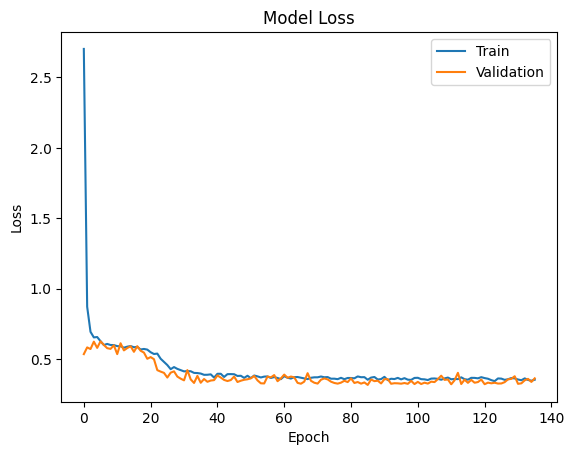

In [ ]:
import matplotlib.pyplot as plt

plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model Loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='upper right')

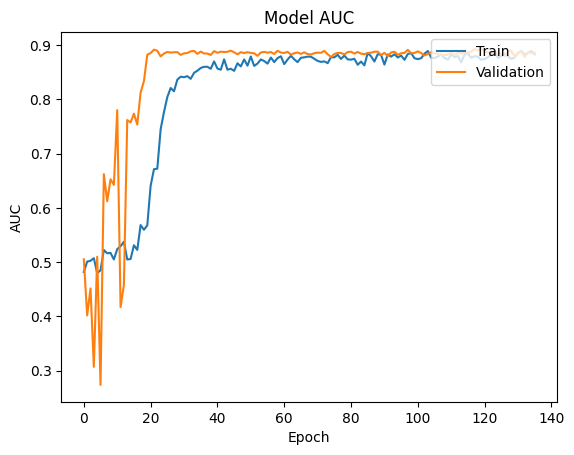

In [ ]:
plt.plot(history.history['AUC'])
plt.plot(history.history['val_AUC'])
plt.title('Model AUC')
plt.ylabel('AUC')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='upper right')

In [ ]:
from sklearn.metrics import roc_auc_score
predictions = model.predict(X_eval)
roc_auc_score(y_eval, predictions)

14/14 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step 


0.8704723268617791

In [ ]:
predictions = model.predict(X_test).flatten()

23/23 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step


In [ ]:
predictions = np.nan_to_num(predictions, nan=0)

In [ ]:
predictions

array([0.97403693, 0.9785095 , 0.9292996 , 0.17817856, 0.12702674,
       0.8942695 , 0.9256561 , 0.96742135, 0.95376974, 0.7093978 ,
       0.9772555 , 0.15506369, 0.9771029 , 0.94754183, 0.27660713,
       0.01782886, 0.8850136 , 0.71427816, 0.16358314, 0.01474451,
       0.20048867, 0.24227405, 0.8663286 , 0.97727746, 0.8890322 ,
       0.43021315, 0.03063857, 0.97416306, 0.9233866 , 0.45107704,
       0.94617677, 0.95115393, 0.8693062 , 0.96652085, 0.8749996 ,
       0.91438943, 0.32795292, 0.92095315, 0.83773816, 0.8847959 ,
       0.8901296 , 0.896835  , 0.18460317, 0.92082715, 0.94615215,
       0.30606505, 0.25427908, 0.96570736, 0.3296453 , 0.8511265 ,
       0.9585535 , 0.9760774 , 0.9772588 , 0.9601036 , 0.9716263 ,
       0.97152984, 0.94058084, 0.9419509 , 0.93906397, 0.95824003,
       0.878638  , 0.96518844, 0.96538067, 0.8686846 , 0.45925397,
       0.375889  , 0.20824702, 0.88500553, 0.88684905, 0.12343221,
       0.97983205, 0.9232516 , 0.9487503 , 0.9584117 , 0.96762